<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/%EB%AC%B4%EC%8A%A8%EC%9D%BC%EC%9D%B4%EC%A1%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%95%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [409]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import sklearn
import lightgbm as lgb
from tensorflow import keras
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict, validation_curve, GridSearchCV, cross_val_score
import plotly.graph_objects as go
import plotly.express as px
import xgboost as xgb

In [301]:
sinyong = pd.read_excel('./코로나이후신용.xlsx')
sinyong.columns=['기업명','등급','전망','등급결정일','분류','a','b','c']
sinyong=sinyong.drop(['분류','a','b','c'],axis=1)
sinyong=sinyong.drop([0],axis=0)
for x,y in zip(sinyong['등급결정일'], sinyong.index):
  x=str(x[:4])+str(x[5:7])+str(x[8:10])
  sinyong['등급결정일'].loc[y]=x
for a,b in zip(sinyong['등급결정일'], sinyong.index):
  a=a[:4]
  sinyong['등급결정일'].loc[b]=a
for a,b in zip(sinyong['기업명'], sinyong.index):
  if a[:3] =='(주)':
    a=a[3:]
    sinyong['기업명'].loc[b] = a
  if a[-3:] =='(주)':
    a=a[:-3]
    sinyong['기업명'].loc[b] = a
  if a[:3] =='(재)':
    a=a[3:]
    sinyong['기업명'].loc[b] = a
for a,b in zip(sinyong['기업명'], sinyong.index):
  if a[:3] == 'HSD':
    a='에이치에스디'+a[3:]
    sinyong['기업명'].loc[b] = a
  if a[:2] =='DB':
    a='디비'+a[2:]
    sinyong['기업명'].loc[b] = a
  if a[:2] =='LF':
    sinyong['기업명'].loc[b] = '엘에프'
  if a[:2] == 'JB':
    a='제이비'+a[2:]
    sinyong['기업명'].loc[b] = a
  if a[:3] == 'DGB':
    a='디지비'+a[3:]
    sinyong['기업명'].loc[b] = a
  if a[:3] == 'BNK':
    a='비엔케이'+a[3:]
    sinyong['기업명'].loc[b] = a
  if a[:2] == 'KB':
    a='케이비'+a[2:]
    sinyong['기업명'].loc[b] = a
  if a[:2] == 'KR':
    a='케이알'+a[2:]
    sinyong['기업명'].loc[b] = a
for i in sinyong['기업명']:
  print(i)

휴켐스
효성티앤씨
현대차증권
현대중공업지주
현대제철
현대자동차
현대위아
현대로템
현대글로비스
현대건설
해태제과식품
한화에어로스페이스
한화솔루션
한전케이피에스
한솔제지
한국항공우주산업
한국콜마
한국지역난방공사
한국전력기술
한국전력공사
페이퍼코리아
키움증권
케이티비투자증권
중소기업은행
이베스트투자증권
유진기업
유안타증권
엘지전자
엘지이노텍
엘지디스플레이
엘아이지넥스원
에이프로젠제약
에이치디씨현대이피
에이치디씨
에쓰오일
에스케이하이닉스
에스케이텔레콤
에스케이씨
에스케이브로드밴드
에스케이바이오사이언스
에스케이머티리얼즈
에스케이렌터카
에스케이네트웍스
에스케이가스
에스케이
씨제이씨지브이
씨제이대한통운
신한캐피탈
신영증권
스튜디오드래곤
삼화페인트공업
삼성카드
삼성에스디아이
삼성물산
메리츠증권
매일유업
롯데하이마트
롯데푸드
롯데케미칼
롯데칠성음료
롯데쇼핑
디엘이앤씨
두산중공업
두산인프라코어
동원산업
동국제강
동국산업
대우조선해양
대상
기아자동차
교보증권
광동제약
에이치에스디엔진
디비금융투자
호텔신라
한화
한솔케미칼
한라홀딩스
한라
하나은행
하나금융지주
풍산
포스코인터내셔널
포스코
파루
파라다이스글로벌
케이티
케이씨씨
케이비금융지주
지에스글로벌
지에스
종근당
전북은행
이마트
우리은행
우리금융지주
영원무역
엠에스오토텍
엘지하우시스
엘지유플러스
엘지상사
신한은행
신한금융지주회사
신세계푸드
신세계
세아베스틸
삼천리
빙그레
부산은행
대구은행
녹십자
노루페인트
국민은행
광주은행
경남은행
엘에프
제이비금융지주
디지비금융지주
비엔케이금융지주
화이트코리아
현대트랜시스
현대커머셜
현대캐피탈
현대카드
현대오일뱅크
현대스틸산업
한화토탈
한화에너지
한화디펜스
한국해외인프라도시개발지원공사
한국증권금융
한국중부발전
한국에스지증권
한국수력원자력
한국서부발전
한국동서발전
한국도로공사
한국남부발전
한국남동발전
하이투자증권
하나캐피탈
피에스앤마케팅
포스코에너지
평택에너지서비스
태광실업
코리아신탁
지에스파워
지에스칼텍스
지에스이피에스
지에스에너지
제이티저축은행
인천도시공사
인천국제공항공사
유안타저축은행
오일허

In [302]:
pre_sinyong = pd.read_excel('./코로나이전신용.xlsx')
pre_sinyong.columns=['기업명','등급','전망','등급결정일','분류','a','b','c']
pre_sinyong=pre_sinyong.drop(['분류','a','b','c'],axis=1)
pre_sinyong=pre_sinyong.drop([0],axis=0)
for x,y in zip(pre_sinyong['등급결정일'], pre_sinyong.index):
  x=str(x[:4])+str(x[5:7])+str(x[8:10])
  pre_sinyong['등급결정일'].loc[y]=x
for a,b in zip(pre_sinyong['등급결정일'], pre_sinyong.index):
  a=a[:4]
  pre_sinyong['등급결정일'].loc[b]=a
for a,b in zip(pre_sinyong['기업명'], pre_sinyong.index):
  if a[:3] =='(주)':
    a=a[3:]
    pre_sinyong['기업명'].loc[b] = a
  if a[-3:] =='(주)':
    a=a[:-3]
    pre_sinyong['기업명'].loc[b] = a
  if a[:3] =='(재)':
    a=a[3:]
    pre_sinyong['기업명'].loc[b] = a
for i in pre_sinyong['기업명']:
  print(i)

현대차증권
이마트
엘지디스플레이
삼화페인트공업
동국산업
한국해외인프라도시개발지원공사
한미약품
중국농업은행서울지점
DB금융투자
에스엠면세점
신세계푸드
현대캐피탈
현대카드
현대자동차
상호저축은행중앙회
기아자동차
빙그레
오씨아이
한화건설
현대로템
현대글로비스
에이치디씨현대이피
케이씨씨
디비저축은행
엘아이지
제이티저축은행
롯데렌탈
한화저축은행
한전케이피에스
아이엔지은행서울지점
에스케이렌터카
신영증권
에스비아이저축은행
엔에이치저축은행
유안타저축은행
스튜디오드래곤
예가람저축은행
에스케이어드밴스드
강릉에코파워
티에스케이코퍼레이션
한화투자증권
농협금융지주
노무라금융투자
대우조선해양
한화디펜스
고려저축은행
지에스글로벌
신세계프라퍼티
이수화학
엘지상사
광동제약
파루
모아저축은행
팜한농
현대오일뱅크
한국지역난방공사
하이투자증권
페이퍼코리아
유안타증권
대전도시공사
대성홀딩스
국가철도공단
페퍼저축은행
오에스비저축은행
에스알
메타랩스
LF
JB금융지주
에스케이이엔에스
에스케이씨
에스케이실트론
씨제이씨지브이
부산주공
교통은행서울지점
흥화
포스코
코람코자산신탁
이랜드리테일
유진저축은행
엠에스오토텍
안전대부
비엔케이저축은행
현대종합특수강
현대제철
한국항공우주산업
한국토지주택공사
케이티비투자증권
디엘
대구도시공사
경기주택도시공사
엘지씨엔에스
엘지생활건강
신세계사이먼
삼천리
휴켐스
한국캐피탈
키움증권
케이티비네트워크
인천국제공항공사
이베스트투자증권
엘에스엠트론
대한석탄공사
세아베스틸
한국장학재단
한국동서발전
평택에너지서비스
한화에너지
인천도시공사
씨제이대한통운
롯데하이마트
신세계
한국관광공사
쌍용건설
KR모터스
포스코인터내셔널
신원
시선인터내셔널
금성백조주택
현대스틸산업
피에스앤마케팅
해태제과식품
지에스칼텍스
지에스에너지
에스케이루브리컨츠
하나금융지주
케이티
엘지유플러스
반도건설
디비메탈
한화토탈
한화솔루션
한국콜마
한독
현대트랜시스
현대위아
한국자산관리공사
한국가스공사
하이트진로홀딩스
하이트진로
수산업협동조합중앙회
삼성물산
농업협동조합중앙회
휴비스
현대케피코
한샘
엘지하우시스
DGB캐피탈
코

In [303]:
fin_1=pd.read_excel('./이후외감.xlsx')
fin_2=pd.read_excel('./이후코스피코스닥.xlsx')
fin_2=fin_2.T
fin_2=fin_2.reset_index()

for col, ind in zip(fin_2['index'], fin_2.index):
  if col[-4:] == '(연결)':
    col=col[:-4]
    fin_2['index'].loc[ind] = col
  if col[-6:-2] == '(연결)':
    col=col[:-6] + col[-2:]
    fin_2['index'].loc[ind] = col
fin_2.index=fin_2['index']
fin_2=fin_2.drop(['index'],axis=1)
fin_2=fin_2.T
for a,b in zip(fin_2['회계년도'], fin_2.index):
  a=a[:4]
  fin_2['회계년도'].loc[b]=a
for a,b in zip(fin_1['회계년도'], fin_1.index):
  a=a[:4]
  fin_1['회계년도'].loc[b]=a

for a,b in zip(fin_1['회사명'], fin_1.index):
  if a[:3] =='(주)':
    a=a[3:]
    fin_1['회사명'].loc[b] = a
  if a[-3:] =='(주)':
    a=a[:-3]
    fin_1['회사명'].loc[b] = a
  if a[:3] =='(재)':
    a=a[3:]
    fin_1['회사명'].loc[b] = a

for a,b in zip(fin_2['회사명'], fin_2.index):
  if a[:3] =='(주)':
    a=a[3:]
    fin_2['회사명'].loc[b] = a
  if a[-3:] =='(주)':
    a=a[:-3]
    fin_2['회사명'].loc[b] = a
  if a[:3] =='(재)':
    a=a[3:]
    fin_2['회사명'].loc[b] = a

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [304]:
fin_1

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,공구,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),...,출자전환채무,신주청약증거금,감자차손,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,국고보조금,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주
0,BNK투자증권,14876,2019,2.371983e+09,0.0,3.487707e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4791391.0,3201236.0,0.0,0.0,3219375.0,1321823.0,0.0,0.0,3208406.0,0.0,0.0,0.0,1313001.0,1.930044e+09,4.419387e+08,113000000.0,113000000.0,0.0,2.518600e+08,2.518600e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,5881540.0,7576128.0,7576128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1694588.0,71197182.0,600780.0,0.0,500000.0,0.0,0.0,825494.0,0.0,69270908.0,0.0,20855914.0,0.0,50000000.0,5000.0,22600000.0,22600000.0,0.0
1,BNK투자증권,14876,2020,2.886419e+09,0.0,4.331430e+06,0.0,0.0,0.0,200100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5762477.0,3907666.0,0.0,0.0,4512541.0,2236022.0,0.0,0.0,4086929.0,0.0,0.0,0.0,1870234.0,2.188511e+09,6.979083e+08,133000000.0,133000000.0,0.0,4.317586e+08,4.317586e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,8206023.0,9785043.0,9785043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1579020.0,124943650.0,600780.0,0.0,500000.0,0.0,0.0,917923.0,0.0,122924947.0,0.0,53688535.0,0.0,50000000.0,5000.0,26600000.0,26600000.0,0.0
2,금성백조주택,13221,2019,5.516291e+08,0.0,5.435764e+07,23106846.0,0.0,0.0,0.0,0.0,0.0,39580019.0,8475004.0,0.0,0.0,579160.0,523599.0,0.0,0.0,0.0,0.0,0.0,0.0,1359318.0,1269105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.928590e+08,3.587700e+08,8000000.0,8000000.0,0.0,8.251600e+04,8.251600e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350687512.0,4000000.0,0.0,0.0,396900.0,0.0,13157500.0,0.0,333133112.0,0.0,42679049.0,0.0,5000000.0,5000.0,1600000.0,1600000.0,0.0
3,금성백조주택,13221,2020,5.484806e+08,20754940.0,5.359471e+07,23106846.0,0.0,0.0,0.0,0.0,0.0,39580019.0,9464505.0,0.0,0.0,753730.0,519268.0,0.0,0.0,0.0,0.0,0.0,0.0,1494914.0,1357027.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.304117e+08,4.180688e+08,8000000.0,8000000.0,0.0,8.251600e+04,8.251600e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,409986335.0,4000000.0,0.0,0.0,396900.0,0.0,13157500.0,0.0,392431935.0,0.0,59298823.0,0.0,5000000.0,5000.0,1600000.0,1600000.0,0.0
4,동원엔터프라이즈,14242,2019,1.858754e+09,0.0,1.333887e+07,6084651.0,0.0,0.0,1654286.0,0.0,0.0,7316611.0,1205033.0,0.0,1475403.0,296300.0,19753.0,0.0,0.0,3251528.0,2564297.0,0.0,16.0,0.0,0.0,0.0,0.0,4336375.0,0.0,0.0,399742.0,0.0,3.256855e+08,1.533068e+09,58457450.0,58457450.0,0.0,3.512393e+06,3.512393e+06,...,0.0,0.0,-3396090.0,0.0,0.0,0.0,916934451.0,919294740.0,919294740.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2360289.0,557717178.0,6955000.0,0.0,0.0,0.0,0.0,0.0,0.0,550762178.0,0.0,49525028.0,0.0,30000000.0,5000.0,11691490.0,11691490.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,현대커머셜주식회사,47531,2020,9.369111e+09,0.0,5.783071e+06,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,55192.0,6899.0,0.0,0.0,21787564.0,18306100.0,0.0,0.0,6787590.0,4534276.0,0.0,0.0,30451883.0,0.0,0.0,0.0,23477646.0,8.075656e+09,1.293455e+09,183333250.0,133333250.0,50000000.0,5.760751e+08,5.760751e+08,...,0.0,0.0,0.0,0.0,0.0,-2969642.

In [305]:
fin_1.columns

Index(['회사명', '거래소코드', '회계년도', '자산(*)', '단기매매증권(*)', '유형자산(*)', '토지',
       '(손상차손누계액)', '(국고보조금등차감액)', '건설중인자산', '(손상차손누계액).1', '(국고보조금등차감액).1',
       '건물 및 부속설비', '(감가상각누계액)', '(손상차손누계액).2', '(국고보조금등차감액).2', '차량운반구',
       '(감가상각누계액).1', '(손상차손누계액).3', '(국고보조금등차감액).3', '공구', '(감가상각누계액).2',
       '(손상차손누계액).4', '(국고보조금등차감액).4', '기타유형자산', '(감가상각누계액).3', '(손상차손누계액).5',
       '(국고보조금등차감액).5', '무형자산(*)', '영업권', '부의영업권', '산업재산권', '개발비', '부채(*)',
       '자본(*)', '자본금(*)', '보통주자본금', '우선주자본금', '자본잉여금(*)', '자본준비금(*)',
       '주식발행초과금', '기타자본잉여금(*)', '감자차익', '합병차익', '자산수증이익', '채무면제이익', '자기주식처분이익',
       '전환권대가', '신주인수권대가', '교환권대가', '기타', '재평가적립금', '자본조정(*)', '주식할인발행차금',
       '자기주식', '자기주식처분손익', '전환권대가.1', '신주인수권대가.1', '출자전환채무', '신주청약증거금', '감자차손',
       '미교부주식배당금', '주식매수선택권', '기타자본조정', '기타포괄손익누계액(*)',
       '투자유가증권(장기투자증권)평가이익(*)', '매도가능증권평가이익', '지분법자본변동', '기타.1',
       '투자유가증권(장기투자증권)평가손실(*)', '매도가능증권평가손실', '부의 지분법자본변동', '기타.2', '해외사업환산이익',
       '해외사업환산손실', '파생상품평가이익', '파생상품평가손실', 

In [306]:
for i in fin_2.columns:
  print(i)

회사명
거래소코드
회계년도
자산(*)
단기매매증권(*)
유형자산(*)
토지
(손상차손누계액)
(국고보조금등차감액)
건설중인자산
(손상차손누계액).1
(국고보조금등차감액).1
건물 및 부속설비
(감가상각누계액)
(손상차손누계액).2
(국고보조금등차감액).2
차량운반구
(감가상각누계액).1
(손상차손누계액).3
(국고보조금등차감액).3
공구,기구,비품
(감가상각누계액).2
(손상차손누계액).4
(국고보조금등차감액).4
기타유형자산
(감가상각누계액).3
(손상차손누계액).5
(국고보조금등차감액).5
무형자산(*)
영업권
부의영업권
산업재산권
개발비
부채(*)
자본(*)
지배회사지분(*)
자본금(*)
보통주자본금
우선주자본금
자본잉여금(*)
자본준비금(*)
주식발행초과금
기타자본잉여금(*)
감자차익
합병차익
자산수증이익
채무면제이익
자기주식처분이익
전환권대가
신주인수권대가
교환권대가
기타
재평가적립금
자본조정(*)
주식할인발행차금
종속회사소유지배회사주식(*)
보통주
우선주
소액투자제거차액
자기주식
자기주식처분손익
전환권대가.1
신주인수권대가.1
출자전환채무
신주청약증거금
감자차손
미교부주식배당금
주식매수선택권
기타자본조정
기타포괄손익누계액(*)
투자유가증권(장기투자증권)평가이익(*)
매도가능증권평가이익
지분법자본변동
기타.1
투자유가증권(장기투자증권)평가손실(*)
매도가능증권평가손실
부의 지분법자본변동
기타.2
해외사업환산이익
해외사업환산손실
파생상품평가이익
파생상품평가손실
외화환산대
외화환산차
국고보조금,공사부담금 등
기타.3
이익잉여금(*)
이익준비금
재무구조개선적립금
법정적립금
기업합리화적립금
기타세법상적립금
임의적립금
기타이익잉여금
미처분이익잉여금(결손금)
차기이월미처분이익잉여금(결손금)
*소수주주지분초과손실액
*당기순이익
*전기이월미처분이익잉여금(결손금)
소수주주지분
수권주식수
(1주당금액)
발행주식수(*)
보통주.1
우선주.1


In [307]:
col_data=pd.DataFrame()
for f1 in fin_1.columns:
  fin_col = fin_2.columns[fin_2.columns == f1].values
  print(fin_col)

['회사명']
['거래소코드']
['회계년도']
['자산(*)']
['단기매매증권(*)']
['유형자산(*)']
['토지']
['(손상차손누계액)']
['(국고보조금등차감액)']
['건설중인자산']
['(손상차손누계액).1']
['(국고보조금등차감액).1']
['건물 및 부속설비']
['(감가상각누계액)']
['(손상차손누계액).2']
['(국고보조금등차감액).2']
['차량운반구']
['(감가상각누계액).1']
['(손상차손누계액).3']
['(국고보조금등차감액).3']
[]
['(감가상각누계액).2']
['(손상차손누계액).4']
['(국고보조금등차감액).4']
['기타유형자산']
['(감가상각누계액).3']
['(손상차손누계액).5']
['(국고보조금등차감액).5']
['무형자산(*)']
['영업권']
['부의영업권']
['산업재산권']
['개발비']
['부채(*)']
['자본(*)']
['자본금(*)']
['보통주자본금']
['우선주자본금']
['자본잉여금(*)']
['자본준비금(*)']
['주식발행초과금']
['기타자본잉여금(*)']
['감자차익']
['합병차익']
['자산수증이익']
['채무면제이익']
['자기주식처분이익']
['전환권대가']
['신주인수권대가']
['교환권대가']
['기타']
['재평가적립금']
['자본조정(*)']
['주식할인발행차금']
['자기주식']
['자기주식처분손익']
['전환권대가.1']
['신주인수권대가.1']
['출자전환채무']
['신주청약증거금']
['감자차손']
['미교부주식배당금']
['주식매수선택권']
['기타자본조정']
['기타포괄손익누계액(*)']
['투자유가증권(장기투자증권)평가이익(*)']
['매도가능증권평가이익']
['지분법자본변동']
['기타.1']
['투자유가증권(장기투자증권)평가손실(*)']
['매도가능증권평가손실']
['부의 지분법자본변동']
['기타.2']
['해외사업환산이익']
['해외사업환산손실']
['파생상품평가이익']
['파생상품평가손실']
['외화환산대']
['외화환산차']
[]
['

# 안곂치는 칼럼 -> []가 있는 자리

공구, 국고보조금이 있다.

공구의 경우 외감의 재무제표와 코스피코스닥 재무제표가 이름이 살짝 다른데, 코스피 코스닥의 경우 공구와 기구, 비품이라는 이름으로 되어 있다.


또한, 국고보조금의 경우 코스피코스닥에는 국고보조금, 공사부담금 등 이라는 이름으로 되어 있다.

즉, 이 두 가지 계정들이 완전히 같다고 볼 수 없으므로 제외 한다.

In [308]:
fin_stat_1=fin_1.drop(['공구','국고보조금'],axis=1)
fin_stat_1

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,신주인수권대가.1,출자전환채무,신주청약증거금,감자차손,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주
0,BNK투자증권,14876,2019,2.371983e+09,0.0,3.487707e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3201236.0,0.0,0.0,3219375.0,1321823.0,0.0,0.0,3208406.0,0.0,0.0,0.0,1313001.0,1.930044e+09,4.419387e+08,113000000.0,113000000.0,0.0,2.518600e+08,2.518600e+08,2.518600e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5881540.0,7576128.0,7576128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1694588.0,71197182.0,600780.0,0.0,500000.0,0.0,0.0,825494.0,0.0,69270908.0,0.0,20855914.0,0.0,50000000.0,5000.0,22600000.0,22600000.0,0.0
1,BNK투자증권,14876,2020,2.886419e+09,0.0,4.331430e+06,0.0,0.0,0.0,200100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3907666.0,0.0,0.0,4512541.0,2236022.0,0.0,0.0,4086929.0,0.0,0.0,0.0,1870234.0,2.188511e+09,6.979083e+08,133000000.0,133000000.0,0.0,4.317586e+08,4.317586e+08,4.317586e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8206023.0,9785043.0,9785043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1579020.0,124943650.0,600780.0,0.0,500000.0,0.0,0.0,917923.0,0.0,122924947.0,0.0,53688535.0,0.0,50000000.0,5000.0,26600000.0,26600000.0,0.0
2,금성백조주택,13221,2019,5.516291e+08,0.0,5.435764e+07,23106846.0,0.0,0.0,0.0,0.0,0.0,39580019.0,8475004.0,0.0,0.0,579160.0,523599.0,0.0,0.0,0.0,0.0,0.0,1359318.0,1269105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.928590e+08,3.587700e+08,8000000.0,8000000.0,0.0,8.251600e+04,8.251600e+04,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350687512.0,4000000.0,0.0,0.0,396900.0,0.0,13157500.0,0.0,333133112.0,0.0,42679049.0,0.0,5000000.0,5000.0,1600000.0,1600000.0,0.0
3,금성백조주택,13221,2020,5.484806e+08,20754940.0,5.359471e+07,23106846.0,0.0,0.0,0.0,0.0,0.0,39580019.0,9464505.0,0.0,0.0,753730.0,519268.0,0.0,0.0,0.0,0.0,0.0,1494914.0,1357027.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.304117e+08,4.180688e+08,8000000.0,8000000.0,0.0,8.251600e+04,8.251600e+04,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,409986335.0,4000000.0,0.0,0.0,396900.0,0.0,13157500.0,0.0,392431935.0,0.0,59298823.0,0.0,5000000.0,5000.0,1600000.0,1600000.0,0.0
4,동원엔터프라이즈,14242,2019,1.858754e+09,0.0,1.333887e+07,6084651.0,0.0,0.0,1654286.0,0.0,0.0,7316611.0,1205033.0,0.0,1475403.0,296300.0,19753.0,0.0,0.0,2564297.0,0.0,16.0,0.0,0.0,0.0,0.0,4336375.0,0.0,0.0,399742.0,0.0,3.256855e+08,1.533068e+09,58457450.0,58457450.0,0.0,3.512393e+06,3.512393e+06,0.000000e+00,...,0.0,0.0,0.0,-3396090.0,0.0,0.0,0.0,916934451.0,919294740.0,919294740.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2360289.0,557717178.0,6955000.0,0.0,0.0,0.0,0.0,0.0,0.0,550762178.0,0.0,49525028.0,0.0,30000000.0,5000.0,11691490.0,11691490.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,현대커머셜주식회사,47531,2020,9.369111e+09,0.0,5.783071e+06,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,55192.0,6899.0,0.0,0.0,18306100.0,0.0,0.0,6787590.0,4534276.0,0.0,0.0,30451883.0,0.0,0.0,0.0,23477646.0,8.075656e+09,1.293455e+09,183333250.0,133333250.0,50000000.0,5.760751e+08,5.760751e+08,2.569175

In [309]:
fin_stat_2=fin_2[fin_stat_1.columns]
fin_stat_2

index,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,신주인수권대가.1,출자전환채무,신주청약증거금,감자차손,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주
0,휴켐스,69260,2019,9.13868e+08,0,2.15694e+08,4.09264e+07,0,0,3.5058e+07,0,0,3.36766e+07,2.03179e+07,0,0,0,0,0,0,0,0,0,1.5202e+07,6.7945e+06,0,0,8.61805e+06,0,0,0,0,2.42217e+08,6.71651e+08,4.08786e+07,4.08786e+07,0,1.90417e+08,1.90417e+08,1.76299e+08,...,0,0,0,0,0,0,-3.10377e+06,-1.94204e+06,1.00145e+06,1.00145e+06,0,0,-946022,0,-946022,0,0,-1.99746e+06,0,0,0,0,0,4.77888e+08,3.71691e+07,0,0,0,0,3.4363e+08,2.16304e+07,7.54582e+07,0,7.03583e+07,0,8e+07,1000,4.08786e+07,0,0
1,효성티앤씨,298020,2019,3.22431e+09,0,1.47007e+09,1.21134e+08,0,0,1.2422e+07,0,0,4.97861e+08,1.66735e+08,0,0,9.851e+06,7.151e+06,0,0,5.9476e+07,0,0,6.2386e+07,2.1589e+07,0,0,9.19496e+07,6.654e+06,0,1.176e+06,0,2.64135e+09,5.82954e+08,2.16384e+07,2.16384e+07,0,4.0612e+08,4.0612e+08,4.02774e+08,...,0,0,0,0,0,0,0,-3.8568e+07,0,0,0,0,-5.381e+06,-5.381e+06,0,0,0,-3.3187e+07,0,0,0,0,0,1.02735e+08,432000,0,0,0,0,2.4e+07,0,7.83031e+07,0,9.30872e+07,0,2e+08,5000,4.32768e+06,0,0
2,현대차증권,1500,2020,9.1679e+09,0,9.288e+06,0,0,0,355000,0,0,0,0,0,0,731000,334000,0,0,1.2509e+07,0,0,1.2152e+07,7.42e+06,0,0,2.404e+07,0,0,0,0,8.10212e+09,1.06579e+09,1.93776e+08,1.46686e+08,4.70904e+07,3.68658e+08,3.68658e+08,0,...,0,0,0,0,0,0,0,8.8005e+07,9.2661e+07,9.2661e+07,0,0,0,0,0,0,0,0,0,0,0,0,-4.656e+06,4.15348e+08,1.9051e+07,0,1e+06,0,0,3.11264e+08,0,8.4021e+07,0,8.4299e+07,0,1.2e+08,5000,3.87553e+07,0,0
3,현대중공업지주,267250,2020,2.6559e+10,0,1.06796e+10,2.21047e+09,0,1.311e+06,2.10554e+09,1.232e+06,0,1.05698e+09,3.31526e+08,0,2.572e+06,0,0,0,0,0,0,0,1.2815e+09,8.40476e+08,0,269000,2.00871e+09,1.30712e+09,0,0,8.8453e+07,1.54611e+10,1.10979e+10,8.14331e+07,8.14331e+07,0,5.1927e+09,5.1927e+09,3.09045e+09,...,0,0,0,0,0,0,-2.32802e+08,2.5018e+08,1.0573e+07,1.0573e+07,0,0,-1.0961e+08,0,-1.0961e+08,0,0,-1.997e+06,1.622e+06,0,0,0,0,2.21296e+09,0,0,0,0,0,3.58881e+08,0,1.85408e+09,0,-6.09172e+08,0,1.6e+08,5000,1.57986e+07,0,0
4,현대제철,4020,2019,3.43663e+10,0,2.05633e+10,3.44573e+09,0,0,1.18717e+09,0,0,4.65236e+09,1.38183e+09,0,0,1.01499e+08,5.37335e+07,0,0,6.61281e+08,0,0,0,0,0,0,1.5782e+09,8.51423e+08,0,7.05496e+07,6.14791e+07,1.71326e+10,1.72337e+10,6.67229e+08,6.67229e+08,0,3.91448e+09,3.91448e+09,3.71996e+09,...,0,0,0,0,0,0,0,9.57437e+08,1.03987e+09,1.03987e+09,0,0,-390866,0,-390866,0,0,-4.98744e+07,0,-3.21657e+07,0,0,0,1.14883e+10,0,0,1.09253e+08,0,0,1.131e+10,0,6.90483e+07,0,1.71047e+07,0,3e+08,5000,1.33446e+08,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,KB금융지주,105560,2020,6.10672e+11,5.21051e+09,9.32785e+09,2.6116e+09,1.018e+06,0,4.419e+07,0,0,2.60796e+09,8.30516e+08,5.859e+06,0,0,0,0,0,0,0,0,1.09488e+09,5.24165e+08,0,0,3.35113e+09,7.63582e+08,0,0,0,5.67311e+11,4.33615e+10,2.09056e+09,2.09056e+09,0,1.89009e+10,1.89009e+10,1.31903e+10,...,0,0,0,0,0,0,0,6.12337e+08,7.1723e+08,7.1723e+08,0,0,-3.529e+06,0,-3.529e+06,0,2.2277e+07,0,0,-2.8597e+07,0,0,3.6069e+07,2.25174e+10,5.57405e+08,0,0,0,0,9.82e+08,0,2.0978e+10,0,3.45515e+09,0,1e+09,5000,4.15808e+08,0,0
185,JB금융지주,175330,2019,4.75296e+10,130000,7.2

In [310]:
fin_stat=pd.concat([fin_stat_1,fin_stat_2], axis=0)
fin_stat=fin_stat.reset_index()
fin_stat=fin_stat.drop(['index'],axis=1)
fin_stat['등급결정일'] = 'nan'
fin_stat['전망']='nan'
fin_stat['등급']='nan'

for a,b in zip(fin_stat['회사명'], fin_stat.index):
  if a[:3] == 'HSD':
    a='에이치에스디'+a[3:]
    fin_stat['회사명'].loc[b] = a
  if a[:2] =='DB':
    a='디비'+a[2:]
    fin_stat['회사명'].loc[b] = a
  if a[:2] =='LF':
    fin_stat['회사명'].loc[b] = '엘에프'
  if a[:2] == 'JB':
    a='제이비'+a[2:]
    fin_stat['회사명'].loc[b] = a
  if a[:3] == 'DGB':
    a='디지비'+a[3:]
    fin_stat['회사명'].loc[b] = a
  if a[:3] == 'BNK':
    a='비엔케이'+a[3:]
    fin_stat['회사명'].loc[b] = a
  if a[:2] == 'KB':
    a='케이비'+a[2:]
    fin_stat['회사명'].loc[b] = a
  if a[:2] == 'KR':
    a='케이알'+a[2:]
    fin_stat['회사명'].loc[b] = a
  if a[:2] == 'GS':
    a='지에스'+a[2:]
    fin_stat['회사명'].loc[b] = a
  if a[:2] == 'SK':
    a='에스케이'+a[2:]
    fin_stat['회사명'].loc[b] = a
  if a[:2] == 'KR':
    a='케이알'+a[2:]
    fin_stat['회사명'].loc[b] = a
  if a[-3:] == 'SDI':
    a=a[:-3]+'에스디아이'
    fin_stat['회사명'].loc[b] = a
  if a[:2] == 'LG':
    a='엘지'+a[2:]
    fin_stat['회사명'].loc[b] = a
  if a[:2] == '에쓰':
    a=a[:2]+a[3:]
    fin_stat['회사명'].loc[b] = a
for a,b in zip(fin_stat['회사명'], fin_stat.index):
  if a[:4] == '주식회사':
    a=a[4:]
    fin_stat['회사명'].loc[b] = a
  if a[-4:] == '주식회사':
    a=a[:-4]
    fin_stat['회사명'].loc[b] = a
  if a =='에스케이 머티리얼즈':
    a='에스케이머티리얼즈'
    fin_stat['회사명'].loc[b] = a
for i in fin_stat['회사명']:
  print(i)

비엔케이투자증권
비엔케이투자증권
금성백조주택
금성백조주택
동원엔터프라이즈
동원엔터프라이즈
디지비캐피탈
디지비캐피탈
무궁화신탁
무궁화신탁
반도건설
반도건설
시선인터내셔널
시선인터내셔널
신세계사이먼
신세계사이먼
아이비케이캐피탈
아이비케이캐피탈
애큐온저축은행
애큐온저축은행
에스비아이저축은행
에스비아이저축은행
에스엠면세점
에스엠면세점
엘아이지
엘아이지
예가람저축은행
예가람저축은행
오에스비저축은행
오에스비저축은행
우리금융저축은행
우리금융저축은행
이랜드리테일
이랜드리테일
이랜드월드
이랜드월드
지에스이앤알
지에스이앤알
케이티에스테이트
케이티에스테이트
티에스케이코퍼레이션
티에스케이코퍼레이션
팜한농
팜한농
한국스탠다드차타드은행
한국스탠다드차타드은행
한국씨티은행
한국씨티은행
한화저축은행
한화저축은행
현대케피코
현대케피코
흥화
지에스에너지
지에스에너지
지에스파워
지에스파워
에스케이에너지
에스케이에너지
에스케이인천석유화학
에스케이인천석유화학
강릉에코파워
강릉에코파워
고성그린파워
고성그린파워
노무라금융투자
노무라금융투자
농협금융지주
농협금융지주
농협은행
농협은행
대한토지신탁
대한토지신탁
롯데렌탈
롯데렌탈
롯데컬처웍스
롯데컬처웍스
부산그린파워
부산그린파워
부산도시공사
삼척블루파워
삼척블루파워
서울주택도시공사
세방리튬배터리
신한카드
신한카드
씨지앤대산전력
씨지앤대산전력
씨지앤율촌전력
씨지앤율촌전력
씨지앤코리아홀딩스
씨지앤코리아홀딩스
에스알
에스케이머티리얼즈에어플러스
에스케이머티리얼즈에어플러스
에스케이이엔에스
에스케이이엔에스
에스케이피아이씨글로벌
엔에이치농협캐피탈
엔에이치농협캐피탈
엔에이치저축은행
엔에이치저축은행
오일허브코리아여수
오일허브코리아여수
유안타저축은행
유안타저축은행
인천국제공항공사
인천도시공사
제이티저축은행
제이티저축은행
고려저축은행
고려저축은행
디비메탈
디비메탈
디비저축은행
디비저축은행
비보존제약
비보존제약
신세계센트럴시티
신세계센트럴시티
엘지씨엔에스
엘지씨엔에스
우리카드
우리카드
전주원파워
전주원파워
케이비국민카드
케이비국민카드
코람코자산신탁
코람코자산신탁
페퍼저축은행
페퍼

In [311]:
for name, date, grade, pro in zip(sinyong['기업명'], sinyong['등급결정일'], sinyong['등급'], sinyong['전망']):
  for name1, ind in zip(fin_stat['회사명'], fin_stat.index):
    if name1 == name:
      fin_stat['등급결정일'].loc[ind] = date
      fin_stat['등급'].loc[ind] = grade
      fin_stat['전망'].loc[ind] = pro
fin_stat 

index,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,감자차손,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급
0,비엔케이투자증권,14876,2019,2.37198e+09,0,3.48771e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.20124e+06,0,0,3.21938e+06,1.32182e+06,0,0,3.20841e+06,0,0,0,1.313e+06,1.93004e+09,4.41939e+08,1.13e+08,1.13e+08,0,2.5186e+08,2.5186e+08,2.5186e+08,...,0,0,0,0,5.88154e+06,7.57613e+06,7.57613e+06,0,0,0,0,0,0,0,0,0,0,0,0,-1.69459e+06,7.11972e+07,600780,0,500000,0,0,825494,0,6.92709e+07,0,2.08559e+07,0,5e+07,5000,2.26e+07,2.26e+07,0,2021,Stable,A+
1,비엔케이투자증권,14876,2020,2.88642e+09,0,4.33143e+06,0,0,0,200100,0,0,0,0,0,0,0,0,0,0,3.90767e+06,0,0,4.51254e+06,2.23602e+06,0,0,4.08693e+06,0,0,0,1.87023e+06,2.18851e+09,6.97908e+08,1.33e+08,1.33e+08,0,4.31759e+08,4.31759e+08,4.31759e+08,...,0,0,0,0,8.20602e+06,9.78504e+06,9.78504e+06,0,0,0,0,0,0,0,0,0,0,0,0,-1.57902e+06,1.24944e+08,600780,0,500000,0,0,917923,0,1.22925e+08,0,5.36885e+07,0,5e+07,5000,2.66e+07,2.66e+07,0,2021,Stable,A+
2,금성백조주택,13221,2019,5.51629e+08,0,5.43576e+07,2.31068e+07,0,0,0,0,0,3.958e+07,8.475e+06,0,0,579160,523599,0,0,0,0,0,1.35932e+06,1.26910e+06,0,0,0,0,0,0,0,1.92859e+08,3.5877e+08,8e+06,8e+06,0,82516,82516,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.50688e+08,4e+06,0,0,396900,0,1.31575e+07,0,3.33133e+08,0,4.2679e+07,0,5e+06,5000,1.6e+06,1.6e+06,0,2020,Stable,BBB-
3,금성백조주택,13221,2020,5.48481e+08,2.07549e+07,5.35947e+07,2.31068e+07,0,0,0,0,0,3.958e+07,9.46450e+06,0,0,753730,519268,0,0,0,0,0,1.49491e+06,1.35703e+06,0,0,0,0,0,0,0,1.30412e+08,4.18069e+08,8e+06,8e+06,0,82516,82516,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.09986e+08,4e+06,0,0,396900,0,1.31575e+07,0,3.92432e+08,0,5.92988e+07,0,5e+06,5000,1.6e+06,1.6e+06,0,2020,Stable,BBB-
4,동원엔터프라이즈,14242,2019,1.85875e+09,0,1.33389e+07,6.08465e+06,0,0,1.65429e+06,0,0,7.31661e+06,1.20503e+06,0,1.4754e+06,296300,19753,0,0,2.5643e+06,0,16,0,0,0,0,4.33638e+06,0,0,399742,0,3.25685e+08,1.53307e+09,5.84574e+07,5.84574e+07,0,3.51239e+06,3.51239e+06,0,...,-3.39609e+06,0,0,0,9.16934e+08,9.19295e+08,9.19295e+08,0,0,0,0,0,0,0,0,0,0,0,0,-2.36029e+06,5.57717e+08,6.955e+06,0,0,0,0,0,0,5.50762e+08,0,4.9525e+07,0,3e+07,5000,1.16915e+07,1.16915e+07,0,2020,Stable,A+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,케이비금융지주,105560,2020,6.10672e+11,5.21051e+09,9.32785e+09,2.6116e+09,1.018e+06,0,4.419e+07,0,0,2.60796e+09,8.30516e+08,5.859e+06,0,0,0,0,0,0,0,0,1.09488e+09,5.24165e+08,0,0,3.35113e+09,7.63582e+08,0,0,0,5.67311e+11,4.33615e+10,2.09056e+09,2.09056e+09,0,1.89009e+10,1.89009e+10,1.31903e+10,...,0,0,0,0,6.12337e+08,7.1723e+08,7.1723e+08,0,0,-3.529e+06,0,-3.529e+06,0,2.2277e+07,0,0,-2.8597e+07,0,0,3.6069e+07,2.25174e+10,5.57405e+08,0,0,0,0,9.82e+08,0,2.0978e+10,0,3.45515e+09,0,1e+09,5000,4.15808e+08,0,0,2021,Stable,AAA
374,제이비금융지주,175330,2019,4.75296e+10,130000,7.244e+08,1.3107e+08,0,0,700000,0,0,2.00918e+08,4.415e+07,0,0,0,0,0,0,0,0,0,8.2965e+07,4.7985e+07,0,0,1.57515e+08,6.0169e+07,0,0,2.6229e+07,4.37098e+10,3.81978e+09,9.84914e+08,9.84914e+08,0,1.10837e+09,1.10837e+09,5.26718e+08,...,0,0,0,0,-5.2553e+07,5000,0,5000,0,-1.3108e+07,-1.3108e+07,0,0,0,0,0,-2.607e+06,0

In [312]:
fin_stat[fin_stat['등급결정일'] == 'nan']

index,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,감자차손,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급
293,기아,270,2019,5.53448e+10,0,1.57467e+10,4.91992e+09,0,0,1.36623e+09,0,0,4.0121e+09,1.42258e+09,0,0,3.70536e+08,1.50458e+08,0,0,4.9774e+09,0,0,0,0,0,0,2.55279e+09,3.7094e+07,0,3.6708e+07,2.23259e+09,2.63667e+10,2.89781e+10,2.13932e+09,2.13932e+09,0,1.71576e+09,1.71576e+09,1.56065e+09,...,0,0,0,0,-7.16971e+08,0,0,0,0,-2.67435e+08,-4.3337e+07,-2.24098e+08,0,0,-4.49455e+08,0,-81000,0,0,0,2.60562e+10,0,0,3.57011e+08,0,0,1.85841e+10,0,7.11511e+09,0,1.82666e+09,0,8.2e+08,5000,4.05363e+08,0,0,nan,nan,nan
294,기아,270,2020,6.04904e+10,0,1.55797e+10,4.93966e+09,0,0,8.66665e+08,0,0,4.04171e+09,1.53243e+09,0,0,3.92928e+08,1.6339e+08,0,0,5.60833e+09,0,0,0,0,0,0,2.66557e+09,3.7236e+07,0,4.5031e+07,2.33334e+09,3.05988e+10,2.98917e+10,2.13932e+09,2.13932e+09,0,1.71576e+09,1.71576e+09,1.56065e+09,...,0,0,0,0,-9.20638e+08,0,0,0,0,-3.43051e+08,-3.5119e+07,-3.07932e+08,0,0,-5.92919e+08,1.5332e+07,0,0,0,0,2.71734e+10,0,0,4.08024e+08,0,0,1.95939e+10,0,7.17153e+09,0,1.48758e+09,0,8.2e+08,5000,4.05363e+08,0,0,nan,nan,nan
321,파라다이스,34230,2019,3.47035e+09,0,2.19695e+09,7.76616e+08,0,0,5.67028e+06,0,0,1.28611e+09,1.58961e+08,0,0,0,0,0,0,9.91947e+07,0,0,2.14103e+08,7.24412e+07,0,0,2.63033e+08,2.15739e+08,0,0,0,1.86615e+09,1.6042e+09,4.70324e+07,4.70324e+07,0,2.9502e+08,2.9502e+08,6.87319e+07,...,0,0,0,0,3.06103e+08,970434,970434,0,0,0,0,0,0,0,-1.38982e+06,0,-7.82745e+06,0,0,0,6.44256e+08,2.35162e+07,0,0,4.18e+07,0,4.38239e+08,0,1.72521e+07,0,1.5105e+07,0,1.96878e+08,500,9.09427e+07,0,0,nan,nan,nan
322,파라다이스,34230,2020,3.31351e+09,0,2.12967e+09,7.82809e+08,0,0,5.1634e+06,0,0,1.29162e+09,1.9631e+08,0,0,0,0,0,0,1.19189e+08,0,0,2.14191e+08,9.2607e+07,0,0,2.04564e+08,1.69679e+08,0,0,0,1.87996e+09,1.43355e+09,4.70324e+07,4.70324e+07,0,2.97233e+08,2.97233e+08,6.87319e+07,...,0,0,0,0,3.04099e+08,758041,758041,0,0,0,0,0,0,0,-2.42119e+06,0,-1.02617e+07,0,0,0,5.20558e+08,2.35162e+07,0,0,0,0,5.70788e+08,0,-1.15546e+08,0,-1.18136e+08,0,1.96878e+08,500,9.09427e+07,0,0,nan,nan,nan


In [313]:
fin_stat=fin_stat[fin_stat['등급결정일'] != 'nan']
fin_stat['회계년도']=fin_stat['회계년도'].astype('int')
fin_stat['등급결정일']=fin_stat['등급결정일'].astype('int')
fin_stat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


index,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,감자차손,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급
0,비엔케이투자증권,14876,2019,2.37198e+09,0,3.48771e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.20124e+06,0,0,3.21938e+06,1.32182e+06,0,0,3.20841e+06,0,0,0,1.313e+06,1.93004e+09,4.41939e+08,1.13e+08,1.13e+08,0,2.5186e+08,2.5186e+08,2.5186e+08,...,0,0,0,0,5.88154e+06,7.57613e+06,7.57613e+06,0,0,0,0,0,0,0,0,0,0,0,0,-1.69459e+06,7.11972e+07,600780,0,500000,0,0,825494,0,6.92709e+07,0,2.08559e+07,0,5e+07,5000,2.26e+07,2.26e+07,0,2021,Stable,A+
1,비엔케이투자증권,14876,2020,2.88642e+09,0,4.33143e+06,0,0,0,200100,0,0,0,0,0,0,0,0,0,0,3.90767e+06,0,0,4.51254e+06,2.23602e+06,0,0,4.08693e+06,0,0,0,1.87023e+06,2.18851e+09,6.97908e+08,1.33e+08,1.33e+08,0,4.31759e+08,4.31759e+08,4.31759e+08,...,0,0,0,0,8.20602e+06,9.78504e+06,9.78504e+06,0,0,0,0,0,0,0,0,0,0,0,0,-1.57902e+06,1.24944e+08,600780,0,500000,0,0,917923,0,1.22925e+08,0,5.36885e+07,0,5e+07,5000,2.66e+07,2.66e+07,0,2021,Stable,A+
2,금성백조주택,13221,2019,5.51629e+08,0,5.43576e+07,2.31068e+07,0,0,0,0,0,3.958e+07,8.475e+06,0,0,579160,523599,0,0,0,0,0,1.35932e+06,1.26910e+06,0,0,0,0,0,0,0,1.92859e+08,3.5877e+08,8e+06,8e+06,0,82516,82516,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.50688e+08,4e+06,0,0,396900,0,1.31575e+07,0,3.33133e+08,0,4.2679e+07,0,5e+06,5000,1.6e+06,1.6e+06,0,2020,Stable,BBB-
3,금성백조주택,13221,2020,5.48481e+08,2.07549e+07,5.35947e+07,2.31068e+07,0,0,0,0,0,3.958e+07,9.46450e+06,0,0,753730,519268,0,0,0,0,0,1.49491e+06,1.35703e+06,0,0,0,0,0,0,0,1.30412e+08,4.18069e+08,8e+06,8e+06,0,82516,82516,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.09986e+08,4e+06,0,0,396900,0,1.31575e+07,0,3.92432e+08,0,5.92988e+07,0,5e+06,5000,1.6e+06,1.6e+06,0,2020,Stable,BBB-
4,동원엔터프라이즈,14242,2019,1.85875e+09,0,1.33389e+07,6.08465e+06,0,0,1.65429e+06,0,0,7.31661e+06,1.20503e+06,0,1.4754e+06,296300,19753,0,0,2.5643e+06,0,16,0,0,0,0,4.33638e+06,0,0,399742,0,3.25685e+08,1.53307e+09,5.84574e+07,5.84574e+07,0,3.51239e+06,3.51239e+06,0,...,-3.39609e+06,0,0,0,9.16934e+08,9.19295e+08,9.19295e+08,0,0,0,0,0,0,0,0,0,0,0,0,-2.36029e+06,5.57717e+08,6.955e+06,0,0,0,0,0,0,5.50762e+08,0,4.9525e+07,0,3e+07,5000,1.16915e+07,1.16915e+07,0,2020,Stable,A+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,케이비금융지주,105560,2020,6.10672e+11,5.21051e+09,9.32785e+09,2.6116e+09,1.018e+06,0,4.419e+07,0,0,2.60796e+09,8.30516e+08,5.859e+06,0,0,0,0,0,0,0,0,1.09488e+09,5.24165e+08,0,0,3.35113e+09,7.63582e+08,0,0,0,5.67311e+11,4.33615e+10,2.09056e+09,2.09056e+09,0,1.89009e+10,1.89009e+10,1.31903e+10,...,0,0,0,0,6.12337e+08,7.1723e+08,7.1723e+08,0,0,-3.529e+06,0,-3.529e+06,0,2.2277e+07,0,0,-2.8597e+07,0,0,3.6069e+07,2.25174e+10,5.57405e+08,0,0,0,0,9.82e+08,0,2.0978e+10,0,3.45515e+09,0,1e+09,5000,4.15808e+08,0,0,2021,Stable,AAA
374,제이비금융지주,175330,2019,4.75296e+10,130000,7.244e+08,1.3107e+08,0,0,700000,0,0,2.00918e+08,4.415e+07,0,0,0,0,0,0,0,0,0,8.2965e+07,4.7985e+07,0,0,1.57515e+08,6.0169e+07,0,0,2.6229e+07,4.37098e+10,3.81978e+09,9.84914e+08,9.84914e+08,0,1.10837e+09,1.10837e+09,5.26718e+08,...,0,0,0,0,-5.2553e+07,5000,0,5000,0,-1.3108e+07,-1.3108e+07,0,0,0,0,0,-2.607e+06,0

In [314]:
fin_stat=fin_stat.reset_index()
fin_stat=fin_stat.drop(['index'],axis=1)
fin_stat

index,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,감자차손,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급
0,비엔케이투자증권,14876,2019,2.37198e+09,0,3.48771e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.20124e+06,0,0,3.21938e+06,1.32182e+06,0,0,3.20841e+06,0,0,0,1.313e+06,1.93004e+09,4.41939e+08,1.13e+08,1.13e+08,0,2.5186e+08,2.5186e+08,2.5186e+08,...,0,0,0,0,5.88154e+06,7.57613e+06,7.57613e+06,0,0,0,0,0,0,0,0,0,0,0,0,-1.69459e+06,7.11972e+07,600780,0,500000,0,0,825494,0,6.92709e+07,0,2.08559e+07,0,5e+07,5000,2.26e+07,2.26e+07,0,2021,Stable,A+
1,비엔케이투자증권,14876,2020,2.88642e+09,0,4.33143e+06,0,0,0,200100,0,0,0,0,0,0,0,0,0,0,3.90767e+06,0,0,4.51254e+06,2.23602e+06,0,0,4.08693e+06,0,0,0,1.87023e+06,2.18851e+09,6.97908e+08,1.33e+08,1.33e+08,0,4.31759e+08,4.31759e+08,4.31759e+08,...,0,0,0,0,8.20602e+06,9.78504e+06,9.78504e+06,0,0,0,0,0,0,0,0,0,0,0,0,-1.57902e+06,1.24944e+08,600780,0,500000,0,0,917923,0,1.22925e+08,0,5.36885e+07,0,5e+07,5000,2.66e+07,2.66e+07,0,2021,Stable,A+
2,금성백조주택,13221,2019,5.51629e+08,0,5.43576e+07,2.31068e+07,0,0,0,0,0,3.958e+07,8.475e+06,0,0,579160,523599,0,0,0,0,0,1.35932e+06,1.26910e+06,0,0,0,0,0,0,0,1.92859e+08,3.5877e+08,8e+06,8e+06,0,82516,82516,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.50688e+08,4e+06,0,0,396900,0,1.31575e+07,0,3.33133e+08,0,4.2679e+07,0,5e+06,5000,1.6e+06,1.6e+06,0,2020,Stable,BBB-
3,금성백조주택,13221,2020,5.48481e+08,2.07549e+07,5.35947e+07,2.31068e+07,0,0,0,0,0,3.958e+07,9.46450e+06,0,0,753730,519268,0,0,0,0,0,1.49491e+06,1.35703e+06,0,0,0,0,0,0,0,1.30412e+08,4.18069e+08,8e+06,8e+06,0,82516,82516,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.09986e+08,4e+06,0,0,396900,0,1.31575e+07,0,3.92432e+08,0,5.92988e+07,0,5e+06,5000,1.6e+06,1.6e+06,0,2020,Stable,BBB-
4,동원엔터프라이즈,14242,2019,1.85875e+09,0,1.33389e+07,6.08465e+06,0,0,1.65429e+06,0,0,7.31661e+06,1.20503e+06,0,1.4754e+06,296300,19753,0,0,2.5643e+06,0,16,0,0,0,0,4.33638e+06,0,0,399742,0,3.25685e+08,1.53307e+09,5.84574e+07,5.84574e+07,0,3.51239e+06,3.51239e+06,0,...,-3.39609e+06,0,0,0,9.16934e+08,9.19295e+08,9.19295e+08,0,0,0,0,0,0,0,0,0,0,0,0,-2.36029e+06,5.57717e+08,6.955e+06,0,0,0,0,0,0,5.50762e+08,0,4.9525e+07,0,3e+07,5000,1.16915e+07,1.16915e+07,0,2020,Stable,A+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,케이비금융지주,105560,2020,6.10672e+11,5.21051e+09,9.32785e+09,2.6116e+09,1.018e+06,0,4.419e+07,0,0,2.60796e+09,8.30516e+08,5.859e+06,0,0,0,0,0,0,0,0,1.09488e+09,5.24165e+08,0,0,3.35113e+09,7.63582e+08,0,0,0,5.67311e+11,4.33615e+10,2.09056e+09,2.09056e+09,0,1.89009e+10,1.89009e+10,1.31903e+10,...,0,0,0,0,6.12337e+08,7.1723e+08,7.1723e+08,0,0,-3.529e+06,0,-3.529e+06,0,2.2277e+07,0,0,-2.8597e+07,0,0,3.6069e+07,2.25174e+10,5.57405e+08,0,0,0,0,9.82e+08,0,2.0978e+10,0,3.45515e+09,0,1e+09,5000,4.15808e+08,0,0,2021,Stable,AAA
370,제이비금융지주,175330,2019,4.75296e+10,130000,7.244e+08,1.3107e+08,0,0,700000,0,0,2.00918e+08,4.415e+07,0,0,0,0,0,0,0,0,0,8.2965e+07,4.7985e+07,0,0,1.57515e+08,6.0169e+07,0,0,2.6229e+07,4.37098e+10,3.81978e+09,9.84914e+08,9.84914e+08,0,1.10837e+09,1.10837e+09,5.26718e+08,...,0,0,0,0,-5.2553e+07,5000,0,5000,0,-1.3108e+07,-1.3108e+07,0,0,0,0,0,-2.607e+06,0

In [315]:
fin_stat['년도차이'] = fin_stat['등급결정일']-fin_stat['회계년도']
fin_stat

index,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
0,비엔케이투자증권,14876,2019,2.37198e+09,0,3.48771e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.20124e+06,0,0,3.21938e+06,1.32182e+06,0,0,3.20841e+06,0,0,0,1.313e+06,1.93004e+09,4.41939e+08,1.13e+08,1.13e+08,0,2.5186e+08,2.5186e+08,2.5186e+08,...,0,0,0,5.88154e+06,7.57613e+06,7.57613e+06,0,0,0,0,0,0,0,0,0,0,0,0,-1.69459e+06,7.11972e+07,600780,0,500000,0,0,825494,0,6.92709e+07,0,2.08559e+07,0,5e+07,5000,2.26e+07,2.26e+07,0,2021,Stable,A+,2
1,비엔케이투자증권,14876,2020,2.88642e+09,0,4.33143e+06,0,0,0,200100,0,0,0,0,0,0,0,0,0,0,3.90767e+06,0,0,4.51254e+06,2.23602e+06,0,0,4.08693e+06,0,0,0,1.87023e+06,2.18851e+09,6.97908e+08,1.33e+08,1.33e+08,0,4.31759e+08,4.31759e+08,4.31759e+08,...,0,0,0,8.20602e+06,9.78504e+06,9.78504e+06,0,0,0,0,0,0,0,0,0,0,0,0,-1.57902e+06,1.24944e+08,600780,0,500000,0,0,917923,0,1.22925e+08,0,5.36885e+07,0,5e+07,5000,2.66e+07,2.66e+07,0,2021,Stable,A+,1
2,금성백조주택,13221,2019,5.51629e+08,0,5.43576e+07,2.31068e+07,0,0,0,0,0,3.958e+07,8.475e+06,0,0,579160,523599,0,0,0,0,0,1.35932e+06,1.26910e+06,0,0,0,0,0,0,0,1.92859e+08,3.5877e+08,8e+06,8e+06,0,82516,82516,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.50688e+08,4e+06,0,0,396900,0,1.31575e+07,0,3.33133e+08,0,4.2679e+07,0,5e+06,5000,1.6e+06,1.6e+06,0,2020,Stable,BBB-,1
3,금성백조주택,13221,2020,5.48481e+08,2.07549e+07,5.35947e+07,2.31068e+07,0,0,0,0,0,3.958e+07,9.46450e+06,0,0,753730,519268,0,0,0,0,0,1.49491e+06,1.35703e+06,0,0,0,0,0,0,0,1.30412e+08,4.18069e+08,8e+06,8e+06,0,82516,82516,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.09986e+08,4e+06,0,0,396900,0,1.31575e+07,0,3.92432e+08,0,5.92988e+07,0,5e+06,5000,1.6e+06,1.6e+06,0,2020,Stable,BBB-,0
4,동원엔터프라이즈,14242,2019,1.85875e+09,0,1.33389e+07,6.08465e+06,0,0,1.65429e+06,0,0,7.31661e+06,1.20503e+06,0,1.4754e+06,296300,19753,0,0,2.5643e+06,0,16,0,0,0,0,4.33638e+06,0,0,399742,0,3.25685e+08,1.53307e+09,5.84574e+07,5.84574e+07,0,3.51239e+06,3.51239e+06,0,...,0,0,0,9.16934e+08,9.19295e+08,9.19295e+08,0,0,0,0,0,0,0,0,0,0,0,0,-2.36029e+06,5.57717e+08,6.955e+06,0,0,0,0,0,0,5.50762e+08,0,4.9525e+07,0,3e+07,5000,1.16915e+07,1.16915e+07,0,2020,Stable,A+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,케이비금융지주,105560,2020,6.10672e+11,5.21051e+09,9.32785e+09,2.6116e+09,1.018e+06,0,4.419e+07,0,0,2.60796e+09,8.30516e+08,5.859e+06,0,0,0,0,0,0,0,0,1.09488e+09,5.24165e+08,0,0,3.35113e+09,7.63582e+08,0,0,0,5.67311e+11,4.33615e+10,2.09056e+09,2.09056e+09,0,1.89009e+10,1.89009e+10,1.31903e+10,...,0,0,0,6.12337e+08,7.1723e+08,7.1723e+08,0,0,-3.529e+06,0,-3.529e+06,0,2.2277e+07,0,0,-2.8597e+07,0,0,3.6069e+07,2.25174e+10,5.57405e+08,0,0,0,0,9.82e+08,0,2.0978e+10,0,3.45515e+09,0,1e+09,5000,4.15808e+08,0,0,2021,Stable,AAA,1
370,제이비금융지주,175330,2019,4.75296e+10,130000,7.244e+08,1.3107e+08,0,0,700000,0,0,2.00918e+08,4.415e+07,0,0,0,0,0,0,0,0,0,8.2965e+07,4.7985e+07,0,0,1.57515e+08,6.0169e+07,0,0,2.6229e+07,4.37098e+10,3.81978e+09,9.84914e+08,9.84914e+08,0,1.10837e+09,1.10837e+09,5.26718e+08,...,0,0,0,-5.2553e+07,5000,0,5000,0,-1.3108e+07,-1.3108e+07,0,0,0,0,0,-2.607e+06,0,0,-3.691e+07

In [316]:
fin_stat=fin_stat[fin_stat['년도차이'] == 1]
fin_stat

index,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
1,비엔케이투자증권,14876,2020,2.88642e+09,0,4.33143e+06,0,0,0,200100,0,0,0,0,0,0,0,0,0,0,3.90767e+06,0,0,4.51254e+06,2.23602e+06,0,0,4.08693e+06,0,0,0,1.87023e+06,2.18851e+09,6.97908e+08,1.33e+08,1.33e+08,0,4.31759e+08,4.31759e+08,4.31759e+08,...,0,0,0,8.20602e+06,9.78504e+06,9.78504e+06,0,0,0,0,0,0,0,0,0,0,0,0,-1.57902e+06,1.24944e+08,600780,0,500000,0,0,917923,0,1.22925e+08,0,5.36885e+07,0,5e+07,5000,2.66e+07,2.66e+07,0,2021,Stable,A+,1
2,금성백조주택,13221,2019,5.51629e+08,0,5.43576e+07,2.31068e+07,0,0,0,0,0,3.958e+07,8.475e+06,0,0,579160,523599,0,0,0,0,0,1.35932e+06,1.26910e+06,0,0,0,0,0,0,0,1.92859e+08,3.5877e+08,8e+06,8e+06,0,82516,82516,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.50688e+08,4e+06,0,0,396900,0,1.31575e+07,0,3.33133e+08,0,4.2679e+07,0,5e+06,5000,1.6e+06,1.6e+06,0,2020,Stable,BBB-,1
4,동원엔터프라이즈,14242,2019,1.85875e+09,0,1.33389e+07,6.08465e+06,0,0,1.65429e+06,0,0,7.31661e+06,1.20503e+06,0,1.4754e+06,296300,19753,0,0,2.5643e+06,0,16,0,0,0,0,4.33638e+06,0,0,399742,0,3.25685e+08,1.53307e+09,5.84574e+07,5.84574e+07,0,3.51239e+06,3.51239e+06,0,...,0,0,0,9.16934e+08,9.19295e+08,9.19295e+08,0,0,0,0,0,0,0,0,0,0,0,0,-2.36029e+06,5.57717e+08,6.955e+06,0,0,0,0,0,0,5.50762e+08,0,4.9525e+07,0,3e+07,5000,1.16915e+07,1.16915e+07,0,2020,Stable,A+,1
6,디지비캐피탈,60103,2019,3.05723e+09,0,1.04689e+07,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1.756e+06,0,0,1.0292e+07,2.00809e+06,0,0,4.07392e+06,0,0,0,2.67e+06,2.69267e+09,3.64568e+08,1.31e+08,1.31e+08,0,1.79654e+08,1.79654e+08,1.79654e+08,...,0,0,0,-5.9258e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-5.9258e+06,5.984e+07,3.581e+06,0,0,0,0,2.13699e+06,0,5.4122e+07,0,2.69762e+07,0,6e+07,5000,2.62e+07,2.62e+07,0,2020,Stable,A+,1
9,무궁화신탁,61125,2020,2.94273e+08,0,9.79276e+06,0,0,0,NaN,NaN,NaN,0,0,0,0,16199,15524,0,0,2.25431e+06,0,0,1.23785e+07,4.33784e+06,0,0,1.00741e+06,0,0,0,0,1.58632e+08,1.35642e+08,1.39818e+07,1.059e+07,3.39182e+06,3.5695e+07,3.5695e+07,3.5695e+07,...,0,0,0,40081,40081,0,40081,0,0,0,0,0,0,0,0,0,0,0,0,8.59247e+07,1.8126e+06,0,0,7.358e+06,0,3.75887e+06,0,7.29952e+07,0,3.07252e+07,0,8e+06,5000,2.79636e+06,2.118e+06,678363,2021,Stable,BBB+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,국민은행,60000,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,Stable,AAA,1
367,경남은행,192520,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,Stable,AA+,1
369,케이비금융지주,105560,2020,6.10672e+11,5.21051e+09,9.32785e+09,2.6116e+09,1.018e+06,0,4.419e+07,0,0,2.60796e+09,8.30516e+08,5.859e+06,0,0,0,0,0,0,0,0,1.09488e+09,5.24165e+08,0,0,3.351

In [317]:
fin_stat['회사명'].drop_duplicates()

1      비엔케이투자증권
2        금성백조주택
4      동원엔터프라이즈
6        디지비캐피탈
9         무궁화신탁
         ...   
366        국민은행
367        경남은행
369     케이비금융지주
370     제이비금융지주
372    비엔케이금융지주
Name: 회사명, Length: 203, dtype: object

In [318]:
fin_stat=fin_stat.reset_index()
fin_stat=fin_stat.drop(['index'],axis=1)
fin_stat

index,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
0,비엔케이투자증권,14876,2020,2.88642e+09,0,4.33143e+06,0,0,0,200100,0,0,0,0,0,0,0,0,0,0,3.90767e+06,0,0,4.51254e+06,2.23602e+06,0,0,4.08693e+06,0,0,0,1.87023e+06,2.18851e+09,6.97908e+08,1.33e+08,1.33e+08,0,4.31759e+08,4.31759e+08,4.31759e+08,...,0,0,0,8.20602e+06,9.78504e+06,9.78504e+06,0,0,0,0,0,0,0,0,0,0,0,0,-1.57902e+06,1.24944e+08,600780,0,500000,0,0,917923,0,1.22925e+08,0,5.36885e+07,0,5e+07,5000,2.66e+07,2.66e+07,0,2021,Stable,A+,1
1,금성백조주택,13221,2019,5.51629e+08,0,5.43576e+07,2.31068e+07,0,0,0,0,0,3.958e+07,8.475e+06,0,0,579160,523599,0,0,0,0,0,1.35932e+06,1.26910e+06,0,0,0,0,0,0,0,1.92859e+08,3.5877e+08,8e+06,8e+06,0,82516,82516,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.50688e+08,4e+06,0,0,396900,0,1.31575e+07,0,3.33133e+08,0,4.2679e+07,0,5e+06,5000,1.6e+06,1.6e+06,0,2020,Stable,BBB-,1
2,동원엔터프라이즈,14242,2019,1.85875e+09,0,1.33389e+07,6.08465e+06,0,0,1.65429e+06,0,0,7.31661e+06,1.20503e+06,0,1.4754e+06,296300,19753,0,0,2.5643e+06,0,16,0,0,0,0,4.33638e+06,0,0,399742,0,3.25685e+08,1.53307e+09,5.84574e+07,5.84574e+07,0,3.51239e+06,3.51239e+06,0,...,0,0,0,9.16934e+08,9.19295e+08,9.19295e+08,0,0,0,0,0,0,0,0,0,0,0,0,-2.36029e+06,5.57717e+08,6.955e+06,0,0,0,0,0,0,5.50762e+08,0,4.9525e+07,0,3e+07,5000,1.16915e+07,1.16915e+07,0,2020,Stable,A+,1
3,디지비캐피탈,60103,2019,3.05723e+09,0,1.04689e+07,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1.756e+06,0,0,1.0292e+07,2.00809e+06,0,0,4.07392e+06,0,0,0,2.67e+06,2.69267e+09,3.64568e+08,1.31e+08,1.31e+08,0,1.79654e+08,1.79654e+08,1.79654e+08,...,0,0,0,-5.9258e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-5.9258e+06,5.984e+07,3.581e+06,0,0,0,0,2.13699e+06,0,5.4122e+07,0,2.69762e+07,0,6e+07,5000,2.62e+07,2.62e+07,0,2020,Stable,A+,1
4,무궁화신탁,61125,2020,2.94273e+08,0,9.79276e+06,0,0,0,NaN,NaN,NaN,0,0,0,0,16199,15524,0,0,2.25431e+06,0,0,1.23785e+07,4.33784e+06,0,0,1.00741e+06,0,0,0,0,1.58632e+08,1.35642e+08,1.39818e+07,1.059e+07,3.39182e+06,3.5695e+07,3.5695e+07,3.5695e+07,...,0,0,0,40081,40081,0,40081,0,0,0,0,0,0,0,0,0,0,0,0,8.59247e+07,1.8126e+06,0,0,7.358e+06,0,3.75887e+06,0,7.29952e+07,0,3.07252e+07,0,8e+06,5000,2.79636e+06,2.118e+06,678363,2021,Stable,BBB+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,국민은행,60000,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,Stable,AAA,1
199,경남은행,192520,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,Stable,AA+,1
200,케이비금융지주,105560,2020,6.10672e+11,5.21051e+09,9.32785e+09,2.6116e+09,1.018e+06,0,4.419e+07,0,0,2.60796e+09,8.30516e+08,5.859e+06,0,0,0,0,0,0,0,0,1.09488e+09,5.24165e+08,0,0,3.351

In [319]:
for i in fin_stat.isnull().sum():
  print(i)

0
0
0
16
16
16
16
16
16
33
33
33
16
16
16
16
16
16
16
16
28
28
28
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
0
5
0
0


In [320]:
fin_stat[(fin_stat['자산(*)'].isnull() == True)&(fin_stat['단기매매증권(*)'].isnull() == True)]

index,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
52,인천국제공항공사,17121,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,Stable,AAA,1
76,한국도로공사,21482,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,Stable,AAA,1
112,한국전력기술,52690,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,Stable,AA,1
130,에스케이바이오사이언스,302440,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,Positive,A-,1
137,신한캐피탈,23780,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,Stable,AA-,1
146,롯데하이마트,71840,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,Stable,AA-,1
147,롯데푸드,2270,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,Stable,AA,1
151,디엘이앤씨,375500,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,Stable,AA-,1
159,교보증권,30610,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,Stable,AA-,1
167,하나은행,7360,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [321]:
fin_stat=fin_stat[(fin_stat['자산(*)'].isnull() != True)&(fin_stat['단기매매증권(*)'].isnull() != True)]
fin_stat=fin_stat.reset_index()
fin_stat=fin_stat.drop(['index'],axis=1)
fin_stat

index,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
0,비엔케이투자증권,14876,2020,2.88642e+09,0,4.33143e+06,0,0,0,200100,0,0,0,0,0,0,0,0,0,0,3.90767e+06,0,0,4.51254e+06,2.23602e+06,0,0,4.08693e+06,0,0,0,1.87023e+06,2.18851e+09,6.97908e+08,1.33e+08,1.33e+08,0,4.31759e+08,4.31759e+08,4.31759e+08,...,0,0,0,8.20602e+06,9.78504e+06,9.78504e+06,0,0,0,0,0,0,0,0,0,0,0,0,-1.57902e+06,1.24944e+08,600780,0,500000,0,0,917923,0,1.22925e+08,0,5.36885e+07,0,5e+07,5000,2.66e+07,2.66e+07,0,2021,Stable,A+,1
1,금성백조주택,13221,2019,5.51629e+08,0,5.43576e+07,2.31068e+07,0,0,0,0,0,3.958e+07,8.475e+06,0,0,579160,523599,0,0,0,0,0,1.35932e+06,1.26910e+06,0,0,0,0,0,0,0,1.92859e+08,3.5877e+08,8e+06,8e+06,0,82516,82516,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.50688e+08,4e+06,0,0,396900,0,1.31575e+07,0,3.33133e+08,0,4.2679e+07,0,5e+06,5000,1.6e+06,1.6e+06,0,2020,Stable,BBB-,1
2,동원엔터프라이즈,14242,2019,1.85875e+09,0,1.33389e+07,6.08465e+06,0,0,1.65429e+06,0,0,7.31661e+06,1.20503e+06,0,1.4754e+06,296300,19753,0,0,2.5643e+06,0,16,0,0,0,0,4.33638e+06,0,0,399742,0,3.25685e+08,1.53307e+09,5.84574e+07,5.84574e+07,0,3.51239e+06,3.51239e+06,0,...,0,0,0,9.16934e+08,9.19295e+08,9.19295e+08,0,0,0,0,0,0,0,0,0,0,0,0,-2.36029e+06,5.57717e+08,6.955e+06,0,0,0,0,0,0,5.50762e+08,0,4.9525e+07,0,3e+07,5000,1.16915e+07,1.16915e+07,0,2020,Stable,A+,1
3,디지비캐피탈,60103,2019,3.05723e+09,0,1.04689e+07,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1.756e+06,0,0,1.0292e+07,2.00809e+06,0,0,4.07392e+06,0,0,0,2.67e+06,2.69267e+09,3.64568e+08,1.31e+08,1.31e+08,0,1.79654e+08,1.79654e+08,1.79654e+08,...,0,0,0,-5.9258e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-5.9258e+06,5.984e+07,3.581e+06,0,0,0,0,2.13699e+06,0,5.4122e+07,0,2.69762e+07,0,6e+07,5000,2.62e+07,2.62e+07,0,2020,Stable,A+,1
4,무궁화신탁,61125,2020,2.94273e+08,0,9.79276e+06,0,0,0,NaN,NaN,NaN,0,0,0,0,16199,15524,0,0,2.25431e+06,0,0,1.23785e+07,4.33784e+06,0,0,1.00741e+06,0,0,0,0,1.58632e+08,1.35642e+08,1.39818e+07,1.059e+07,3.39182e+06,3.5695e+07,3.5695e+07,3.5695e+07,...,0,0,0,40081,40081,0,40081,0,0,0,0,0,0,0,0,0,0,0,0,8.59247e+07,1.8126e+06,0,0,7.358e+06,0,3.75887e+06,0,7.29952e+07,0,3.07252e+07,0,8e+06,5000,2.79636e+06,2.118e+06,678363,2021,Stable,BBB+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,녹십자,6280,2020,2.1514e+09,0,6.73722e+08,1.7976e+07,0,0,8.791e+07,2.815e+06,0,5.0979e+08,7.87e+07,1.056e+06,0,0,0,0,0,0,0,0,4.50076e+07,3.1734e+07,8000,0,1.09564e+08,1.0065e+07,0,2.0264e+07,6.7702e+07,8.82094e+08,1.26931e+09,5.84327e+07,5.84327e+07,0,3.37016e+08,3.37016e+08,2.91835e+08,...,0,0,0,1.49803e+06,1.23203e+06,0,1.23203e+06,0,-120000,-120000,0,0,386000,0,0,0,0,0,0,7.57278e+08,1.8621e+07,0,0,0,0,6.61e+08,0,7.7657e+07,0,8.10489e+07,0,3e+07,5000,1.16865e+07,0,0,2021,Stable,A+,1
183,노루페인트,90350,2020,6.66659e+08,0,2.88587e+08,2.11309e+08,0,0,3.11608e+06,2.74969e+06,0,7.53865e+07,4.65032e+07,0,0,2.36455e+06,1.89694e+06,0,0,0,0,0,4.93053e+07,3.45528e+07,0,130461,2.27759e+07,1.12166e+07,0,4.17486e+06,0,3.32797e+08,3.33862e+08,1.02316e+07,1e+07,231563,1.04674e+08,1.04674e+08,1.04674e+08,...,0,0,0,-1.22641e+06,0,0,0,0,-1.25737e+06,0,-1.

In [322]:
for i,coll in zip(fin_stat.isnull().sum(),fin_stat.columns):
  print(i,coll)

0 회사명
0 거래소코드
0 회계년도
0 자산(*)
0 단기매매증권(*)
0 유형자산(*)
0 토지
0 (손상차손누계액)
0 (국고보조금등차감액)
17 건설중인자산
17 (손상차손누계액).1
17 (국고보조금등차감액).1
0 건물 및 부속설비
0 (감가상각누계액)
0 (손상차손누계액).2
0 (국고보조금등차감액).2
0 차량운반구
0 (감가상각누계액).1
0 (손상차손누계액).3
0 (국고보조금등차감액).3
12 (감가상각누계액).2
12 (손상차손누계액).4
12 (국고보조금등차감액).4
0 기타유형자산
0 (감가상각누계액).3
0 (손상차손누계액).5
0 (국고보조금등차감액).5
0 무형자산(*)
0 영업권
0 부의영업권
0 산업재산권
0 개발비
0 부채(*)
0 자본(*)
0 자본금(*)
0 보통주자본금
0 우선주자본금
0 자본잉여금(*)
0 자본준비금(*)
0 주식발행초과금
0 기타자본잉여금(*)
0 감자차익
0 합병차익
0 자산수증이익
0 채무면제이익
0 자기주식처분이익
0 전환권대가
0 신주인수권대가
0 교환권대가
0 기타
0 재평가적립금
0 자본조정(*)
0 주식할인발행차금
0 자기주식
0 자기주식처분손익
0 전환권대가.1
0 신주인수권대가.1
0 출자전환채무
0 신주청약증거금
0 감자차손
0 미교부주식배당금
0 주식매수선택권
0 기타자본조정
0 기타포괄손익누계액(*)
0 투자유가증권(장기투자증권)평가이익(*)
0 매도가능증권평가이익
0 지분법자본변동
0 기타.1
0 투자유가증권(장기투자증권)평가손실(*)
0 매도가능증권평가손실
0 부의 지분법자본변동
0 기타.2
0 해외사업환산이익
0 해외사업환산손실
0 파생상품평가이익
0 파생상품평가손실
0 외화환산대
0 외화환산차
0 기타.3
0 이익잉여금(*)
0 이익준비금
0 재무구조개선적립금
0 법정적립금
0 기업합리화적립금
0 기타세법상적립금
0 임의적립금
0 기타이익잉여금
0 미처분이익잉여금(결손금)
0 차기이월미처분이익잉여금(결손금)
0 *당기순이익
0 *전기이월미처분이익잉여금(결손금)
0 수권주식

In [323]:
fin_stat[fin_stat['건설중인자산'].isnull() == True]

index,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
3,디지비캐피탈,60103,2019,3.05723e+09,0,1.04689e+07,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1.756e+06,0,0,1.0292e+07,2.00809e+06,0,0,4.07392e+06,0,0,0,2.67e+06,2.69267e+09,3.64568e+08,1.31e+08,1.31e+08,0,1.79654e+08,1.79654e+08,1.79654e+08,...,0,0,0,-5.9258e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-5.9258e+06,5.984e+07,3.581e+06,0,0,0,0,2.13699e+06,0,5.4122e+07,0,2.69762e+07,0,6e+07,5000,2.62e+07,2.62e+07,0,2020,Stable,A+,1
4,무궁화신탁,61125,2020,2.94273e+08,0,9.79276e+06,0,0,0,NaN,NaN,NaN,0,0,0,0,16199,15524,0,0,2.25431e+06,0,0,1.23785e+07,4.33784e+06,0,0,1.00741e+06,0,0,0,0,1.58632e+08,1.35642e+08,1.39818e+07,1.059e+07,3.39182e+06,3.5695e+07,3.5695e+07,3.5695e+07,...,0,0,0,40081,40081,0,40081,0,0,0,0,0,0,0,0,0,0,0,0,8.59247e+07,1.8126e+06,0,0,7.358e+06,0,3.75887e+06,0,7.29952e+07,0,3.07252e+07,0,8e+06,5000,2.79636e+06,2.118e+06,678363,2021,Stable,BBB+,1
8,아이비케이캐피탈,22231,2020,8.18974e+09,0,7.44185e+06,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,4.26196e+06,0,0,7.72356e+06,1.38864e+06,0,0,6.99175e+06,0,0,0,1.45167e+06,7.11203e+09,1.07771e+09,2.65452e+08,2.65452e+08,0,0,0,0,...,0,0,0,-5.76422e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-5.76422e+06,8.18504e+08,3.67258e+07,0,0,0,0,1.39726e+07,0,7.67806e+08,0,1.27587e+08,0,1e+08,5000,5.30903e+07,5.30903e+07,0,2021,Stable,AA-,1
35,대한토지신탁,13878,2019,7.83155e+08,0,2.7732e+06,37823,0,0,NaN,NaN,NaN,539941,122478,0,0,78314,77704,0,0,3.6998e+06,0,0,2.76574e+06,1.95871e+06,0,0,1.36634e+06,0,0,0,0,4.98189e+08,2.84966e+08,1.1e+08,1.1e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.74966e+08,7.6365e+06,0,0,0,0,6.78263e+07,0,9.9503e+07,0,3.7078e+07,0,1e+08,5000,2.2e+07,2.2e+07,0,2020,Stable,BBB+,1
41,신한카드,11983,2020,3.45338e+10,0,6.13766e+08,4.45816e+08,0,0,NaN,NaN,NaN,8.4868e+07,3.34e+06,0,0,0,0,0,0,0,0,0,4.29413e+08,3.42991e+08,0,0,5.1501e+07,0,0,0,2.9086e+07,2.812e+10,6.41379e+09,6.26847e+08,6.26847e+08,0,8.60592e+08,8.60592e+08,0,...,0,2.219e+06,0,-5.2868e+07,1.6205e+07,1.6205e+07,0,0,0,0,0,0,0,0,0,-1.0394e+07,0,0,-5.8679e+07,4.977e+09,3.13424e+08,0,0,0,0,7.80049e+08,0,3.88353e+09,0,5.78291e+08,0,2e+09,5000,1.25369e+08,1.25369e+08,0,2021,Stable,AA+,1
48,엔에이치농협캐피탈,50949,2020,5.7915e+09,0,5.20715e+06,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,7.16806e+06,0,0,6.39799e+06,4.08439e+06,0,0,2.46282e+07,0,0,126,0,5.13729e+09,6.54212e+08,2.60204e+08,2.60204e+08,0,1.72095e+08,1.72095e+08,1.72095e+08,...,0,0,0,-2.26879e+06,0,0,0,0,-103319,0,-103319,0,0,0,0,0,0,0,-2.16548e+06,2.24183e+08,7.01383e+06,0,0,0,0,100000,0,2.17069e+08,0,5.83714e+07,0,6e+07,5000,5.20408e+07,5.20408e+07,0,2021,Stable,AA-,1
59,우리카드,65338,2020,1.13519e+10,0,4.9303e+07,2.487e+06,0,0,NaN,NaN,NaN,953000,461000,0,0,0,0,0,0,0,0,0,9.1826e+07,4.6431e+07,0,0,4.4607e+07,0,0,38000,1.6969e+07,9.3049e+09,2.04702e+09,8.96331e+08,8.96331e+08,0,2.71431e+08,2.71431e+08,1.27097e+08,...,0,0,0,1.9064e+07,2.3121e+07,2.3121e+07,0,0,0,0,0,0,0,0,385000,0,0,0,-4.442e+06,8.60193e+08,1.11745e+08,0,0,0,0,4.07903e+08,0,3.40545e+08,0,1.18525e+08,0,6.7e+08,5000,1.79266e+08,1.79266e+08,0,2021,Stable,AA,1
61,케이비국민카드,58878,2020,2.36524e+10,0,1.4818e+08,5.1719e+07,0,0,NaN,NaN,NaN,6.4619e+07,3.4754e+07,0,0,0,0,0,0,0,0,0,2.53071e+08,1.8872e+08,0,0,1.76181e+08,0,0,52000,0,1.93799e+10,4.27248e+09,4.6e+08,4.6e+08,0,1.97682e+09,1.97682e+09,1.97682e+09,...,0,0,0,2.955e+06,0,0,0,0,0,0,0,0,0,0,0,-1.2798e+07,0

In [324]:
fin_stat[fin_stat['(손상차손누계액).1'].isnull() == True]

index,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
3,디지비캐피탈,60103,2019,3.05723e+09,0,1.04689e+07,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1.756e+06,0,0,1.0292e+07,2.00809e+06,0,0,4.07392e+06,0,0,0,2.67e+06,2.69267e+09,3.64568e+08,1.31e+08,1.31e+08,0,1.79654e+08,1.79654e+08,1.79654e+08,...,0,0,0,-5.9258e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-5.9258e+06,5.984e+07,3.581e+06,0,0,0,0,2.13699e+06,0,5.4122e+07,0,2.69762e+07,0,6e+07,5000,2.62e+07,2.62e+07,0,2020,Stable,A+,1
4,무궁화신탁,61125,2020,2.94273e+08,0,9.79276e+06,0,0,0,NaN,NaN,NaN,0,0,0,0,16199,15524,0,0,2.25431e+06,0,0,1.23785e+07,4.33784e+06,0,0,1.00741e+06,0,0,0,0,1.58632e+08,1.35642e+08,1.39818e+07,1.059e+07,3.39182e+06,3.5695e+07,3.5695e+07,3.5695e+07,...,0,0,0,40081,40081,0,40081,0,0,0,0,0,0,0,0,0,0,0,0,8.59247e+07,1.8126e+06,0,0,7.358e+06,0,3.75887e+06,0,7.29952e+07,0,3.07252e+07,0,8e+06,5000,2.79636e+06,2.118e+06,678363,2021,Stable,BBB+,1
8,아이비케이캐피탈,22231,2020,8.18974e+09,0,7.44185e+06,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,4.26196e+06,0,0,7.72356e+06,1.38864e+06,0,0,6.99175e+06,0,0,0,1.45167e+06,7.11203e+09,1.07771e+09,2.65452e+08,2.65452e+08,0,0,0,0,...,0,0,0,-5.76422e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-5.76422e+06,8.18504e+08,3.67258e+07,0,0,0,0,1.39726e+07,0,7.67806e+08,0,1.27587e+08,0,1e+08,5000,5.30903e+07,5.30903e+07,0,2021,Stable,AA-,1
35,대한토지신탁,13878,2019,7.83155e+08,0,2.7732e+06,37823,0,0,NaN,NaN,NaN,539941,122478,0,0,78314,77704,0,0,3.6998e+06,0,0,2.76574e+06,1.95871e+06,0,0,1.36634e+06,0,0,0,0,4.98189e+08,2.84966e+08,1.1e+08,1.1e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.74966e+08,7.6365e+06,0,0,0,0,6.78263e+07,0,9.9503e+07,0,3.7078e+07,0,1e+08,5000,2.2e+07,2.2e+07,0,2020,Stable,BBB+,1
41,신한카드,11983,2020,3.45338e+10,0,6.13766e+08,4.45816e+08,0,0,NaN,NaN,NaN,8.4868e+07,3.34e+06,0,0,0,0,0,0,0,0,0,4.29413e+08,3.42991e+08,0,0,5.1501e+07,0,0,0,2.9086e+07,2.812e+10,6.41379e+09,6.26847e+08,6.26847e+08,0,8.60592e+08,8.60592e+08,0,...,0,2.219e+06,0,-5.2868e+07,1.6205e+07,1.6205e+07,0,0,0,0,0,0,0,0,0,-1.0394e+07,0,0,-5.8679e+07,4.977e+09,3.13424e+08,0,0,0,0,7.80049e+08,0,3.88353e+09,0,5.78291e+08,0,2e+09,5000,1.25369e+08,1.25369e+08,0,2021,Stable,AA+,1
48,엔에이치농협캐피탈,50949,2020,5.7915e+09,0,5.20715e+06,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,7.16806e+06,0,0,6.39799e+06,4.08439e+06,0,0,2.46282e+07,0,0,126,0,5.13729e+09,6.54212e+08,2.60204e+08,2.60204e+08,0,1.72095e+08,1.72095e+08,1.72095e+08,...,0,0,0,-2.26879e+06,0,0,0,0,-103319,0,-103319,0,0,0,0,0,0,0,-2.16548e+06,2.24183e+08,7.01383e+06,0,0,0,0,100000,0,2.17069e+08,0,5.83714e+07,0,6e+07,5000,5.20408e+07,5.20408e+07,0,2021,Stable,AA-,1
59,우리카드,65338,2020,1.13519e+10,0,4.9303e+07,2.487e+06,0,0,NaN,NaN,NaN,953000,461000,0,0,0,0,0,0,0,0,0,9.1826e+07,4.6431e+07,0,0,4.4607e+07,0,0,38000,1.6969e+07,9.3049e+09,2.04702e+09,8.96331e+08,8.96331e+08,0,2.71431e+08,2.71431e+08,1.27097e+08,...,0,0,0,1.9064e+07,2.3121e+07,2.3121e+07,0,0,0,0,0,0,0,0,385000,0,0,0,-4.442e+06,8.60193e+08,1.11745e+08,0,0,0,0,4.07903e+08,0,3.40545e+08,0,1.18525e+08,0,6.7e+08,5000,1.79266e+08,1.79266e+08,0,2021,Stable,AA,1
61,케이비국민카드,58878,2020,2.36524e+10,0,1.4818e+08,5.1719e+07,0,0,NaN,NaN,NaN,6.4619e+07,3.4754e+07,0,0,0,0,0,0,0,0,0,2.53071e+08,1.8872e+08,0,0,1.76181e+08,0,0,52000,0,1.93799e+10,4.27248e+09,4.6e+08,4.6e+08,0,1.97682e+09,1.97682e+09,1.97682e+09,...,0,0,0,2.955e+06,0,0,0,0,0,0,0,0,0,0,0,-1.2798e+07,0

In [325]:
fin_stat=fin_stat.fillna(0)
fin_stat

index,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
0,비엔케이투자증권,14876,2020,2.886419e+09,0.000000e+00,4.331430e+06,0.000000e+00,0.0,0.0,200100.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3907666.0,0.0,0.0,4.512541e+06,2236022.0,0.0,0.0,4.086929e+06,0.0,0.0,0.0,1870234.0,2.188511e+09,6.979083e+08,1.330000e+08,1.330000e+08,0.0,4.317586e+08,4.317586e+08,4.317586e+08,...,0.0,0.0,0.0,8206023.0,9785043.0,9785043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1579020.0,1.249436e+08,600780.0,0.0,500000.0,0.0,0.0,9.179230e+05,0.0,1.229249e+08,0.0,5.368854e+07,0.0,5.000000e+07,5000.0,26600000.0,26600000.0,0.0,2021,Stable,A+,1
1,금성백조주택,13221,2019,5.516291e+08,0.000000e+00,5.435764e+07,2.310685e+07,0.0,0.0,0.0,0.0,0.0,3.958002e+07,8475004.0,0.0,0.0,579160.0,523599.0,0.0,0.0,0.0,0.0,0.0,1.359318e+06,1269105.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,1.928590e+08,3.587700e+08,8.000000e+06,8.000000e+06,0.0,8.251600e+04,8.251600e+04,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.506875e+08,4000000.0,0.0,0.0,396900.0,0.0,1.315750e+07,0.0,3.331331e+08,0.0,4.267905e+07,0.0,5.000000e+06,5000.0,1600000.0,1600000.0,0.0,2020,Stable,BBB-,1
2,동원엔터프라이즈,14242,2019,1.858754e+09,0.000000e+00,1.333887e+07,6.084651e+06,0.0,0.0,1654286.0,0.0,0.0,7.316611e+06,1205033.0,0.0,1475403.0,296300.0,19753.0,0.0,0.0,2564297.0,0.0,16.0,0.000000e+00,0.0,0.0,0.0,4.336375e+06,0.0,0.0,399742.0,0.0,3.256855e+08,1.533068e+09,5.845745e+07,5.845745e+07,0.0,3.512393e+06,3.512393e+06,0.000000e+00,...,0.0,0.0,0.0,916934451.0,919294740.0,919294740.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2360289.0,5.577172e+08,6955000.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,5.507622e+08,0.0,4.952503e+07,0.0,3.000000e+07,5000.0,11691490.0,11691490.0,0.0,2020,Stable,A+,1
3,디지비캐피탈,60103,2019,3.057233e+09,0.000000e+00,1.046891e+07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1756000.0,0.0,0.0,1.029200e+07,2008092.0,0.0,0.0,4.073921e+06,0.0,0.0,0.0,2670000.0,2.692665e+09,3.645684e+08,1.310000e+08,1.310000e+08,0.0,1.796542e+08,1.796542e+08,1.796542e+08,...,0.0,0.0,0.0,-5925804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5925804.0,5.983999e+07,3581000.0,0.0,0.0,0.0,0.0,2.136991e+06,0.0,5.412200e+07,0.0,2.697622e+07,0.0,6.000000e+07,5000.0,26200000.0,26200000.0,0.0,2020,Stable,A+,1
4,무궁화신탁,61125,2020,2.942732e+08,0.000000e+00,9.792757e+06,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,16199.0,15524.0,0.0,0.0,2254311.0,0.0,0.0,1.237846e+07,4337843.0,0.0,0.0,1.007410e+06,0.0,0.0,0.0,0.0,1.586316e+08,1.356416e+08,1.398182e+07,1.059000e+07,3391815.0,3.569502e+07,3.569502e+07,3.569502e+07,...,0.0,0.0,0.0,40081.0,40081.0,0.0,40081.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.592466e+07,1812603.0,0.0,0.0,7358000.0,0.0,3.758868e+06,0.0,7.299519e+07,0.0,3.072523e+07,0.0,8.000000e+06,5000.0,2796363.0,2118000.0,678363.0,2021,Stable,BBB+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,녹십자,6280,2020,2.151400e+09,0.000000e+00,6.737216e+08,1.797600e+07,0.0,0.0,87910

In [326]:
fin_stat['전망']=fin_stat['전망'].replace('Stable',1)
fin_stat['전망']=fin_stat['전망'].replace('Positive',2)
fin_stat['전망']=fin_stat['전망'].replace('Negative',-2)
fin_stat

index,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
0,비엔케이투자증권,14876,2020,2.886419e+09,0.000000e+00,4.331430e+06,0.000000e+00,0.0,0.0,200100.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3907666.0,0.0,0.0,4.512541e+06,2236022.0,0.0,0.0,4.086929e+06,0.0,0.0,0.0,1870234.0,2.188511e+09,6.979083e+08,1.330000e+08,1.330000e+08,0.0,4.317586e+08,4.317586e+08,4.317586e+08,...,0.0,0.0,0.0,8206023.0,9785043.0,9785043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1579020.0,1.249436e+08,600780.0,0.0,500000.0,0.0,0.0,9.179230e+05,0.0,1.229249e+08,0.0,5.368854e+07,0.0,5.000000e+07,5000.0,26600000.0,26600000.0,0.0,2021,1,A+,1
1,금성백조주택,13221,2019,5.516291e+08,0.000000e+00,5.435764e+07,2.310685e+07,0.0,0.0,0.0,0.0,0.0,3.958002e+07,8475004.0,0.0,0.0,579160.0,523599.0,0.0,0.0,0.0,0.0,0.0,1.359318e+06,1269105.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,1.928590e+08,3.587700e+08,8.000000e+06,8.000000e+06,0.0,8.251600e+04,8.251600e+04,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.506875e+08,4000000.0,0.0,0.0,396900.0,0.0,1.315750e+07,0.0,3.331331e+08,0.0,4.267905e+07,0.0,5.000000e+06,5000.0,1600000.0,1600000.0,0.0,2020,1,BBB-,1
2,동원엔터프라이즈,14242,2019,1.858754e+09,0.000000e+00,1.333887e+07,6.084651e+06,0.0,0.0,1654286.0,0.0,0.0,7.316611e+06,1205033.0,0.0,1475403.0,296300.0,19753.0,0.0,0.0,2564297.0,0.0,16.0,0.000000e+00,0.0,0.0,0.0,4.336375e+06,0.0,0.0,399742.0,0.0,3.256855e+08,1.533068e+09,5.845745e+07,5.845745e+07,0.0,3.512393e+06,3.512393e+06,0.000000e+00,...,0.0,0.0,0.0,916934451.0,919294740.0,919294740.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2360289.0,5.577172e+08,6955000.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,5.507622e+08,0.0,4.952503e+07,0.0,3.000000e+07,5000.0,11691490.0,11691490.0,0.0,2020,1,A+,1
3,디지비캐피탈,60103,2019,3.057233e+09,0.000000e+00,1.046891e+07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1756000.0,0.0,0.0,1.029200e+07,2008092.0,0.0,0.0,4.073921e+06,0.0,0.0,0.0,2670000.0,2.692665e+09,3.645684e+08,1.310000e+08,1.310000e+08,0.0,1.796542e+08,1.796542e+08,1.796542e+08,...,0.0,0.0,0.0,-5925804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5925804.0,5.983999e+07,3581000.0,0.0,0.0,0.0,0.0,2.136991e+06,0.0,5.412200e+07,0.0,2.697622e+07,0.0,6.000000e+07,5000.0,26200000.0,26200000.0,0.0,2020,1,A+,1
4,무궁화신탁,61125,2020,2.942732e+08,0.000000e+00,9.792757e+06,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,16199.0,15524.0,0.0,0.0,2254311.0,0.0,0.0,1.237846e+07,4337843.0,0.0,0.0,1.007410e+06,0.0,0.0,0.0,0.0,1.586316e+08,1.356416e+08,1.398182e+07,1.059000e+07,3391815.0,3.569502e+07,3.569502e+07,3.569502e+07,...,0.0,0.0,0.0,40081.0,40081.0,0.0,40081.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.592466e+07,1812603.0,0.0,0.0,7358000.0,0.0,3.758868e+06,0.0,7.299519e+07,0.0,3.072523e+07,0.0,8.000000e+06,5000.0,2796363.0,2118000.0,678363.0,2021,1,BBB+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,녹십자,6280,2020,2.151400e+09,0.000000e+00,6.737216e+08,1.797600e+07,0.0,0.0,87910000.0,2815000.0,0.0,5.097

In [327]:
fin_stat['등급'].unique()

array(['A+', 'BBB-', 'BBB+', 'BB', 'AA-', 'BBB', 'A-', 'B↓', 'A', 'AAA',
       'AA', 'BB-', 'AA+', 'CCC', 'B+', '취소', 'B-', 'BB+', 'B'],
      dtype=object)

In [328]:
fin_stat['등급']=fin_stat['등급'].replace('AAA',2)
fin_stat['등급']=fin_stat['등급'].replace('AA+',2)
fin_stat['등급']=fin_stat['등급'].replace('AA',2)
fin_stat['등급']=fin_stat['등급'].replace('AA-',2)
fin_stat['등급']=fin_stat['등급'].replace('A+',2)
fin_stat['등급']=fin_stat['등급'].replace('A',2)
fin_stat['등급']=fin_stat['등급'].replace('A-',2)


fin_stat['등급']=fin_stat['등급'].replace('BBB+',1)
fin_stat['등급']=fin_stat['등급'].replace('BBB',1)
fin_stat['등급']=fin_stat['등급'].replace('BBB-',1)
fin_stat['등급']=fin_stat['등급'].replace('BB',1)
fin_stat['등급']=fin_stat['등급'].replace('B↓',1)
fin_stat['등급']=fin_stat['등급'].replace('BB-',1)
fin_stat['등급']=fin_stat['등급'].replace('B+',1)
fin_stat['등급']=fin_stat['등급'].replace('B-',1)
fin_stat['등급']=fin_stat['등급'].replace('BB+',1)
fin_stat['등급']=fin_stat['등급'].replace('B',1)


fin_stat['등급']=fin_stat['등급'].replace('CCC',0)
fin_stat['등급']=fin_stat['등급'].replace('취소',0)

In [329]:
fin_stat['등급'].unique()

array([2, 1, 0])

In [330]:
fin_stat.isnull().sum().sum()

0

In [331]:
fin_stat

index,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
0,비엔케이투자증권,14876,2020,2.886419e+09,0.000000e+00,4.331430e+06,0.000000e+00,0.0,0.0,200100.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3907666.0,0.0,0.0,4.512541e+06,2236022.0,0.0,0.0,4.086929e+06,0.0,0.0,0.0,1870234.0,2.188511e+09,6.979083e+08,1.330000e+08,1.330000e+08,0.0,4.317586e+08,4.317586e+08,4.317586e+08,...,0.0,0.0,0.0,8206023.0,9785043.0,9785043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1579020.0,1.249436e+08,600780.0,0.0,500000.0,0.0,0.0,9.179230e+05,0.0,1.229249e+08,0.0,5.368854e+07,0.0,5.000000e+07,5000.0,26600000.0,26600000.0,0.0,2021,1,2,1
1,금성백조주택,13221,2019,5.516291e+08,0.000000e+00,5.435764e+07,2.310685e+07,0.0,0.0,0.0,0.0,0.0,3.958002e+07,8475004.0,0.0,0.0,579160.0,523599.0,0.0,0.0,0.0,0.0,0.0,1.359318e+06,1269105.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,1.928590e+08,3.587700e+08,8.000000e+06,8.000000e+06,0.0,8.251600e+04,8.251600e+04,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.506875e+08,4000000.0,0.0,0.0,396900.0,0.0,1.315750e+07,0.0,3.331331e+08,0.0,4.267905e+07,0.0,5.000000e+06,5000.0,1600000.0,1600000.0,0.0,2020,1,1,1
2,동원엔터프라이즈,14242,2019,1.858754e+09,0.000000e+00,1.333887e+07,6.084651e+06,0.0,0.0,1654286.0,0.0,0.0,7.316611e+06,1205033.0,0.0,1475403.0,296300.0,19753.0,0.0,0.0,2564297.0,0.0,16.0,0.000000e+00,0.0,0.0,0.0,4.336375e+06,0.0,0.0,399742.0,0.0,3.256855e+08,1.533068e+09,5.845745e+07,5.845745e+07,0.0,3.512393e+06,3.512393e+06,0.000000e+00,...,0.0,0.0,0.0,916934451.0,919294740.0,919294740.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2360289.0,5.577172e+08,6955000.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,5.507622e+08,0.0,4.952503e+07,0.0,3.000000e+07,5000.0,11691490.0,11691490.0,0.0,2020,1,2,1
3,디지비캐피탈,60103,2019,3.057233e+09,0.000000e+00,1.046891e+07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1756000.0,0.0,0.0,1.029200e+07,2008092.0,0.0,0.0,4.073921e+06,0.0,0.0,0.0,2670000.0,2.692665e+09,3.645684e+08,1.310000e+08,1.310000e+08,0.0,1.796542e+08,1.796542e+08,1.796542e+08,...,0.0,0.0,0.0,-5925804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5925804.0,5.983999e+07,3581000.0,0.0,0.0,0.0,0.0,2.136991e+06,0.0,5.412200e+07,0.0,2.697622e+07,0.0,6.000000e+07,5000.0,26200000.0,26200000.0,0.0,2020,1,2,1
4,무궁화신탁,61125,2020,2.942732e+08,0.000000e+00,9.792757e+06,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,16199.0,15524.0,0.0,0.0,2254311.0,0.0,0.0,1.237846e+07,4337843.0,0.0,0.0,1.007410e+06,0.0,0.0,0.0,0.0,1.586316e+08,1.356416e+08,1.398182e+07,1.059000e+07,3391815.0,3.569502e+07,3.569502e+07,3.569502e+07,...,0.0,0.0,0.0,40081.0,40081.0,0.0,40081.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.592466e+07,1812603.0,0.0,0.0,7358000.0,0.0,3.758868e+06,0.0,7.299519e+07,0.0,3.072523e+07,0.0,8.000000e+06,5000.0,2796363.0,2118000.0,678363.0,2021,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,녹십자,6280,2020,2.151400e+09,0.000000e+00,6.737216e+08,1.797600e+07,0.0,0.0,87910000.0,2815000.0,0.0,5.097900e+08,7

In [332]:
pre_sinyong = pd.read_excel('./코로나이전신용.xlsx')
pre_sinyong.columns=['기업명','등급','전망','등급결정일','분류','a','b','c']
pre_sinyong=pre_sinyong.drop(['분류','a','b','c'],axis=1)
pre_sinyong=pre_sinyong.drop([0],axis=0)
for x,y in zip(pre_sinyong['등급결정일'], pre_sinyong.index):
  x=str(x[:4])+str(x[5:7])+str(x[8:10])
  pre_sinyong['등급결정일'].loc[y]=x
for a,b in zip(pre_sinyong['등급결정일'], pre_sinyong.index):
  a=a[:4]
  pre_sinyong['등급결정일'].loc[b]=a
for a,b in zip(pre_sinyong['기업명'], pre_sinyong.index):
  if a[:3] =='(주)':
    a=a[3:]
    pre_sinyong['기업명'].loc[b] = a
  if a[-3:] =='(주)':
    a=a[:-3]
    pre_sinyong['기업명'].loc[b] = a
  if a[:3] =='(재)':
    a=a[3:]
    pre_sinyong['기업명'].loc[b] = a
for a,b in zip(pre_sinyong['기업명'], pre_sinyong.index):
  if a[:3] == 'HSD':
    a='에이치에스디'+a[3:]
    pre_sinyong['기업명'].loc[b] = a
  if a[:2] =='DB':
    a='디비'+a[2:]
    pre_sinyong['기업명'].loc[b] = a
  if a[:2] =='LF':
    pre_sinyong['기업명'].loc[b] = '엘에프'
  if a[:2] == 'JB':
    a='제이비'+a[2:]
    pre_sinyong['기업명'].loc[b] = a
  if a[:3] == 'DGB':
    a='디지비'+a[3:]
    pre_sinyong['기업명'].loc[b] = a
  if a[:3] == 'BNK':
    a='비엔케이'+a[3:]
    pre_sinyong['기업명'].loc[b] = a
  if a[:2] == 'KB':
    a='케이비'+a[2:]
    pre_sinyong['기업명'].loc[b] = a
  if a[:2] == 'KR':
    a='케이알'+a[2:]
    pre_sinyong['기업명'].loc[b] = a

for a,b in zip(pre_sinyong['기업명'], pre_sinyong.index):
  if a[-4:] =='서울지점':
    a=a[:-4]
    pre_sinyong['기업명'].loc[b] = a

for i in pre_sinyong['기업명']:
  print(i)

현대차증권
이마트
엘지디스플레이
삼화페인트공업
동국산업
한국해외인프라도시개발지원공사
한미약품
중국농업은행
디비금융투자
에스엠면세점
신세계푸드
현대캐피탈
현대카드
현대자동차
상호저축은행중앙회
기아자동차
빙그레
오씨아이
한화건설
현대로템
현대글로비스
에이치디씨현대이피
케이씨씨
디비저축은행
엘아이지
제이티저축은행
롯데렌탈
한화저축은행
한전케이피에스
아이엔지은행
에스케이렌터카
신영증권
에스비아이저축은행
엔에이치저축은행
유안타저축은행
스튜디오드래곤
예가람저축은행
에스케이어드밴스드
강릉에코파워
티에스케이코퍼레이션
한화투자증권
농협금융지주
노무라금융투자
대우조선해양
한화디펜스
고려저축은행
지에스글로벌
신세계프라퍼티
이수화학
엘지상사
광동제약
파루
모아저축은행
팜한농
현대오일뱅크
한국지역난방공사
하이투자증권
페이퍼코리아
유안타증권
대전도시공사
대성홀딩스
국가철도공단
페퍼저축은행
오에스비저축은행
에스알
메타랩스
엘에프
제이비금융지주
에스케이이엔에스
에스케이씨
에스케이실트론
씨제이씨지브이
부산주공
교통은행
흥화
포스코
코람코자산신탁
이랜드리테일
유진저축은행
엠에스오토텍
안전대부
비엔케이저축은행
현대종합특수강
현대제철
한국항공우주산업
한국토지주택공사
케이티비투자증권
디엘
대구도시공사
경기주택도시공사
엘지씨엔에스
엘지생활건강
신세계사이먼
삼천리
휴켐스
한국캐피탈
키움증권
케이티비네트워크
인천국제공항공사
이베스트투자증권
엘에스엠트론
대한석탄공사
세아베스틸
한국장학재단
한국동서발전
평택에너지서비스
한화에너지
인천도시공사
씨제이대한통운
롯데하이마트
신세계
한국관광공사
쌍용건설
케이알모터스
포스코인터내셔널
신원
시선인터내셔널
금성백조주택
현대스틸산업
피에스앤마케팅
해태제과식품
지에스칼텍스
지에스에너지
에스케이루브리컨츠
하나금융지주
케이티
엘지유플러스
반도건설
디비메탈
한화토탈
한화솔루션
한국콜마
한독
현대트랜시스
현대위아
한국자산관리공사
한국가스공사
하이트진로홀딩스
하이트진로
수산업협동조합중앙회
삼성물산
농업협동조합중앙회
휴비스
현대케피코
한샘
엘지하우시스
디지비캐피탈
코오롱인더스트리
애

In [333]:
pre_fin_1=pd.read_excel('./이전외감.xlsx')
pre_fin_2=pd.read_excel('./이전코스피코스닥.xlsx')
for i in pre_fin_1.columns:
  print(i)

회사명
거래소코드
회계년도
자산(*)
단기매매증권(*)
유형자산(*)
토지
(손상차손누계액)
(국고보조금등차감액)
건설중인자산
(손상차손누계액).1
(국고보조금등차감액).1
건물 및 부속설비
(감가상각누계액)
(손상차손누계액).2
(국고보조금등차감액).2
차량운반구
(감가상각누계액).1
(손상차손누계액).3
(국고보조금등차감액).3
공구,기구,비품
(감가상각누계액).2
(손상차손누계액).4
(국고보조금등차감액).4
기타유형자산
(감가상각누계액).3
(손상차손누계액).5
(국고보조금등차감액).5
무형자산(*)
영업권
부의영업권
산업재산권
개발비
부채(*)
자본(*)
자본금(*)
보통주자본금
우선주자본금
자본잉여금(*)
자본준비금(*)
주식발행초과금
기타자본잉여금(*)
감자차익
합병차익
자산수증이익
채무면제이익
자기주식처분이익
전환권대가
신주인수권대가
교환권대가
기타
재평가적립금
자본조정(*)
주식할인발행차금
자기주식
자기주식처분손익
전환권대가.1
신주인수권대가.1
출자전환채무
신주청약증거금
감자차손
미교부주식배당금
주식매수선택권
기타자본조정
기타포괄손익누계액(*)
투자유가증권(장기투자증권)평가이익(*)
매도가능증권평가이익
지분법자본변동
기타.1
투자유가증권(장기투자증권)평가손실(*)
매도가능증권평가손실
부의 지분법자본변동
기타.2
해외사업환산이익
해외사업환산손실
파생상품평가이익
파생상품평가손실
외화환산대
외화환산차
국고보조금,공사부담금 등
기타.3
이익잉여금(*)
이익준비금
재무구조개선적립금
법정적립금
기업합리화적립금
기타세법상적립금
임의적립금
기타이익잉여금
미처분이익잉여금(결손금)
차기이월미처분이익잉여금(결손금)
*당기순이익
*전기이월미처분이익잉여금(결손금)
수권주식수
(1주당금액)
발행주식수(*)
보통주
우선주


In [334]:
for i in pre_fin_2.columns:
  print(i)

회사명
거래소코드
회계년도
[공통]자산(*)(연결)
[공통]         단기매매증권(*)(연결)
[공통]      유형자산(*)(연결)
[공통]         토지(연결)
[공통]         (손상차손누계액)(연결)
[공통]         (국고보조금등차감액)(연결)
[공통]         건설중인자산(연결)
[공통]         (손상차손누계액)(연결).1
[공통]         (국고보조금등차감액)(연결).1
[공통]         건물 및 부속설비(연결)
[공통]         (감가상각누계액)(연결)
[공통]         (손상차손누계액)(연결).2
[공통]         (국고보조금등차감액)(연결).2
[공통]         차량운반구(연결)
[공통]         (감가상각누계액)(연결).1
[공통]         (손상차손누계액)(연결).3
[공통]         (국고보조금등차감액)(연결).3
[공통]         공구
[공통]         (감가상각누계액)(연결).2
[공통]         (손상차손누계액)(연결).4
[공통]         (국고보조금등차감액)(연결).4
[공통]         기타유형자산(연결)
[공통]         (감가상각누계액)(연결).3
[공통]         (손상차손누계액)(연결).5
[공통]         (국고보조금등차감액)(연결).5
[공통]      무형자산(*)(연결)
[공통]         영업권(연결)
[공통]         부의영업권(연결)
[공통]         산업재산권(연결)
[공통]         개발비(연결)
[공통]부채(*)(연결)
[공통]자본(*)(연결)
[공통]   지배회사지분(*)(연결)
[공통]      자본금(*)(연결)
[공통]         보통주자본금(연결)
[공통]         우선주자본금(연결)
[공통]      자본잉여금(*)(연결)
[공통]         자본준비금(*)(연결)
[공통]            주식발행초과금(연결)
[공통]         

In [335]:
pre_fin_2=pd.read_excel('./이전코스피코스닥.xlsx')
pre_fin_2=pre_fin_2.T
pre_fin_2=pre_fin_2.reset_index()

for col, ind in zip(pre_fin_2['index'], pre_fin_2.index):
  if col[:4] == '[공통]':
    col=col[4:].strip()
    pre_fin_2['index'].loc[ind] = col

for col, ind in zip(pre_fin_2['index'], pre_fin_2.index):
  if col[-4:] == '(연결)':
    col=col[:-4]
    pre_fin_2['index'].loc[ind] = col
  if col[-6:-2] == '(연결)':
    col=col[:-6] + col[-2:]
    pre_fin_2['index'].loc[ind] = col
  if col=='기타.1':
    col='기타'
    pre_fin_2['index'].loc[ind]=col
pre_fin_2.index=pre_fin_2['index']
pre_fin_2=pre_fin_2.drop(['index'],axis=1)
pre_fin_2=pre_fin_2.T
for i in pre_fin_2.columns:
  print(i)

회사명
거래소코드
회계년도
자산(*)
단기매매증권(*)
유형자산(*)
토지
(손상차손누계액)
(국고보조금등차감액)
건설중인자산
(손상차손누계액).1
(국고보조금등차감액).1
건물 및 부속설비
(감가상각누계액)
(손상차손누계액).2
(국고보조금등차감액).2
차량운반구
(감가상각누계액).1
(손상차손누계액).3
(국고보조금등차감액).3
공구
(감가상각누계액).2
(손상차손누계액).4
(국고보조금등차감액).4
기타유형자산
(감가상각누계액).3
(손상차손누계액).5
(국고보조금등차감액).5
무형자산(*)
영업권
부의영업권
산업재산권
개발비
부채(*)
자본(*)
지배회사지분(*)
자본금(*)
보통주자본금
우선주자본금
자본잉여금(*)
자본준비금(*)
주식발행초과금
기타자본잉여금(*)
감자차익
합병차익
자산수증이익
채무면제이익
자기주식처분이익
전환권대가
신주인수권대가
교환권대가
기타
재평가적립금
자본조정(*)
주식할인발행차금
종속회사소유지배회사주식(*)
보통주
우선주
소액투자제거차액
자기주식
자기주식처분손익
전환권대가
신주인수권대가
출자전환채무
신주청약증거금
감자차손
미교부주식배당금
주식매수선택권
기타자본조정
기타포괄손익누계액(*)
투자유가증권(장기투자증권)평가이익(*)
매도가능증권평가이익
지분법자본변동
기타
투자유가증권(장기투자증권)평가손실(*)
매도가능증권평가손실
부의 지분법자본변동
기타
해외사업환산이익
해외사업환산손실
파생상품평가이익
파생상품평가손실
외화환산대
외화환산차
국고보조금
기타
이익잉여금(*)
이익준비금
재무구조개선적립금
법정적립금
기업합리화적립금
기타세법상적립금
임의적립금
기타이익잉여금
미처분이익잉여금(결손금)
차기이월미처분이익잉여금(결손금)
*소수주주지분초과손실액
*당기순이익
*전기이월미처분이익잉여금(결손금)
소수주주지분
수권주식수
(1주당금액)
발행주식수(*)
보통주
우선주


In [336]:
pre_fin_2.to_csv('./이전코스피코스닥1.csv',index=False, encoding='utf-8-sig')
pre_fin_2=pd.read_csv('./이전코스피코스닥1.csv')
pre_fin_2

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,공구,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),지배회사지분(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),...,감자차손,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,국고보조금,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*소수주주지분초과손실액,*당기순이익,*전기이월미처분이익잉여금(결손금),소수주주지분,수권주식수,(1주당금액),발행주식수(*),보통주.1,우선주.1
0,(주)이마트,139480,2019/12,2.109476e+10,0.0,1.000369e+10,4.412489e+09,1974000.0,0.0,3.963890e+08,0.0,0.0,6.467423e+09,2.509385e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.497778e+09,1.259034e+09,0.0,0.0,1.319147e+09,929639000.0,0.0,99428000.0,0.0,1.088802e+10,1.020674e+10,8.808681e+09,1.393791e+08,1.393791e+08,0.0,5.014755e+09,...,0.0,0.0,0.0,309670668.0,656639000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,656639000.0,2.794304e+09,33600000.0,0.0,0.0,0.0,0.0,2.678140e+09,0.0,8.256400e+07,0.0,0.0,2.338952e+08,0.0,1.398060e+09,80000000.0,5000.0,27875819.0,27875819.0,0.0
1,엘지디스플레이(주),34220,2019/12,3.557456e+10,0.0,2.208764e+10,4.540350e+08,0.0,0.0,9.618256e+09,171929000.0,0.0,7.381156e+09,3.154387e+09,120876000.0,0.0,0.0,0.0,0.0,0.0,899053000.0,753987000.0,8278000.0,0.0,8.231010e+08,5.340130e+08,28509000.0,0.0,8.734480e+08,47419000.0,0.0,191034000.0,375183000.0,2.308628e+10,1.248828e+10,1.134048e+10,1.789079e+09,1.789079e+09,0.0,2.251113e+09,...,0.0,0.0,0.0,0.0,-203021000.0,0.0,0.0,0.0,0.0,-24569000.0,0.0,-24569000.0,0.0,0.0,-178452000.0,0.0,0.0,0.0,0.0,0.0,0.0,7.503312e+09,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,7.503312e+09,0.0,0.0,-2.829705e+09,0.0,1.147798e+09,500000000.0,5000.0,357815700.0,357815700.0,0.0
2,현대차증권(주),1500,2019/12,7.030730e+09,0.0,1.406537e+07,0.000000e+00,0.0,0.0,3.103070e+05,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,722072.0,306007.0,0.0,0.0,13435347.0,12018165.0,0.0,0.0,1.170550e+07,3.952949e+06,0.0,0.0,2.365899e+07,0.0,0.0,0.0,0.0,6.041487e+09,9.892432e+08,9.892352e+08,1.937764e+08,1.466856e+08,47090895.0,3.686576e+08,...,0.0,0.0,0.0,0.0,74212884.0,77162474.0,77162474.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2949590.0,3.525882e+08,16897479.0,0.0,1000000.0,0.0,0.0,2.792132e+08,0.0,5.546509e+07,0.0,0.0,7.184439e+07,0.0,8.018000e+03,120000000.0,5000.0,38755290.0,29337111.0,9418179.0
3,(주)BNK금융지주,138930,2018/12,9.879358e+10,28947048.0,1.425618e+09,2.727240e+08,0.0,0.0,2.275500e+07,0.0,0.0,5.257690e+08,7.581400e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.617200e+07,0.000000e+00,6912000.0,0.0,2.716517e+08,26025000.0,0.0,0.0,0.0,9.036862e+10,8.424962e+09,7.626978e+09,1.629676e+09,1.629676e+09,0.0,1.295640e+09,...,0.0,0.0,0.0,0.0,-51005140.0,90233000.0,90233000.0,0.0,0.0,-87000.0,0.0,-87000.0,0.0,659000.0,0.0,0.0,0.0,0.0,0.0,0.0,-136797140.0,4.753003e+09,539559000.0,0.0,0.0,0.0,0.0,2.803052e+09,0.0,1.410392e+09,0.0,0.0,5.020949e+08,0.0,7.979837e+08,700000000.0,5000.0,325935246.0,325935246.0,0.0
4,(주)JB금융지주,175330,2018/12,4.677984e+10,1916000.0,6.142450e+08,1.307290e+08,0.0,0.0,5.360000e+05,0.0,0.0,1.926150e+08,3.878800e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.720090e+08,58304000.0,0.0,0.0,36156000.0,4.332153e+10,3.458316e+09,3.131686e+09,9.849140e+08,9.849140e+08,0.0,1.054052e+09,...,0.0,0.0,0.0,0.0,-52703000.0,0.0,0.0,0.0,0.0,-19746000.0,-19736000.0,-10000.0,0.0,0.0,0.0,0.0,-1892000.0,0.0,0.0,0.0,-25954000.0,1.161764e+09,0.0,0.0,92307000.0,0.0,0.0,3.885380e+08,100000.0,6.808190e+08,0.0,0.0,2.415360e+08,0.0,3.266300e+08,300000000.0,5000.0,196982894.0,196982894.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [337]:
pre_fin_1.columns

Index(['회사명', '거래소코드', '회계년도', '자산(*)', '단기매매증권(*)', '유형자산(*)', '토지',
       '(손상차손누계액)', '(국고보조금등차감액)', '건설중인자산', '(손상차손누계액).1', '(국고보조금등차감액).1',
       '건물 및 부속설비', '(감가상각누계액)', '(손상차손누계액).2', '(국고보조금등차감액).2', '차량운반구',
       '(감가상각누계액).1', '(손상차손누계액).3', '(국고보조금등차감액).3', '공구,기구,비품',
       '(감가상각누계액).2', '(손상차손누계액).4', '(국고보조금등차감액).4', '기타유형자산', '(감가상각누계액).3',
       '(손상차손누계액).5', '(국고보조금등차감액).5', '무형자산(*)', '영업권', '부의영업권', '산업재산권',
       '개발비', '부채(*)', '자본(*)', '자본금(*)', '보통주자본금', '우선주자본금', '자본잉여금(*)',
       '자본준비금(*)', '주식발행초과금', '기타자본잉여금(*)', '감자차익', '합병차익', '자산수증이익', '채무면제이익',
       '자기주식처분이익', '전환권대가', '신주인수권대가', '교환권대가', '기타', '재평가적립금', '자본조정(*)',
       '주식할인발행차금', '자기주식', '자기주식처분손익', '전환권대가.1', '신주인수권대가.1', '출자전환채무',
       '신주청약증거금', '감자차손', '미교부주식배당금', '주식매수선택권', '기타자본조정', '기타포괄손익누계액(*)',
       '투자유가증권(장기투자증권)평가이익(*)', '매도가능증권평가이익', '지분법자본변동', '기타.1',
       '투자유가증권(장기투자증권)평가손실(*)', '매도가능증권평가손실', '부의 지분법자본변동', '기타.2', '해외사업환산이익',
       '해외사업환산손실', '파생상품평가이익', '파생상품평

In [338]:
for i in pre_fin_2.columns:
  print(i)

회사명
거래소코드
회계년도
자산(*)
단기매매증권(*)
유형자산(*)
토지
(손상차손누계액)
(국고보조금등차감액)
건설중인자산
(손상차손누계액).1
(국고보조금등차감액).1
건물 및 부속설비
(감가상각누계액)
(손상차손누계액).2
(국고보조금등차감액).2
차량운반구
(감가상각누계액).1
(손상차손누계액).3
(국고보조금등차감액).3
공구
(감가상각누계액).2
(손상차손누계액).4
(국고보조금등차감액).4
기타유형자산
(감가상각누계액).3
(손상차손누계액).5
(국고보조금등차감액).5
무형자산(*)
영업권
부의영업권
산업재산권
개발비
부채(*)
자본(*)
지배회사지분(*)
자본금(*)
보통주자본금
우선주자본금
자본잉여금(*)
자본준비금(*)
주식발행초과금
기타자본잉여금(*)
감자차익
합병차익
자산수증이익
채무면제이익
자기주식처분이익
전환권대가
신주인수권대가
교환권대가
기타
재평가적립금
자본조정(*)
주식할인발행차금
종속회사소유지배회사주식(*)
보통주
우선주
소액투자제거차액
자기주식
자기주식처분손익
전환권대가.1
신주인수권대가.1
출자전환채무
신주청약증거금
감자차손
미교부주식배당금
주식매수선택권
기타자본조정
기타포괄손익누계액(*)
투자유가증권(장기투자증권)평가이익(*)
매도가능증권평가이익
지분법자본변동
기타.1
투자유가증권(장기투자증권)평가손실(*)
매도가능증권평가손실
부의 지분법자본변동
기타.2
해외사업환산이익
해외사업환산손실
파생상품평가이익
파생상품평가손실
외화환산대
외화환산차
국고보조금
기타.3
이익잉여금(*)
이익준비금
재무구조개선적립금
법정적립금
기업합리화적립금
기타세법상적립금
임의적립금
기타이익잉여금
미처분이익잉여금(결손금)
차기이월미처분이익잉여금(결손금)
*소수주주지분초과손실액
*당기순이익
*전기이월미처분이익잉여금(결손금)
소수주주지분
수권주식수
(1주당금액)
발행주식수(*)
보통주.1
우선주.1


In [339]:
col_data=pd.DataFrame()
for f1 in pre_fin_1.columns:
  fin_col = pre_fin_2.columns[pre_fin_2.columns == f1].values
  print(fin_col,f1)

['회사명'] 회사명
['거래소코드'] 거래소코드
['회계년도'] 회계년도
['자산(*)'] 자산(*)
['단기매매증권(*)'] 단기매매증권(*)
['유형자산(*)'] 유형자산(*)
['토지'] 토지
['(손상차손누계액)'] (손상차손누계액)
['(국고보조금등차감액)'] (국고보조금등차감액)
['건설중인자산'] 건설중인자산
['(손상차손누계액).1'] (손상차손누계액).1
['(국고보조금등차감액).1'] (국고보조금등차감액).1
['건물 및 부속설비'] 건물 및 부속설비
['(감가상각누계액)'] (감가상각누계액)
['(손상차손누계액).2'] (손상차손누계액).2
['(국고보조금등차감액).2'] (국고보조금등차감액).2
['차량운반구'] 차량운반구
['(감가상각누계액).1'] (감가상각누계액).1
['(손상차손누계액).3'] (손상차손누계액).3
['(국고보조금등차감액).3'] (국고보조금등차감액).3
[] 공구,기구,비품
['(감가상각누계액).2'] (감가상각누계액).2
['(손상차손누계액).4'] (손상차손누계액).4
['(국고보조금등차감액).4'] (국고보조금등차감액).4
['기타유형자산'] 기타유형자산
['(감가상각누계액).3'] (감가상각누계액).3
['(손상차손누계액).5'] (손상차손누계액).5
['(국고보조금등차감액).5'] (국고보조금등차감액).5
['무형자산(*)'] 무형자산(*)
['영업권'] 영업권
['부의영업권'] 부의영업권
['산업재산권'] 산업재산권
['개발비'] 개발비
['부채(*)'] 부채(*)
['자본(*)'] 자본(*)
['자본금(*)'] 자본금(*)
['보통주자본금'] 보통주자본금
['우선주자본금'] 우선주자본금
['자본잉여금(*)'] 자본잉여금(*)
['자본준비금(*)'] 자본준비금(*)
['주식발행초과금'] 주식발행초과금
['기타자본잉여금(*)'] 기타자본잉여금(*)
['감자차익'] 감자차익
['합병차익'] 합병차익
['자산수증이익'] 자산수증이익
['채무면제이익'] 채무면제이익
['자기주식처분이익'] 자기주식처분이익
['

# 일치하지 않는 칼럼

공구 & 공구,기구,비품

국고보조금, 국고보조금,공사부담금 등


In [340]:
pre_fin_stat_1=pre_fin_1.drop(['공구,기구,비품','국고보조금,공사부담금 등'],axis=1)
pre_fin_stat_1

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,신주인수권대가.1,출자전환채무,신주청약증거금,감자차손,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주
0,(주)금성백조주택,13221,2018/12,5.162064e+08,2090047.0,55490777.0,23106846.0,0.0,0.0,0.0,0.0,0.0,39580019.0,7485504.0,0.0,0.0,621632.0,539052.0,0.0,0.0,0.0,0.0,0.0,1356494.0,1149658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.001154e+08,3.160910e+08,8000000.0,8000000.0,0.0,82516.0,82516.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308008463.0,0.0,0.0,4000000.0,0.0,0.0,13554400.0,0.0,290454063.0,0.0,33591094.0,0.0,5000000.0,5000.0,1600000.0,1600000.0,0.0
1,(주)대림,13609,2018/12,2.273688e+09,0.0,417643628.0,0.0,0.0,0.0,1282104.0,0.0,0.0,0.0,0.0,0.0,0.0,92025.0,90222.0,0.0,0.0,12319138.0,0.0,0.0,0.0,0.0,0.0,0.0,235455863.0,216101830.0,0.0,6091.0,0.0,1.119416e+09,1.154272e+09,52639465.0,52639465.0,0.0,439360489.0,439360489.0,439360489.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.741716e+06,9.135650e+05,9.135650e+05,0.0,0.0,0.0,0.0,0.0,0.0,828151.0,0.0,0.0,0.0,0.0,0.0,0.0,704009561.0,23942048.0,0.0,0.0,0.0,0.0,518520000.0,0.0,151547512.0,0.0,72491806.0,0.0,20000000.0,5000.0,10527893.0,10527893.0,0.0
2,(주)동원엔터프라이즈,14242,2018/12,2.186647e+09,0.0,12025275.0,6084650.0,0.0,0.0,240000.0,0.0,0.0,7307444.0,1022174.0,0.0,1519898.0,0.0,0.0,0.0,0.0,2316260.0,0.0,16.0,0.0,0.0,0.0,0.0,2407474.0,0.0,0.0,387549.0,0.0,5.631461e+08,1.623501e+09,58457450.0,58457450.0,0.0,3512393.0,3512393.0,0.0,...,0.0,0.0,0.0,-3396090.0,0.0,0.0,0.0,1.045200e+09,1.047075e+09,1.047075e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1874569.0,519883638.0,5785000.0,0.0,0.0,0.0,0.0,0.0,0.0,514098638.0,0.0,53997431.0,0.0,30000000.0,5000.0,11691490.0,11691490.0,0.0
3,(주)디지비캐피탈,60103,2018/12,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,(주)모아저축은행,10508,2018/12,1.796166e+09,57259644.0,16764302.0,14026350.0,0.0,0.0,0.0,0.0,0.0,2018042.0,810625.0,0.0,0.0,266650.0,266649.0,0.0,0.0,NaN,NaN,NaN,4957677.0,3616048.0,0.0,0.0,2142357.0,0.0,0.0,0.0,426235.0,1.592340e+09,2.038261e+08,17049465.0,17049465.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.275500e+04,0.000000e+00,0.000000e+00,0.0,0.0,-12755.0,-12755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186789371.0,17049465.0,0.0,0.0,0.0,0.0,0.0,0.0,169739906.0,0.0,48601267.0,0.0,10000000.0,5000.0,3409893.0,3409893.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,주식회사한화건설,56822,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,충청남도개발공사,63290,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [341]:
pre_fin_stat_2=pre_fin_2[pre_fin_stat_1.columns]
pre_fin_stat_2

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,신주인수권대가.1,출자전환채무,신주청약증거금,감자차손,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주
0,(주)이마트,139480,2019/12,2.109476e+10,0.0,1.000369e+10,4.412489e+09,1974000.0,0.0,3.963890e+08,0.0,0.0,6.467423e+09,2.509385e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.497778e+09,1.259034e+09,0.0,0.0,1.319147e+09,929639000.0,0.0,99428000.0,0.0,1.088802e+10,1.020674e+10,1.393791e+08,1.393791e+08,0.0,5.014755e+09,4.971252e+09,4.193534e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,309670668.0,656639000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,656639000.0,2.794304e+09,33600000.0,0.0,0.0,0.0,0.0,2.678140e+09,0.0,8.256400e+07,0.0,2.338952e+08,0.0,80000000.0,5000.0,27875819.0,0.0,0.0
1,엘지디스플레이(주),34220,2019/12,3.557456e+10,0.0,2.208764e+10,4.540350e+08,0.0,0.0,9.618256e+09,171929000.0,0.0,7.381156e+09,3.154387e+09,120876000.0,0.0,0.0,0.0,0.0,0.0,753987000.0,8278000.0,0.0,8.231010e+08,5.340130e+08,28509000.0,0.0,8.734480e+08,47419000.0,0.0,191034000.0,375183000.0,2.308628e+10,1.248828e+10,1.789079e+09,1.789079e+09,0.0,2.251113e+09,2.251113e+09,2.251113e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-203021000.0,0.0,0.0,0.0,0.0,-24569000.0,0.0,-24569000.0,0.0,0.0,-178452000.0,0.0,0.0,0.0,0.0,0.0,7.503312e+09,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,7.503312e+09,0.0,-2.829705e+09,0.0,500000000.0,5000.0,357815700.0,0.0,0.0
2,현대차증권(주),1500,2019/12,7.030730e+09,0.0,1.406537e+07,0.000000e+00,0.0,0.0,3.103070e+05,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,722072.0,306007.0,0.0,0.0,12018165.0,0.0,0.0,1.170550e+07,3.952949e+06,0.0,0.0,2.365899e+07,0.0,0.0,0.0,0.0,6.041487e+09,9.892432e+08,1.937764e+08,1.466856e+08,47090895.0,3.686576e+08,3.686576e+08,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74212884.0,77162474.0,77162474.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2949590.0,3.525882e+08,16897479.0,0.0,1000000.0,0.0,0.0,2.792132e+08,0.0,5.546509e+07,0.0,7.184439e+07,0.0,120000000.0,5000.0,38755290.0,0.0,0.0
3,(주)BNK금융지주,138930,2018/12,9.879358e+10,28947048.0,1.425618e+09,2.727240e+08,0.0,0.0,2.275500e+07,0.0,0.0,5.257690e+08,7.581400e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.617200e+07,0.000000e+00,6912000.0,0.0,2.716517e+08,26025000.0,0.0,0.0,0.0,9.036862e+10,8.424962e+09,1.629676e+09,1.629676e+09,0.0,1.295640e+09,1.295640e+09,6.789530e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-51005140.0,90233000.0,90233000.0,0.0,0.0,-87000.0,0.0,-87000.0,0.0,659000.0,0.0,0.0,0.0,0.0,0.0,-136797140.0,4.753003e+09,539559000.0,0.0,0.0,0.0,0.0,2.803052e+09,0.0,1.410392e+09,0.0,5.020949e+08,0.0,700000000.0,5000.0,325935246.0,0.0,0.0
4,(주)JB금융지주,175330,2018/12,4.677984e+10,1916000.0,6.142450e+08,1.307290e+08,0.0,0.0,5.360000e+05,0.0,0.0,1.926150e+08,3.878800e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.720090e+08,58304000.0,0.0,0.0,36156000.0,4.332153e+10,3.458316e+09,9.849140e+08,9.849140e+08,0.0,1.054052e+09,1.054052e+09,5.276740e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-52703000.0,0.0,0.0,0.0,0.0,-19746000.0,-19736000.0,-10000.0,0.0,0.0,0.0,0.0,-1892000.0,0.0,0.0,-25954000.0,1.161764e+09,0.0,0.0,92307000.0,0.0,0.0,3.885380e+08,100000.0,6.808190e+08,0.0,2.415360e+08,0.0,300000000.0,5000.0,196982894.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [342]:
pre_fin_stat=pd.concat([pre_fin_stat_1,pre_fin_stat_2], axis=0)
pre_fin_stat=pre_fin_stat.reset_index()
pre_fin_stat=pre_fin_stat.drop(['index'],axis=1)
pre_fin_stat['등급결정일'] = 'nan'
pre_fin_stat['전망']='nan'
pre_fin_stat['등급']='nan'

for a,b in zip(pre_fin_stat['회사명'],pre_fin_stat.index):
  if a[:3] == '(주)':
    a=a[3:]
    pre_fin_stat['회사명'].loc[b] = a
  if a[-3:] == '(주)':
    a=a[:-3]
    pre_fin_stat['회사명'].loc[b] = a
for a,b in zip(pre_fin_stat['회사명'],pre_fin_stat.index):
  if a[:2] == 'GS':
    a='지에스'+a[2:]
    pre_fin_stat['회사명'].loc[b] = a
  if a[:2] == 'SK':
    a='에스케이'+a[2:]
    pre_fin_stat['회사명'].loc[b] = a
  if a[:3] == 'HSD':
    a='에이치에스디'+a[3:]
    pre_fin_stat['회사명'].loc[b] = a
  if a[:2] =='DB':
    a='디비'+a[2:]
    pre_fin_stat['회사명'].loc[b] = a
  if a[:2] =='LF':
    pre_fin_stat['회사명'].loc[b] = '엘에프'
  if a[:2] == 'JB':
    a='제이비'+a[2:]
    pre_fin_stat['회사명'].loc[b] = a
  if a[:3] == 'DGB':
    a='디지비'+a[3:]
    pre_fin_stat['회사명'].loc[b] = a
  if a[:3] == 'BNK':
    a='비엔케이'+a[3:]
    pre_fin_stat['회사명'].loc[b] = a
  if a[:2] == 'KB':
    a='케이비'+a[2:]
    pre_fin_stat['회사명'].loc[b] = a
  if a[:2] == 'KR':
    a='케이알'+a[2:]
    pre_fin_stat['회사명'].loc[b] = a
  if a[:2] == 'GS':
    a='지에스'+a[2:]
    pre_fin_stat['회사명'].loc[b] = a
  if a[:2] == 'SK':
    a='에스케이'+a[2:]
    pre_fin_stat['회사명'].loc[b] = a
  if a[:2] == 'KR':
    a='케이알'+a[2:]
    pre_fin_stat['회사명'].loc[b] = a
  if a[-3:] == 'SDI':
    a=a[:-3]+'에스디아이'
    pre_fin_stat['회사명'].loc[b] = a
  if a[:2] == 'LG':
    a='엘지'+a[2:]
    pre_fin_stat['회사명'].loc[b] = a
  if a[:2] == '에쓰':
    a=a[:2]+a[3:]
    pre_fin_stat['회사명'].loc[b] = a
for a,b in zip(pre_fin_stat['회사명'], pre_fin_stat.index):
  if a[:4] == '주식회사':
    a=a[4:]
    pre_fin_stat['회사명'].loc[b] = a
  if a[-4:] == '주식회사':
    a=a[:-4]
    pre_fin_stat['회사명'].loc[b] = a
  if a =='에스케이 머티리얼즈':
    a='에스케이머티리얼즈'
    pre_fin_stat['회사명'].loc[b] = a

for a,b in zip(pre_fin_stat['회사명'],pre_fin_stat.index):
  if a[:3] == 'BNK':
    a='비엔케이'+a[3:]
    pre_fin_stat['회사명'].loc[b] = a
  if a=='OCI':
    a='오씨아이'
    pre_fin_stat['회사명'].loc[b] = a
for i in pre_fin_stat['회사명']:
  print(i)

금성백조주택
대림
동원엔터프라이즈
디지비캐피탈
모아저축은행
반도건설
시선인터내셔널
신세계사이먼
신세계프라퍼티
안전대부
에스비아이저축은행
에스엠면세점
에이치에스애드
엘아이지
예가람저축은행
오에스비저축은행
우리금융저축은행
유진저축은행
이랜드리테일
지에스이앤알
케이티에스테이트
티에스케이코퍼레이션
팜한농
한국스탠다드차타드은행
한국씨티은행
한화저축은행
현대케피코
지에스에너지
지에스칼텍스
지에스파워
에스케이루브리컨츠
에스케이실트론
에스케이에너지
에스케이인천석유화학
에스케이종합화학
강릉에코파워
금호피앤비화학
농협금융지주
농협은행
대구도시공사
대보유통
롯데글로벌로지스
롯데렌탈
롯데엠시시
롯데컬처웍스
메리츠캐피탈
부산그린파워
삼척블루파워
서진산업
서진산업
신한카드
씨지앤율촌전력
에스케이어드밴스드
에스케이이엔에스
엔에이치농협캐피탈
엔에이치저축은행
엘에스엠트론
오일허브코리아여수
유안타저축은행
제이티저축은행
비엔케이저축은행
고려저축은행
디비메탈
디비저축은행
서울신문사
신세계센트럴시티
애큐온캐피탈
엘지씨엔에스
우리카드
케이비국민카드
코람코자산신탁
페퍼저축은행
중앙일보
지에스이피에스
케이비캐피탈
케이티비네트워크
태광실업
평택에너지서비스
포스코에너지
피에스앤마케팅
하나캐피탈
하이투자증권
한국남동발전
한국남부발전
한국동서발전
한국서부발전
한국수력원자력
한국중부발전
한국증권금융
한화디펜스
한화에너지
한화토탈
현대스틸산업
현대오일뱅크
현대종합특수강
현대카드
현대캐피탈
현대커머셜
현대트랜시스
화이트코리아
노무라금융투자
흥화
경상북도개발공사
대구도시철도공사
대전도시공사
신한카드
에스알
울산광역시도시공사
인천국제공항공사
한국감정원
한화건설
충청남도개발공사
한국도로공사
한국자산관리
한국해외인프라도시개발지원공사
이마트
엘지디스플레이
현대차증권
비엔케이금융지주
제이비금융지주
케이비금융지주
노루페인트
녹십자
농심홀딩스
대우건설
대웅제약
대한항공
두산
디지비금융지주
만도
메타랩스
빙그레
삼천리
세아베스틸
신세계
신세계푸드
신원
신한금융지주회사
엘에스네트웍스
엘에프
엘지상사
엘지생활건강
엘지유플러스
엘지하우

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [343]:
for name, date, grade, pro in zip(pre_sinyong['기업명'], pre_sinyong['등급결정일'], pre_sinyong['등급'], pre_sinyong['전망']):
  for name1, ind in zip(pre_fin_stat['회사명'], pre_fin_stat.index):
    if name1 == name:
      pre_fin_stat['등급결정일'].loc[ind] = date
      pre_fin_stat['등급'].loc[ind] = grade
      pre_fin_stat['전망'].loc[ind] = pro
pre_fin_stat 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,감자차손,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급
0,금성백조주택,13221,2018/12,5.162064e+08,2090047.0,55490777.0,23106846.0,0.0,0.0,0.0,0.0,0.0,39580019.0,7485504.0,0.0,0.0,621632.0,539052.0,0.0,0.0,0.0,0.0,0.0,1356494.0,1149658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.001154e+08,3.160910e+08,8000000.0,8000000.0,0.0,82516.0,82516.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308008463.0,0.0,0.0,4000000.0,0.0,0.0,13554400.0,0.0,290454063.0,0.0,33591094.0,0.0,5000000.0,5000.0,1600000.0,1600000.0,0.0,2019,Stable,BBB-
1,대림,13609,2018/12,2.273688e+09,0.0,417643628.0,0.0,0.0,0.0,1282104.0,0.0,0.0,0.0,0.0,0.0,0.0,92025.0,90222.0,0.0,0.0,12319138.0,0.0,0.0,0.0,0.0,0.0,0.0,235455863.0,216101830.0,0.0,6091.0,0.0,1.119416e+09,1.154272e+09,52639465.0,52639465.0,0.0,439360489.0,439360489.0,439360489.0,...,0.0,0.0,0.0,0.0,1.741716e+06,9.135650e+05,9.135650e+05,0.0,0.0,0.0,0.0,0.0,0.0,828151.0,0.0,0.0,0.0,0.0,0.0,0.0,704009561.0,23942048.0,0.0,0.0,0.0,0.0,518520000.0,0.0,151547512.0,0.0,72491806.0,0.0,20000000.0,5000.0,10527893.0,10527893.0,0.0,2019,Positive,A
2,동원엔터프라이즈,14242,2018/12,2.186647e+09,0.0,12025275.0,6084650.0,0.0,0.0,240000.0,0.0,0.0,7307444.0,1022174.0,0.0,1519898.0,0.0,0.0,0.0,0.0,2316260.0,0.0,16.0,0.0,0.0,0.0,0.0,2407474.0,0.0,0.0,387549.0,0.0,5.631461e+08,1.623501e+09,58457450.0,58457450.0,0.0,3512393.0,3512393.0,0.0,...,-3396090.0,0.0,0.0,0.0,1.045200e+09,1.047075e+09,1.047075e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1874569.0,519883638.0,5785000.0,0.0,0.0,0.0,0.0,0.0,0.0,514098638.0,0.0,53997431.0,0.0,30000000.0,5000.0,11691490.0,11691490.0,0.0,2019,Stable,A+
3,디지비캐피탈,60103,2018/12,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,Positive,A
4,모아저축은행,10508,2018/12,1.796166e+09,57259644.0,16764302.0,14026350.0,0.0,0.0,0.0,0.0,0.0,2018042.0,810625.0,0.0,0.0,266650.0,266649.0,0.0,0.0,NaN,NaN,NaN,4957677.0,3616048.0,0.0,0.0,2142357.0,0.0,0.0,0.0,426235.0,1.592340e+09,2.038261e+08,17049465.0,17049465.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.275500e+04,0.000000e+00,0.000000e+00,0.0,0.0,-12755.0,-12755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186789371.0,17049465.0,0.0,0.0,0.0,0.0,0.0,0.0,169739906.0,0.0,48601267.0,0.0,10000000.0,5000.0,3409893.0,3409893.0,0.0,2019,Stable,BBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,신한캐피탈,23780,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Stable,AA-
259,쌍용건설,12650,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [344]:
pre_fin_stat[pre_fin_stat['등급결정일'] == 'nan']

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,감자차손,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급
113,한국자산관리,39502,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan
152,파라다이스,34230,2018/12,3.150767e+09,0.0,2.262557e+09,7.764288e+08,0.0,0.0,6.721230e+07,0.0,0.0,1.235250e+09,1.248701e+08,0.0,0.0,0.0,0.0,0.0,0.0,7.042681e+07,0.0,0.0,196583827.0,52433410.0,0.0,0.0,2.762405e+08,220447406.0,0.0,0.0,0.000000e+00,1.524676e+09,1.626092e+09,4.703236e+07,4.703236e+07,0.0,2.950201e+08,2.950201e+08,6.873191e+07,...,0.0,0.0,0.0,0.0,3.131594e+08,1053999.0,1053999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2244273.0,0.0,0.0,0.0,0.0,0.0,6.431712e+08,23516178.0,0.0,0.0,41800000.0,0.0,4.448392e+08,0.0,9.566992e+06,0.0,-2.104853e+07,0.0,196877962.0,500.0,90942672.0,0.0,0.0,nan,nan,nan
169,기아,270,2018/12,5.178660e+10,0.0,1.480330e+10,4.888344e+09,0.0,0.0,1.883036e+09,0.0,0.0,3.598690e+09,1.293234e+09,0.0,0.0,350813000.0,125270000.0,0.0,0.0,4.262602e+09,0.0,0.0,0.0,0.0,0.0,0.0,2.510391e+09,37030000.0,0.0,30684000.0,2.213911e+09,2.454314e+10,2.724346e+10,2.139317e+09,2.139317e+09,0.0,1.715765e+09,1.715765e+09,1.560650e+09,...,0.0,0.0,0.0,0.0,-1.107110e+09,0.0,0.0,0.0,0.0,-504455000.0,-86680000.0,-417775000.0,0.0,0.0,-581706000.0,0.0,-20949000.0,0.0,0.0,0.0,2.471168e+10,0.0,0.0,320911000.0,0.0,0.0,1.868965e+10,0.0,5.701121e+09,0.0,1.155943e+09,0.0,820000000.0,5000.0,405363347.0,0.0,0.0,nan,nan,nan


In [345]:
pre_fin_stat=pre_fin_stat[pre_fin_stat['등급결정일'] != 'nan']
pre_fin_stat

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,감자차손,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급
0,금성백조주택,13221,2018/12,5.162064e+08,2090047.0,55490777.0,23106846.0,0.0,0.0,0.0,0.0,0.0,39580019.0,7485504.0,0.0,0.0,621632.0,539052.0,0.0,0.0,0.0,0.0,0.0,1356494.0,1149658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.001154e+08,3.160910e+08,8000000.0,8000000.0,0.0,82516.0,82516.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308008463.0,0.0,0.0,4000000.0,0.0,0.0,13554400.0,0.0,290454063.0,0.0,33591094.0,0.0,5000000.0,5000.0,1600000.0,1600000.0,0.0,2019,Stable,BBB-
1,대림,13609,2018/12,2.273688e+09,0.0,417643628.0,0.0,0.0,0.0,1282104.0,0.0,0.0,0.0,0.0,0.0,0.0,92025.0,90222.0,0.0,0.0,12319138.0,0.0,0.0,0.0,0.0,0.0,0.0,235455863.0,216101830.0,0.0,6091.0,0.0,1.119416e+09,1.154272e+09,52639465.0,52639465.0,0.0,439360489.0,439360489.0,439360489.0,...,0.0,0.0,0.0,0.0,1.741716e+06,9.135650e+05,9.135650e+05,0.0,0.0,0.0,0.0,0.0,0.0,828151.0,0.0,0.0,0.0,0.0,0.0,0.0,704009561.0,23942048.0,0.0,0.0,0.0,0.0,518520000.0,0.0,151547512.0,0.0,72491806.0,0.0,20000000.0,5000.0,10527893.0,10527893.0,0.0,2019,Positive,A
2,동원엔터프라이즈,14242,2018/12,2.186647e+09,0.0,12025275.0,6084650.0,0.0,0.0,240000.0,0.0,0.0,7307444.0,1022174.0,0.0,1519898.0,0.0,0.0,0.0,0.0,2316260.0,0.0,16.0,0.0,0.0,0.0,0.0,2407474.0,0.0,0.0,387549.0,0.0,5.631461e+08,1.623501e+09,58457450.0,58457450.0,0.0,3512393.0,3512393.0,0.0,...,-3396090.0,0.0,0.0,0.0,1.045200e+09,1.047075e+09,1.047075e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1874569.0,519883638.0,5785000.0,0.0,0.0,0.0,0.0,0.0,0.0,514098638.0,0.0,53997431.0,0.0,30000000.0,5000.0,11691490.0,11691490.0,0.0,2019,Stable,A+
3,디지비캐피탈,60103,2018/12,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,Positive,A
4,모아저축은행,10508,2018/12,1.796166e+09,57259644.0,16764302.0,14026350.0,0.0,0.0,0.0,0.0,0.0,2018042.0,810625.0,0.0,0.0,266650.0,266649.0,0.0,0.0,NaN,NaN,NaN,4957677.0,3616048.0,0.0,0.0,2142357.0,0.0,0.0,0.0,426235.0,1.592340e+09,2.038261e+08,17049465.0,17049465.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.275500e+04,0.000000e+00,0.000000e+00,0.0,0.0,-12755.0,-12755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186789371.0,17049465.0,0.0,0.0,0.0,0.0,0.0,0.0,169739906.0,0.0,48601267.0,0.0,10000000.0,5000.0,3409893.0,3409893.0,0.0,2019,Stable,BBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,신한캐피탈,23780,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Stable,AA-
259,쌍용건설,12650,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [346]:
pre_fin_stat=pre_fin_stat.reset_index()
pre_fin_stat=pre_fin_stat.drop(['index'],axis=1)
pre_fin_stat

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,감자차손,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급
0,금성백조주택,13221,2018/12,5.162064e+08,2090047.0,55490777.0,23106846.0,0.0,0.0,0.0,0.0,0.0,39580019.0,7485504.0,0.0,0.0,621632.0,539052.0,0.0,0.0,0.0,0.0,0.0,1356494.0,1149658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.001154e+08,3.160910e+08,8000000.0,8000000.0,0.0,82516.0,82516.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308008463.0,0.0,0.0,4000000.0,0.0,0.0,13554400.0,0.0,290454063.0,0.0,33591094.0,0.0,5000000.0,5000.0,1600000.0,1600000.0,0.0,2019,Stable,BBB-
1,대림,13609,2018/12,2.273688e+09,0.0,417643628.0,0.0,0.0,0.0,1282104.0,0.0,0.0,0.0,0.0,0.0,0.0,92025.0,90222.0,0.0,0.0,12319138.0,0.0,0.0,0.0,0.0,0.0,0.0,235455863.0,216101830.0,0.0,6091.0,0.0,1.119416e+09,1.154272e+09,52639465.0,52639465.0,0.0,439360489.0,439360489.0,439360489.0,...,0.0,0.0,0.0,0.0,1.741716e+06,9.135650e+05,9.135650e+05,0.0,0.0,0.0,0.0,0.0,0.0,828151.0,0.0,0.0,0.0,0.0,0.0,0.0,704009561.0,23942048.0,0.0,0.0,0.0,0.0,518520000.0,0.0,151547512.0,0.0,72491806.0,0.0,20000000.0,5000.0,10527893.0,10527893.0,0.0,2019,Positive,A
2,동원엔터프라이즈,14242,2018/12,2.186647e+09,0.0,12025275.0,6084650.0,0.0,0.0,240000.0,0.0,0.0,7307444.0,1022174.0,0.0,1519898.0,0.0,0.0,0.0,0.0,2316260.0,0.0,16.0,0.0,0.0,0.0,0.0,2407474.0,0.0,0.0,387549.0,0.0,5.631461e+08,1.623501e+09,58457450.0,58457450.0,0.0,3512393.0,3512393.0,0.0,...,-3396090.0,0.0,0.0,0.0,1.045200e+09,1.047075e+09,1.047075e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1874569.0,519883638.0,5785000.0,0.0,0.0,0.0,0.0,0.0,0.0,514098638.0,0.0,53997431.0,0.0,30000000.0,5000.0,11691490.0,11691490.0,0.0,2019,Stable,A+
3,디지비캐피탈,60103,2018/12,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,Positive,A
4,모아저축은행,10508,2018/12,1.796166e+09,57259644.0,16764302.0,14026350.0,0.0,0.0,0.0,0.0,0.0,2018042.0,810625.0,0.0,0.0,266650.0,266649.0,0.0,0.0,NaN,NaN,NaN,4957677.0,3616048.0,0.0,0.0,2142357.0,0.0,0.0,0.0,426235.0,1.592340e+09,2.038261e+08,17049465.0,17049465.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.275500e+04,0.000000e+00,0.000000e+00,0.0,0.0,-12755.0,-12755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186789371.0,17049465.0,0.0,0.0,0.0,0.0,0.0,0.0,169739906.0,0.0,48601267.0,0.0,10000000.0,5000.0,3409893.0,3409893.0,0.0,2019,Stable,BBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,신한캐피탈,23780,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Stable,AA-
256,쌍용건설,12650,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [347]:
for a,b,c in zip(pre_fin_stat['회계년도'],pre_fin_stat['등급결정일'],pre_fin_stat.index):
  a=a[:4]
  b=b[:4]
  pre_fin_stat['회계년도'].loc[c]=a
  pre_fin_stat['등급결정일'].loc[c]=b
pre_fin_stat

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,감자차손,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급
0,금성백조주택,13221,2018,5.162064e+08,2090047.0,55490777.0,23106846.0,0.0,0.0,0.0,0.0,0.0,39580019.0,7485504.0,0.0,0.0,621632.0,539052.0,0.0,0.0,0.0,0.0,0.0,1356494.0,1149658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.001154e+08,3.160910e+08,8000000.0,8000000.0,0.0,82516.0,82516.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308008463.0,0.0,0.0,4000000.0,0.0,0.0,13554400.0,0.0,290454063.0,0.0,33591094.0,0.0,5000000.0,5000.0,1600000.0,1600000.0,0.0,2019,Stable,BBB-
1,대림,13609,2018,2.273688e+09,0.0,417643628.0,0.0,0.0,0.0,1282104.0,0.0,0.0,0.0,0.0,0.0,0.0,92025.0,90222.0,0.0,0.0,12319138.0,0.0,0.0,0.0,0.0,0.0,0.0,235455863.0,216101830.0,0.0,6091.0,0.0,1.119416e+09,1.154272e+09,52639465.0,52639465.0,0.0,439360489.0,439360489.0,439360489.0,...,0.0,0.0,0.0,0.0,1.741716e+06,9.135650e+05,9.135650e+05,0.0,0.0,0.0,0.0,0.0,0.0,828151.0,0.0,0.0,0.0,0.0,0.0,0.0,704009561.0,23942048.0,0.0,0.0,0.0,0.0,518520000.0,0.0,151547512.0,0.0,72491806.0,0.0,20000000.0,5000.0,10527893.0,10527893.0,0.0,2019,Positive,A
2,동원엔터프라이즈,14242,2018,2.186647e+09,0.0,12025275.0,6084650.0,0.0,0.0,240000.0,0.0,0.0,7307444.0,1022174.0,0.0,1519898.0,0.0,0.0,0.0,0.0,2316260.0,0.0,16.0,0.0,0.0,0.0,0.0,2407474.0,0.0,0.0,387549.0,0.0,5.631461e+08,1.623501e+09,58457450.0,58457450.0,0.0,3512393.0,3512393.0,0.0,...,-3396090.0,0.0,0.0,0.0,1.045200e+09,1.047075e+09,1.047075e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1874569.0,519883638.0,5785000.0,0.0,0.0,0.0,0.0,0.0,0.0,514098638.0,0.0,53997431.0,0.0,30000000.0,5000.0,11691490.0,11691490.0,0.0,2019,Stable,A+
3,디지비캐피탈,60103,2018,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,Positive,A
4,모아저축은행,10508,2018,1.796166e+09,57259644.0,16764302.0,14026350.0,0.0,0.0,0.0,0.0,0.0,2018042.0,810625.0,0.0,0.0,266650.0,266649.0,0.0,0.0,NaN,NaN,NaN,4957677.0,3616048.0,0.0,0.0,2142357.0,0.0,0.0,0.0,426235.0,1.592340e+09,2.038261e+08,17049465.0,17049465.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.275500e+04,0.000000e+00,0.000000e+00,0.0,0.0,-12755.0,-12755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186789371.0,17049465.0,0.0,0.0,0.0,0.0,0.0,0.0,169739906.0,0.0,48601267.0,0.0,10000000.0,5000.0,3409893.0,3409893.0,0.0,2019,Stable,BBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,신한캐피탈,23780,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Stable,AA-
256,쌍용건설,12650,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [348]:
pre_fin_stat['회계년도']=pre_fin_stat['회계년도'].astype('int')
pre_fin_stat['등급결정일']=pre_fin_stat['등급결정일'].astype('int')

pre_fin_stat['년도차이'] = pre_fin_stat['등급결정일']-pre_fin_stat['회계년도']
pre_fin_stat

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
0,금성백조주택,13221,2018,5.162064e+08,2090047.0,55490777.0,23106846.0,0.0,0.0,0.0,0.0,0.0,39580019.0,7485504.0,0.0,0.0,621632.0,539052.0,0.0,0.0,0.0,0.0,0.0,1356494.0,1149658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.001154e+08,3.160910e+08,8000000.0,8000000.0,0.0,82516.0,82516.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308008463.0,0.0,0.0,4000000.0,0.0,0.0,13554400.0,0.0,290454063.0,0.0,33591094.0,0.0,5000000.0,5000.0,1600000.0,1600000.0,0.0,2019,Stable,BBB-,1
1,대림,13609,2018,2.273688e+09,0.0,417643628.0,0.0,0.0,0.0,1282104.0,0.0,0.0,0.0,0.0,0.0,0.0,92025.0,90222.0,0.0,0.0,12319138.0,0.0,0.0,0.0,0.0,0.0,0.0,235455863.0,216101830.0,0.0,6091.0,0.0,1.119416e+09,1.154272e+09,52639465.0,52639465.0,0.0,439360489.0,439360489.0,439360489.0,...,0.0,0.0,0.0,1.741716e+06,9.135650e+05,9.135650e+05,0.0,0.0,0.0,0.0,0.0,0.0,828151.0,0.0,0.0,0.0,0.0,0.0,0.0,704009561.0,23942048.0,0.0,0.0,0.0,0.0,518520000.0,0.0,151547512.0,0.0,72491806.0,0.0,20000000.0,5000.0,10527893.0,10527893.0,0.0,2019,Positive,A,1
2,동원엔터프라이즈,14242,2018,2.186647e+09,0.0,12025275.0,6084650.0,0.0,0.0,240000.0,0.0,0.0,7307444.0,1022174.0,0.0,1519898.0,0.0,0.0,0.0,0.0,2316260.0,0.0,16.0,0.0,0.0,0.0,0.0,2407474.0,0.0,0.0,387549.0,0.0,5.631461e+08,1.623501e+09,58457450.0,58457450.0,0.0,3512393.0,3512393.0,0.0,...,0.0,0.0,0.0,1.045200e+09,1.047075e+09,1.047075e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1874569.0,519883638.0,5785000.0,0.0,0.0,0.0,0.0,0.0,0.0,514098638.0,0.0,53997431.0,0.0,30000000.0,5000.0,11691490.0,11691490.0,0.0,2019,Stable,A+,1
3,디지비캐피탈,60103,2018,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,Positive,A,1
4,모아저축은행,10508,2018,1.796166e+09,57259644.0,16764302.0,14026350.0,0.0,0.0,0.0,0.0,0.0,2018042.0,810625.0,0.0,0.0,266650.0,266649.0,0.0,0.0,NaN,NaN,NaN,4957677.0,3616048.0,0.0,0.0,2142357.0,0.0,0.0,0.0,426235.0,1.592340e+09,2.038261e+08,17049465.0,17049465.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.275500e+04,0.000000e+00,0.000000e+00,0.0,0.0,-12755.0,-12755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186789371.0,17049465.0,0.0,0.0,0.0,0.0,0.0,0.0,169739906.0,0.0,48601267.0,0.0,10000000.0,5000.0,3409893.0,3409893.0,0.0,2019,Stable,BBB,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,신한캐피탈,23780,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Stable,AA-,1
256,쌍용건설,12650,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [349]:
pre_fin_stat=pre_fin_stat[pre_fin_stat['년도차이'] >= 1]
pre_fin_stat

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
0,금성백조주택,13221,2018,5.162064e+08,2090047.0,55490777.0,23106846.0,0.0,0.0,0.0,0.0,0.0,39580019.0,7485504.0,0.0,0.0,621632.0,539052.0,0.0,0.0,0.0,0.0,0.0,1356494.0,1149658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.001154e+08,3.160910e+08,8000000.0,8000000.0,0.0,82516.0,82516.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308008463.0,0.0,0.0,4000000.0,0.0,0.0,13554400.0,0.0,290454063.0,0.0,33591094.0,0.0,5000000.0,5000.0,1600000.0,1600000.0,0.0,2019,Stable,BBB-,1
1,대림,13609,2018,2.273688e+09,0.0,417643628.0,0.0,0.0,0.0,1282104.0,0.0,0.0,0.0,0.0,0.0,0.0,92025.0,90222.0,0.0,0.0,12319138.0,0.0,0.0,0.0,0.0,0.0,0.0,235455863.0,216101830.0,0.0,6091.0,0.0,1.119416e+09,1.154272e+09,52639465.0,52639465.0,0.0,439360489.0,439360489.0,439360489.0,...,0.0,0.0,0.0,1.741716e+06,9.135650e+05,9.135650e+05,0.0,0.0,0.0,0.0,0.0,0.0,828151.0,0.0,0.0,0.0,0.0,0.0,0.0,704009561.0,23942048.0,0.0,0.0,0.0,0.0,518520000.0,0.0,151547512.0,0.0,72491806.0,0.0,20000000.0,5000.0,10527893.0,10527893.0,0.0,2019,Positive,A,1
2,동원엔터프라이즈,14242,2018,2.186647e+09,0.0,12025275.0,6084650.0,0.0,0.0,240000.0,0.0,0.0,7307444.0,1022174.0,0.0,1519898.0,0.0,0.0,0.0,0.0,2316260.0,0.0,16.0,0.0,0.0,0.0,0.0,2407474.0,0.0,0.0,387549.0,0.0,5.631461e+08,1.623501e+09,58457450.0,58457450.0,0.0,3512393.0,3512393.0,0.0,...,0.0,0.0,0.0,1.045200e+09,1.047075e+09,1.047075e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1874569.0,519883638.0,5785000.0,0.0,0.0,0.0,0.0,0.0,0.0,514098638.0,0.0,53997431.0,0.0,30000000.0,5000.0,11691490.0,11691490.0,0.0,2019,Stable,A+,1
3,디지비캐피탈,60103,2018,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,Positive,A,1
4,모아저축은행,10508,2018,1.796166e+09,57259644.0,16764302.0,14026350.0,0.0,0.0,0.0,0.0,0.0,2018042.0,810625.0,0.0,0.0,266650.0,266649.0,0.0,0.0,NaN,NaN,NaN,4957677.0,3616048.0,0.0,0.0,2142357.0,0.0,0.0,0.0,426235.0,1.592340e+09,2.038261e+08,17049465.0,17049465.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.275500e+04,0.000000e+00,0.000000e+00,0.0,0.0,-12755.0,-12755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186789371.0,17049465.0,0.0,0.0,0.0,0.0,0.0,0.0,169739906.0,0.0,48601267.0,0.0,10000000.0,5000.0,3409893.0,3409893.0,0.0,2019,Stable,BBB,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,신한캐피탈,23780,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Stable,AA-,1
256,쌍용건설,12650,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [350]:
for i in pre_fin_stat.isnull().sum():
  print(i)

0
0
0
34
34
34
34
34
34
50
50
50
34
34
34
34
34
34
34
34
48
48
48
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
0
6
0
0


In [351]:
pre_fin_stat[(pre_fin_stat['자산(*)'].isnull() == True)&(pre_fin_stat['단기매매증권(*)'].isnull() == True)]

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
101,흥화,62218,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Negative,BBB,1
102,경상북도개발공사,57856,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Stable,AA+,1
103,대구도시철도공사,65477,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Stable,AA+,1
104,대전도시공사,57987,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Stable,AA+,1
105,신한카드,30636,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Stable,AA+,1
106,에스알,50963,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Stable,AA+,1
107,울산광역시도시공사,57883,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Stable,AA+,1
108,인천국제공항공사,17121,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Stable,AAA,1
109,한국감정원,18693,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Stable,AAA,1
110,한화건설,56822,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [352]:
pre_fin_stat=pre_fin_stat[(pre_fin_stat['자산(*)'].isnull() != True)&(pre_fin_stat['단기매매증권(*)'].isnull() != True)]
pre_fin_stat=pre_fin_stat.reset_index()
pre_fin_stat=pre_fin_stat.drop(['index'],axis=1)
pre_fin_stat

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
0,금성백조주택,13221,2018,5.162064e+08,2.090047e+06,5.549078e+07,2.310685e+07,0.0,0.0,0.000000e+00,0.0,0.0,3.958002e+07,7.485504e+06,0.0,0.0,621632.0,539052.0,0.0,0.0,0.0,0.0,0.0,1.356494e+06,1.149658e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.001154e+08,3.160910e+08,8.000000e+06,8.000000e+06,0.0,8.251600e+04,8.251600e+04,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.080085e+08,0.0,0.0,4000000.0,0.0,0.0,1.355440e+07,0.000000e+00,290454063.0,0.0,33591094.0,0.0,5000000.0,5000.0,1600000.0,1600000.0,0.0,2019,Stable,BBB-,1
1,대림,13609,2018,2.273688e+09,0.000000e+00,4.176436e+08,0.000000e+00,0.0,0.0,1.282104e+06,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,92025.0,90222.0,0.0,0.0,12319138.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,235455863.0,216101830.0,0.0,6091.0,0.0,1.119416e+09,1.154272e+09,5.263946e+07,5.263946e+07,0.0,4.393605e+08,4.393605e+08,4.393605e+08,...,0.0,0.0,0.0,1.741716e+06,9.135650e+05,9.135650e+05,0.0,0.0,0.0,0.0,0.0,0.0,828151.0,0.0,0.0,0.0,0.0,0.0,0.0,7.040096e+08,23942048.0,0.0,0.0,0.0,0.0,5.185200e+08,0.000000e+00,151547512.0,0.0,72491806.0,0.0,20000000.0,5000.0,10527893.0,10527893.0,0.0,2019,Positive,A,1
2,동원엔터프라이즈,14242,2018,2.186647e+09,0.000000e+00,1.202528e+07,6.084650e+06,0.0,0.0,2.400000e+05,0.0,0.0,7.307444e+06,1.022174e+06,0.0,1519898.0,0.0,0.0,0.0,0.0,2316260.0,0.0,16.0,0.000000e+00,0.000000e+00,0.0,0.0,2407474.0,0.0,0.0,387549.0,0.0,5.631461e+08,1.623501e+09,5.845745e+07,5.845745e+07,0.0,3.512393e+06,3.512393e+06,0.000000e+00,...,0.0,0.0,0.0,1.045200e+09,1.047075e+09,1.047075e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1874569.0,5.198836e+08,5785000.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,514098638.0,0.0,53997431.0,0.0,30000000.0,5000.0,11691490.0,11691490.0,0.0,2019,Stable,A+,1
3,디지비캐피탈,60103,2018,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,Positive,A,1
4,모아저축은행,10508,2018,1.796166e+09,5.725964e+07,1.676430e+07,1.402635e+07,0.0,0.0,0.000000e+00,0.0,0.0,2.018042e+06,8.106250e+05,0.0,0.0,266650.0,266649.0,0.0,0.0,NaN,NaN,NaN,4.957677e+06,3.616048e+06,0.0,0.0,2142357.0,0.0,0.0,0.0,426235.0,1.592340e+09,2.038261e+08,1.704946e+07,1.704946e+07,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,-1.275500e+04,0.000000e+00,0.000000e+00,0.0,0.0,-12755.0,-12755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.867894e+08,17049465.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,169739906.0,0.0,48601267.0,0.0,10000000.0,5000.0,3409893.0,3409893.0,0.0,2019,Stable,BBB,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,이마트,139480,201

In [353]:
for i,coll in zip(pre_fin_stat.isnull().sum(),pre_fin_stat.columns):
  print(i,coll)

0 회사명
0 거래소코드
0 회계년도
0 자산(*)
0 단기매매증권(*)
0 유형자산(*)
0 토지
0 (손상차손누계액)
0 (국고보조금등차감액)
16 건설중인자산
16 (손상차손누계액).1
16 (국고보조금등차감액).1
0 건물 및 부속설비
0 (감가상각누계액)
0 (손상차손누계액).2
0 (국고보조금등차감액).2
0 차량운반구
0 (감가상각누계액).1
0 (손상차손누계액).3
0 (국고보조금등차감액).3
14 (감가상각누계액).2
14 (손상차손누계액).4
14 (국고보조금등차감액).4
0 기타유형자산
0 (감가상각누계액).3
0 (손상차손누계액).5
0 (국고보조금등차감액).5
0 무형자산(*)
0 영업권
0 부의영업권
0 산업재산권
0 개발비
0 부채(*)
0 자본(*)
0 자본금(*)
0 보통주자본금
0 우선주자본금
0 자본잉여금(*)
0 자본준비금(*)
0 주식발행초과금
0 기타자본잉여금(*)
0 감자차익
0 합병차익
0 자산수증이익
0 채무면제이익
0 자기주식처분이익
0 전환권대가
0 신주인수권대가
0 교환권대가
0 기타
0 재평가적립금
0 자본조정(*)
0 주식할인발행차금
0 자기주식
0 자기주식처분손익
0 전환권대가.1
0 신주인수권대가.1
0 출자전환채무
0 신주청약증거금
0 감자차손
0 미교부주식배당금
0 주식매수선택권
0 기타자본조정
0 기타포괄손익누계액(*)
0 투자유가증권(장기투자증권)평가이익(*)
0 매도가능증권평가이익
0 지분법자본변동
0 기타.1
0 투자유가증권(장기투자증권)평가손실(*)
0 매도가능증권평가손실
0 부의 지분법자본변동
0 기타.2
0 해외사업환산이익
0 해외사업환산손실
0 파생상품평가이익
0 파생상품평가손실
0 외화환산대
0 외화환산차
0 기타.3
0 이익잉여금(*)
0 이익준비금
0 재무구조개선적립금
0 법정적립금
0 기업합리화적립금
0 기타세법상적립금
0 임의적립금
0 기타이익잉여금
0 미처분이익잉여금(결손금)
0 차기이월미처분이익잉여금(결손금)
0 *당기순이익
0 *전기이월미처분이익잉여금(결손금)
0 수권주식

In [354]:
pre_fin_stat[pre_fin_stat['건설중인자산'].isnull() == True]

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
3,디지비캐피탈,60103,2018,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,2019,Positive,A,1
9,안전대부,68695,2018,1.585193e+08,0.0,413900.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,124190.0,37257.0,0.0,0.0,91898.0,0.0,0.0,391553.0,196765.0,0.0,0.0,64633.0,0.0,0.0,0.0,0.0,1.379569e+08,2.056237e+07,16250000.0,3150000.0,13100000.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.341335e+06,314094.0,0.0,0.0,0.0,0.0,0.0,0.0,4.027241e+06,0.0,2358526.0,0.0,1.000000e+08,5000.0,3040000.0,630000.0,2410000.0,2019,Negative,B-,1
45,메리츠캐피탈,65367,2018,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,2019,Stable,A+,1
50,신한카드,11983,2018,2.935006e+10,0.0,87649000.0,31176000.0,0.0,0.0,NaN,NaN,NaN,7280000.0,2270000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,367861000.0,316398000.0,0.0,0.0,44967000.0,0.0,0.0,0.0,17835000.0,2.331137e+10,6.038691e+09,626847000.0,626847000.0,0.0,8.605920e+08,8.605920e+08,0.000000e+00,...,0.0,1234000.0,0.0,-29378000.0,18289000.0,18289000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-14748000.0,0.0,0.0,-32919000.0,4.579396e+09,313424000.0,0.0,0.0,0.0,0.0,902814000.0,0.0,3.363158e+09,0.0,515413000.0,0.0,2.000000e+09,5000.0,125369403.0,125369403.0,0.0,2019,Stable,AA+,1
54,엔에이치농협캐피탈,50949,2018,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,2019,Stable,AA-,1
66,애큐온캐피탈,45196,2018,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,2019,Stable,A,1
68,우리카드,65338,2018,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,2019,Stable,AA,1
69,케이비국민카드,58878,2018,2.050742e+10,0.0,129843000.0,51719000.0,0.0,0.0,NaN,NaN,NaN,62837000.0,30566000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [355]:
pre_fin_stat[pre_fin_stat['(손상차손누계액).1'].isnull() == True]

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
3,디지비캐피탈,60103,2018,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,2019,Positive,A,1
9,안전대부,68695,2018,1.585193e+08,0.0,413900.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,124190.0,37257.0,0.0,0.0,91898.0,0.0,0.0,391553.0,196765.0,0.0,0.0,64633.0,0.0,0.0,0.0,0.0,1.379569e+08,2.056237e+07,16250000.0,3150000.0,13100000.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.341335e+06,314094.0,0.0,0.0,0.0,0.0,0.0,0.0,4.027241e+06,0.0,2358526.0,0.0,1.000000e+08,5000.0,3040000.0,630000.0,2410000.0,2019,Negative,B-,1
45,메리츠캐피탈,65367,2018,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,2019,Stable,A+,1
50,신한카드,11983,2018,2.935006e+10,0.0,87649000.0,31176000.0,0.0,0.0,NaN,NaN,NaN,7280000.0,2270000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,367861000.0,316398000.0,0.0,0.0,44967000.0,0.0,0.0,0.0,17835000.0,2.331137e+10,6.038691e+09,626847000.0,626847000.0,0.0,8.605920e+08,8.605920e+08,0.000000e+00,...,0.0,1234000.0,0.0,-29378000.0,18289000.0,18289000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-14748000.0,0.0,0.0,-32919000.0,4.579396e+09,313424000.0,0.0,0.0,0.0,0.0,902814000.0,0.0,3.363158e+09,0.0,515413000.0,0.0,2.000000e+09,5000.0,125369403.0,125369403.0,0.0,2019,Stable,AA+,1
54,엔에이치농협캐피탈,50949,2018,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,2019,Stable,AA-,1
66,애큐온캐피탈,45196,2018,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,2019,Stable,A,1
68,우리카드,65338,2018,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,2019,Stable,AA,1
69,케이비국민카드,58878,2018,2.050742e+10,0.0,129843000.0,51719000.0,0.0,0.0,NaN,NaN,NaN,62837000.0,30566000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [356]:
pre_fin_stat=pre_fin_stat.fillna(0)
pre_fin_stat

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
0,금성백조주택,13221,2018,5.162064e+08,2.090047e+06,5.549078e+07,2.310685e+07,0.0,0.0,0.000000e+00,0.0,0.0,3.958002e+07,7.485504e+06,0.0,0.0,621632.0,539052.0,0.0,0.0,0.0,0.0,0.0,1.356494e+06,1.149658e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.001154e+08,3.160910e+08,8.000000e+06,8.000000e+06,0.0,8.251600e+04,8.251600e+04,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.080085e+08,0.0,0.0,4000000.0,0.0,0.0,1.355440e+07,0.000000e+00,290454063.0,0.0,33591094.0,0.0,5000000.0,5000.0,1600000.0,1600000.0,0.0,2019,Stable,BBB-,1
1,대림,13609,2018,2.273688e+09,0.000000e+00,4.176436e+08,0.000000e+00,0.0,0.0,1.282104e+06,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,92025.0,90222.0,0.0,0.0,12319138.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,235455863.0,216101830.0,0.0,6091.0,0.0,1.119416e+09,1.154272e+09,5.263946e+07,5.263946e+07,0.0,4.393605e+08,4.393605e+08,4.393605e+08,...,0.0,0.0,0.0,1.741716e+06,9.135650e+05,9.135650e+05,0.0,0.0,0.0,0.0,0.0,0.0,828151.0,0.0,0.0,0.0,0.0,0.0,0.0,7.040096e+08,23942048.0,0.0,0.0,0.0,0.0,5.185200e+08,0.000000e+00,151547512.0,0.0,72491806.0,0.0,20000000.0,5000.0,10527893.0,10527893.0,0.0,2019,Positive,A,1
2,동원엔터프라이즈,14242,2018,2.186647e+09,0.000000e+00,1.202528e+07,6.084650e+06,0.0,0.0,2.400000e+05,0.0,0.0,7.307444e+06,1.022174e+06,0.0,1519898.0,0.0,0.0,0.0,0.0,2316260.0,0.0,16.0,0.000000e+00,0.000000e+00,0.0,0.0,2407474.0,0.0,0.0,387549.0,0.0,5.631461e+08,1.623501e+09,5.845745e+07,5.845745e+07,0.0,3.512393e+06,3.512393e+06,0.000000e+00,...,0.0,0.0,0.0,1.045200e+09,1.047075e+09,1.047075e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1874569.0,5.198836e+08,5785000.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,514098638.0,0.0,53997431.0,0.0,30000000.0,5000.0,11691490.0,11691490.0,0.0,2019,Stable,A+,1
3,디지비캐피탈,60103,2018,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,Positive,A,1
4,모아저축은행,10508,2018,1.796166e+09,5.725964e+07,1.676430e+07,1.402635e+07,0.0,0.0,0.000000e+00,0.0,0.0,2.018042e+06,8.106250e+05,0.0,0.0,266650.0,266649.0,0.0,0.0,0.0,0.0,0.0,4.957677e+06,3.616048e+06,0.0,0.0,2142357.0,0.0,0.0,0.0,426235.0,1.592340e+09,2.038261e+08,1.704946e+07,1.704946e+07,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,-1.275500e+04,0.000000e+00,0.000000e+00,0.0,0.0,-12755.0,-12755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.867894e+08,17049465.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,169739906.0,0.0,48601267.0,0.0,10000000.0,5000.0,3409893.0,3409893.0,0.0,2019,Stable,BBB,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,이마트,1

In [357]:
pre_fin_stat['전망']=pre_fin_stat['전망'].replace('Stable',1)
pre_fin_stat['전망']=pre_fin_stat['전망'].replace('Positive',2)
pre_fin_stat['전망']=pre_fin_stat['전망'].replace('Negative',-2)
pre_fin_stat

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
0,금성백조주택,13221,2018,5.162064e+08,2.090047e+06,5.549078e+07,2.310685e+07,0.0,0.0,0.000000e+00,0.0,0.0,3.958002e+07,7.485504e+06,0.0,0.0,621632.0,539052.0,0.0,0.0,0.0,0.0,0.0,1.356494e+06,1.149658e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.001154e+08,3.160910e+08,8.000000e+06,8.000000e+06,0.0,8.251600e+04,8.251600e+04,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.080085e+08,0.0,0.0,4000000.0,0.0,0.0,1.355440e+07,0.000000e+00,290454063.0,0.0,33591094.0,0.0,5000000.0,5000.0,1600000.0,1600000.0,0.0,2019,1,BBB-,1
1,대림,13609,2018,2.273688e+09,0.000000e+00,4.176436e+08,0.000000e+00,0.0,0.0,1.282104e+06,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,92025.0,90222.0,0.0,0.0,12319138.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,235455863.0,216101830.0,0.0,6091.0,0.0,1.119416e+09,1.154272e+09,5.263946e+07,5.263946e+07,0.0,4.393605e+08,4.393605e+08,4.393605e+08,...,0.0,0.0,0.0,1.741716e+06,9.135650e+05,9.135650e+05,0.0,0.0,0.0,0.0,0.0,0.0,828151.0,0.0,0.0,0.0,0.0,0.0,0.0,7.040096e+08,23942048.0,0.0,0.0,0.0,0.0,5.185200e+08,0.000000e+00,151547512.0,0.0,72491806.0,0.0,20000000.0,5000.0,10527893.0,10527893.0,0.0,2019,2,A,1
2,동원엔터프라이즈,14242,2018,2.186647e+09,0.000000e+00,1.202528e+07,6.084650e+06,0.0,0.0,2.400000e+05,0.0,0.0,7.307444e+06,1.022174e+06,0.0,1519898.0,0.0,0.0,0.0,0.0,2316260.0,0.0,16.0,0.000000e+00,0.000000e+00,0.0,0.0,2407474.0,0.0,0.0,387549.0,0.0,5.631461e+08,1.623501e+09,5.845745e+07,5.845745e+07,0.0,3.512393e+06,3.512393e+06,0.000000e+00,...,0.0,0.0,0.0,1.045200e+09,1.047075e+09,1.047075e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1874569.0,5.198836e+08,5785000.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,514098638.0,0.0,53997431.0,0.0,30000000.0,5000.0,11691490.0,11691490.0,0.0,2019,1,A+,1
3,디지비캐피탈,60103,2018,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,2,A,1
4,모아저축은행,10508,2018,1.796166e+09,5.725964e+07,1.676430e+07,1.402635e+07,0.0,0.0,0.000000e+00,0.0,0.0,2.018042e+06,8.106250e+05,0.0,0.0,266650.0,266649.0,0.0,0.0,0.0,0.0,0.0,4.957677e+06,3.616048e+06,0.0,0.0,2142357.0,0.0,0.0,0.0,426235.0,1.592340e+09,2.038261e+08,1.704946e+07,1.704946e+07,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,-1.275500e+04,0.000000e+00,0.000000e+00,0.0,0.0,-12755.0,-12755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.867894e+08,17049465.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,169739906.0,0.0,48601267.0,0.0,10000000.0,5000.0,3409893.0,3409893.0,0.0,2019,1,BBB,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,이마트,139480,2018,1.675386e+10,0.000

In [358]:
pre_fin_stat['등급'].unique()

array(['BBB-', 'A', 'A+', 'BBB', 'BBB+', 'BB', 'B-', 'A-', 'B', 'AA-',
       'AAA', 'AA', 'AA+', '취소', 'CCC', 'B+', 'A+↑', 'BB+', 'D'],
      dtype=object)

In [359]:
pre_fin_stat['등급']=pre_fin_stat['등급'].replace('AAA',2)
pre_fin_stat['등급']=pre_fin_stat['등급'].replace('AA+',2)
pre_fin_stat['등급']=pre_fin_stat['등급'].replace('AA',2)
pre_fin_stat['등급']=pre_fin_stat['등급'].replace('AA-',2)
pre_fin_stat['등급']=pre_fin_stat['등급'].replace('A+',2)
pre_fin_stat['등급']=pre_fin_stat['등급'].replace('A',2)
pre_fin_stat['등급']=pre_fin_stat['등급'].replace('A-',2)
pre_fin_stat['등급']=pre_fin_stat['등급'].replace('A+↑',2)

pre_fin_stat['등급']=pre_fin_stat['등급'].replace('BBB+',1)
pre_fin_stat['등급']=pre_fin_stat['등급'].replace('BBB',1)
pre_fin_stat['등급']=pre_fin_stat['등급'].replace('BBB-',1)
pre_fin_stat['등급']=pre_fin_stat['등급'].replace('BB',1)
pre_fin_stat['등급']=pre_fin_stat['등급'].replace('B+',1)
pre_fin_stat['등급']=pre_fin_stat['등급'].replace('B-',1)
pre_fin_stat['등급']=pre_fin_stat['등급'].replace('BB+',1)
pre_fin_stat['등급']=pre_fin_stat['등급'].replace('B',1)

pre_fin_stat['등급']=pre_fin_stat['등급'].replace('CCC',0)
pre_fin_stat['등급']=pre_fin_stat['등급'].replace('취소',0)
pre_fin_stat['등급']=pre_fin_stat['등급'].replace('D',0)
pre_fin_stat

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
0,금성백조주택,13221,2018,5.162064e+08,2.090047e+06,5.549078e+07,2.310685e+07,0.0,0.0,0.000000e+00,0.0,0.0,3.958002e+07,7.485504e+06,0.0,0.0,621632.0,539052.0,0.0,0.0,0.0,0.0,0.0,1.356494e+06,1.149658e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.001154e+08,3.160910e+08,8.000000e+06,8.000000e+06,0.0,8.251600e+04,8.251600e+04,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.080085e+08,0.0,0.0,4000000.0,0.0,0.0,1.355440e+07,0.000000e+00,290454063.0,0.0,33591094.0,0.0,5000000.0,5000.0,1600000.0,1600000.0,0.0,2019,1,1,1
1,대림,13609,2018,2.273688e+09,0.000000e+00,4.176436e+08,0.000000e+00,0.0,0.0,1.282104e+06,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,92025.0,90222.0,0.0,0.0,12319138.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,235455863.0,216101830.0,0.0,6091.0,0.0,1.119416e+09,1.154272e+09,5.263946e+07,5.263946e+07,0.0,4.393605e+08,4.393605e+08,4.393605e+08,...,0.0,0.0,0.0,1.741716e+06,9.135650e+05,9.135650e+05,0.0,0.0,0.0,0.0,0.0,0.0,828151.0,0.0,0.0,0.0,0.0,0.0,0.0,7.040096e+08,23942048.0,0.0,0.0,0.0,0.0,5.185200e+08,0.000000e+00,151547512.0,0.0,72491806.0,0.0,20000000.0,5000.0,10527893.0,10527893.0,0.0,2019,2,2,1
2,동원엔터프라이즈,14242,2018,2.186647e+09,0.000000e+00,1.202528e+07,6.084650e+06,0.0,0.0,2.400000e+05,0.0,0.0,7.307444e+06,1.022174e+06,0.0,1519898.0,0.0,0.0,0.0,0.0,2316260.0,0.0,16.0,0.000000e+00,0.000000e+00,0.0,0.0,2407474.0,0.0,0.0,387549.0,0.0,5.631461e+08,1.623501e+09,5.845745e+07,5.845745e+07,0.0,3.512393e+06,3.512393e+06,0.000000e+00,...,0.0,0.0,0.0,1.045200e+09,1.047075e+09,1.047075e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1874569.0,5.198836e+08,5785000.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,514098638.0,0.0,53997431.0,0.0,30000000.0,5000.0,11691490.0,11691490.0,0.0,2019,1,2,1
3,디지비캐피탈,60103,2018,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,2,2,1
4,모아저축은행,10508,2018,1.796166e+09,5.725964e+07,1.676430e+07,1.402635e+07,0.0,0.0,0.000000e+00,0.0,0.0,2.018042e+06,8.106250e+05,0.0,0.0,266650.0,266649.0,0.0,0.0,0.0,0.0,0.0,4.957677e+06,3.616048e+06,0.0,0.0,2142357.0,0.0,0.0,0.0,426235.0,1.592340e+09,2.038261e+08,1.704946e+07,1.704946e+07,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,-1.275500e+04,0.000000e+00,0.000000e+00,0.0,0.0,-12755.0,-12755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.867894e+08,17049465.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,169739906.0,0.0,48601267.0,0.0,10000000.0,5000.0,3409893.0,3409893.0,0.0,2019,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,이마트,139480,2018,1.675386e+10,0.000000e+0

In [360]:
fin_stat

index,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
0,비엔케이투자증권,14876,2020,2.886419e+09,0.000000e+00,4.331430e+06,0.000000e+00,0.0,0.0,200100.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3907666.0,0.0,0.0,4.512541e+06,2236022.0,0.0,0.0,4.086929e+06,0.0,0.0,0.0,1870234.0,2.188511e+09,6.979083e+08,1.330000e+08,1.330000e+08,0.0,4.317586e+08,4.317586e+08,4.317586e+08,...,0.0,0.0,0.0,8206023.0,9785043.0,9785043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1579020.0,1.249436e+08,600780.0,0.0,500000.0,0.0,0.0,9.179230e+05,0.0,1.229249e+08,0.0,5.368854e+07,0.0,5.000000e+07,5000.0,26600000.0,26600000.0,0.0,2021,1,2,1
1,금성백조주택,13221,2019,5.516291e+08,0.000000e+00,5.435764e+07,2.310685e+07,0.0,0.0,0.0,0.0,0.0,3.958002e+07,8475004.0,0.0,0.0,579160.0,523599.0,0.0,0.0,0.0,0.0,0.0,1.359318e+06,1269105.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,1.928590e+08,3.587700e+08,8.000000e+06,8.000000e+06,0.0,8.251600e+04,8.251600e+04,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.506875e+08,4000000.0,0.0,0.0,396900.0,0.0,1.315750e+07,0.0,3.331331e+08,0.0,4.267905e+07,0.0,5.000000e+06,5000.0,1600000.0,1600000.0,0.0,2020,1,1,1
2,동원엔터프라이즈,14242,2019,1.858754e+09,0.000000e+00,1.333887e+07,6.084651e+06,0.0,0.0,1654286.0,0.0,0.0,7.316611e+06,1205033.0,0.0,1475403.0,296300.0,19753.0,0.0,0.0,2564297.0,0.0,16.0,0.000000e+00,0.0,0.0,0.0,4.336375e+06,0.0,0.0,399742.0,0.0,3.256855e+08,1.533068e+09,5.845745e+07,5.845745e+07,0.0,3.512393e+06,3.512393e+06,0.000000e+00,...,0.0,0.0,0.0,916934451.0,919294740.0,919294740.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2360289.0,5.577172e+08,6955000.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,5.507622e+08,0.0,4.952503e+07,0.0,3.000000e+07,5000.0,11691490.0,11691490.0,0.0,2020,1,2,1
3,디지비캐피탈,60103,2019,3.057233e+09,0.000000e+00,1.046891e+07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1756000.0,0.0,0.0,1.029200e+07,2008092.0,0.0,0.0,4.073921e+06,0.0,0.0,0.0,2670000.0,2.692665e+09,3.645684e+08,1.310000e+08,1.310000e+08,0.0,1.796542e+08,1.796542e+08,1.796542e+08,...,0.0,0.0,0.0,-5925804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5925804.0,5.983999e+07,3581000.0,0.0,0.0,0.0,0.0,2.136991e+06,0.0,5.412200e+07,0.0,2.697622e+07,0.0,6.000000e+07,5000.0,26200000.0,26200000.0,0.0,2020,1,2,1
4,무궁화신탁,61125,2020,2.942732e+08,0.000000e+00,9.792757e+06,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,16199.0,15524.0,0.0,0.0,2254311.0,0.0,0.0,1.237846e+07,4337843.0,0.0,0.0,1.007410e+06,0.0,0.0,0.0,0.0,1.586316e+08,1.356416e+08,1.398182e+07,1.059000e+07,3391815.0,3.569502e+07,3.569502e+07,3.569502e+07,...,0.0,0.0,0.0,40081.0,40081.0,0.0,40081.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.592466e+07,1812603.0,0.0,0.0,7358000.0,0.0,3.758868e+06,0.0,7.299519e+07,0.0,3.072523e+07,0.0,8.000000e+06,5000.0,2796363.0,2118000.0,678363.0,2021,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,녹십자,6280,2020,2.151400e+09,0.000000e+00,6.737216e+08,1.797600e+07,0.0,0.0,87910000.0,2815000.0,0.0,5.097900e+08,7

In [361]:
fin_stat.to_csv('./코로나이후데이터.csv', index=False, encoding='utf-8-sig')
pre_fin_stat.to_csv('./코로나이전데이터.csv', index=False, encoding='utf-8-sig')

# 분석시작

In [362]:
df=pd.read_csv('./코로나이전데이터.csv')
df

,회사명,거래소코드,회계년도,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,...,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,등급결정일,전망,등급,년도차이
0,금성백조주택,13221,2018,5.162064e+08,2.090047e+06,5.549078e+07,2.310685e+07,0.0,0.0,0.000000e+00,0.0,0.0,3.958002e+07,7.485504e+06,0.0,0.0,621632.0,539052.0,0.0,0.0,0.0,0.0,0.0,1.356494e+06,1.149658e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.001154e+08,3.160910e+08,8.000000e+06,8.000000e+06,0.0,8.251600e+04,8.251600e+04,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.080085e+08,0.0,0.0,4000000.0,0.0,0.0,1.355440e+07,0.000000e+00,290454063.0,0.0,33591094.0,0.0,5000000.0,5000.0,1600000.0,1600000.0,0.0,2019,1,1,1
1,대림,13609,2018,2.273688e+09,0.000000e+00,4.176436e+08,0.000000e+00,0.0,0.0,1.282104e+06,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,92025.0,90222.0,0.0,0.0,12319138.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,235455863.0,216101830.0,0.0,6091.0,0.0,1.119416e+09,1.154272e+09,5.263946e+07,5.263946e+07,0.0,4.393605e+08,4.393605e+08,4.393605e+08,...,0.0,0.0,0.0,1.741716e+06,9.135650e+05,9.135650e+05,0.0,0.0,0.0,0.0,0.0,0.0,828151.0,0.0,0.0,0.0,0.0,0.0,0.0,7.040096e+08,23942048.0,0.0,0.0,0.0,0.0,5.185200e+08,0.000000e+00,151547512.0,0.0,72491806.0,0.0,20000000.0,5000.0,10527893.0,10527893.0,0.0,2019,2,2,1
2,동원엔터프라이즈,14242,2018,2.186647e+09,0.000000e+00,1.202528e+07,6.084650e+06,0.0,0.0,2.400000e+05,0.0,0.0,7.307444e+06,1.022174e+06,0.0,1519898.0,0.0,0.0,0.0,0.0,2316260.0,0.0,16.0,0.000000e+00,0.000000e+00,0.0,0.0,2407474.0,0.0,0.0,387549.0,0.0,5.631461e+08,1.623501e+09,5.845745e+07,5.845745e+07,0.0,3.512393e+06,3.512393e+06,0.000000e+00,...,0.0,0.0,0.0,1.045200e+09,1.047075e+09,1.047075e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1874569.0,5.198836e+08,5785000.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,514098638.0,0.0,53997431.0,0.0,30000000.0,5000.0,11691490.0,11691490.0,0.0,2019,1,2,1
3,디지비캐피탈,60103,2018,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,2,2,1
4,모아저축은행,10508,2018,1.796166e+09,5.725964e+07,1.676430e+07,1.402635e+07,0.0,0.0,0.000000e+00,0.0,0.0,2.018042e+06,8.106250e+05,0.0,0.0,266650.0,266649.0,0.0,0.0,0.0,0.0,0.0,4.957677e+06,3.616048e+06,0.0,0.0,2142357.0,0.0,0.0,0.0,426235.0,1.592340e+09,2.038261e+08,1.704946e+07,1.704946e+07,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,-1.275500e+04,0.000000e+00,0.000000e+00,0.0,0.0,-12755.0,-12755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.867894e+08,17049465.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,169739906.0,0.0,48601267.0,0.0,10000000.0,5000.0,3409893.0,3409893.0,0.0,2019,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,이마트,139480,2018,1.675386e+10,0.000000e+0

In [363]:
for i in df.drop(['회사명'],axis=1):
  for x in df[i]:
    if type(x) == str:
      print(x)

In [364]:
df.isnull().sum().sum()

0

In [365]:
for m,v, col in zip(df.drop(['회사명','회계년도','등급결정일','전망','등급','년도차이','거래소코드'],axis=1).describe().loc['mean'],df.drop(['회사명','회계년도','등급결정일','전망','등급','년도차이','거래소코드'],axis=1).describe().loc['std'],df.drop(['회사명','회계년도','등급결정일','전망','등급','년도차이','거래소코드'],axis=1).describe().columns):
  print(col,'의', '평균 :', round(m,-1), '분산 :', round(v,-1))
  print()

자산(*) 의 평균 : 17798680290.0 분산 : 57958411240.0

단기매매증권(*) 의 평균 : 105656600.0 분산 : 603277650.0

유형자산(*) 의 평균 : 3412053410.0 분산 : 11660432010.0

토지 의 평균 : 645955880.0 분산 : 1551705960.0

(손상차손누계액) 의 평균 : 602630.0 분산 : 4278830.0

(국고보조금등차감액) 의 평균 : -1635990.0 분산 : 27244930.0

건설중인자산 의 평균 : 446412270.0 분산 : 2415387130.0

(손상차손누계액).1 의 평균 : 10050020.0 분산 : 65989940.0

(국고보조금등차감액).1 의 평균 : 1090850.0 분산 : 11090660.0

건물 및 부속설비 의 평균 : 775690570.0 분산 : 2030668000.0

(감가상각누계액) 의 평균 : 258968270.0 분산 : 786041430.0

(손상차손누계액).2 의 평균 : 3332320.0 분산 : 16150040.0

(국고보조금등차감액).2 의 평균 : 692690.0 분산 : 4577620.0

차량운반구 의 평균 : 11585490.0 분산 : 44809040.0

(감가상각누계액).1 의 평균 : 7807900.0 분산 : 30498790.0

(손상차손누계액).3 의 평균 : 209760.0 분산 : 2282320.0

(국고보조금등차감액).3 의 평균 : 21940.0 분산 : 281460.0

(감가상각누계액).2 의 평균 : 133488120.0 분산 : 661145520.0

(손상차손누계액).4 의 평균 : 1568850.0 분산 : 13746110.0

(국고보조금등차감액).4 의 평균 : 31650.0 분산 : 167540.0

기타유형자산 의 평균 : 397148570.0 분산 : 2082607560.0

(감가상각누계액).3 의 평균 : 232693940.0 분산 : 128242

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49328 missing from current font.
  fo

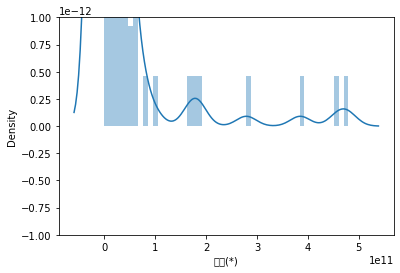

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  

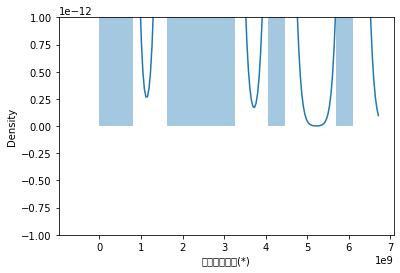

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  

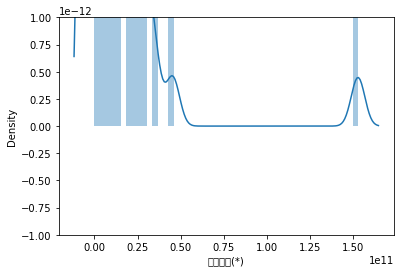

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51648 missing from current font.
  fo

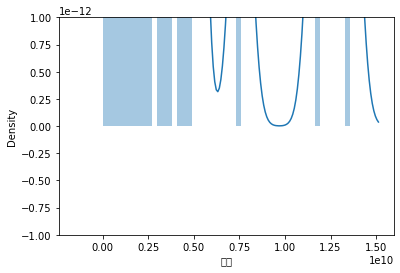

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45572 missing from current font.
  

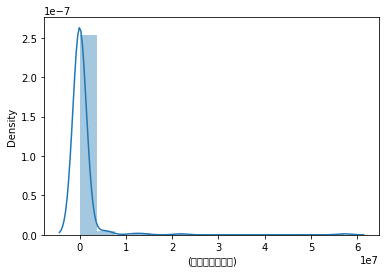

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  

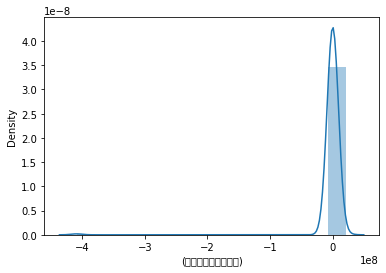

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  

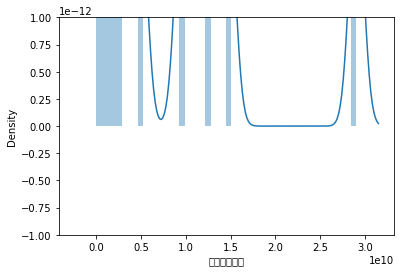

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45572 missing from current font.
  

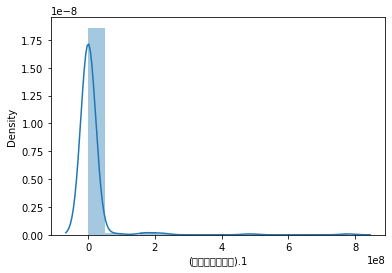

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  

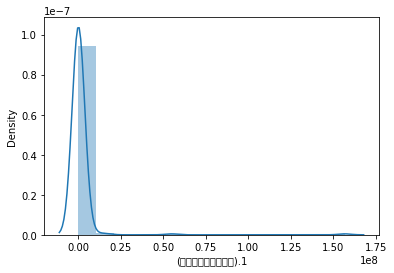

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  

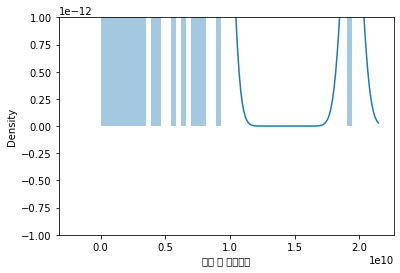

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44033 missing from current font.
  

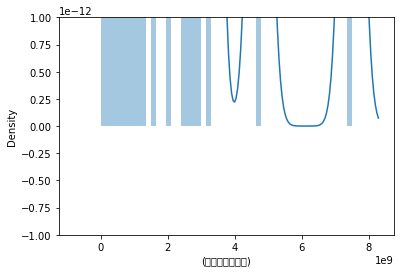

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45572 missing from current font.
  

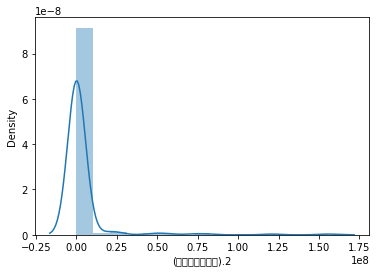

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  

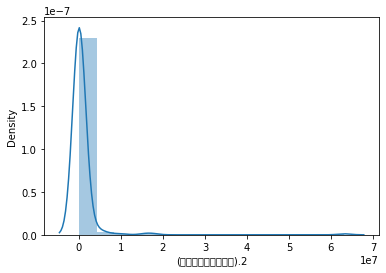

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  

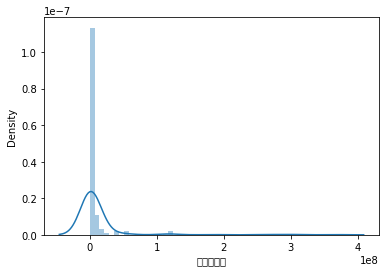

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44033 missing from current font.
  

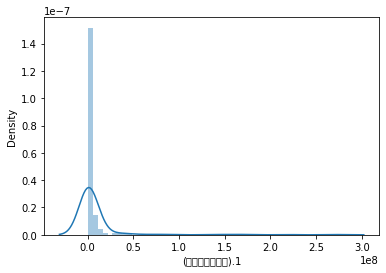

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45572 missing from current font.
  

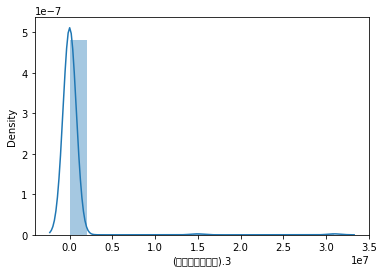

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  

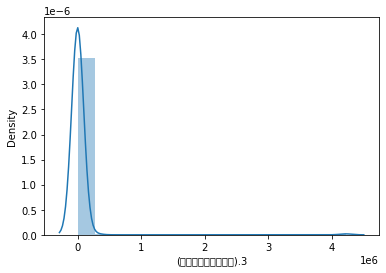

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44033 missing from current font.
  

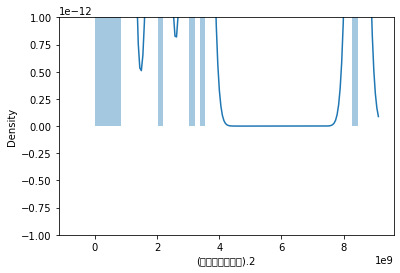

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45572 missing from current font.
  

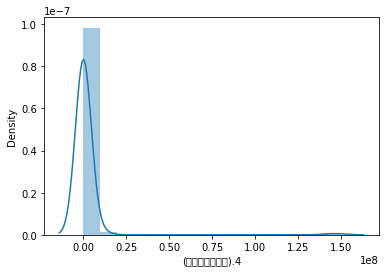

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  

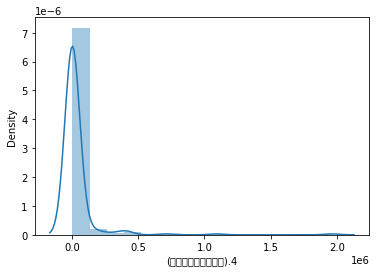

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  

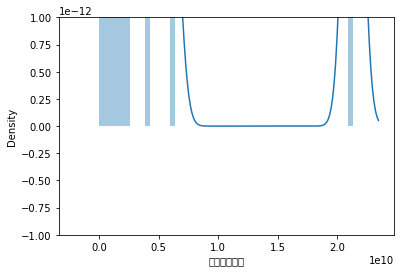

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44033 missing from current font.
  

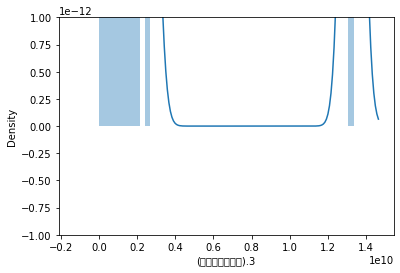

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45572 missing from current font.
  

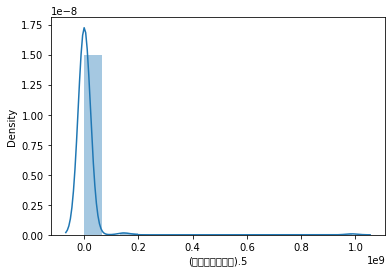

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  

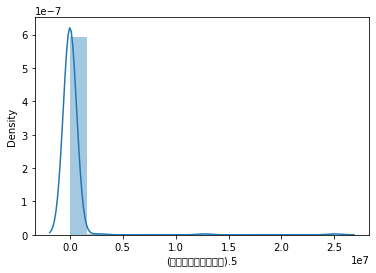

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  

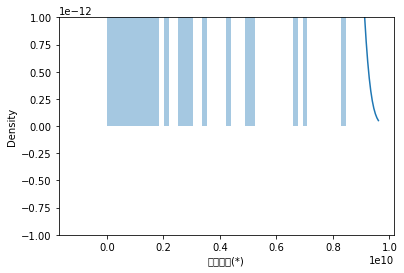

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50689 missing from current font.
  

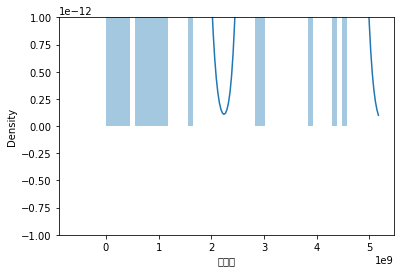

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font

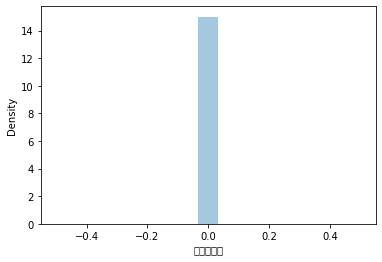

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44428 missing from current font.
  

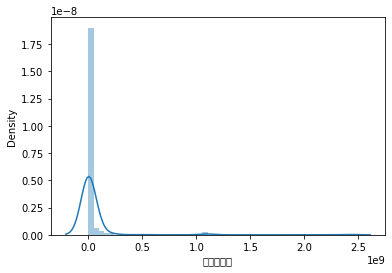

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44060 missing from current font.
  

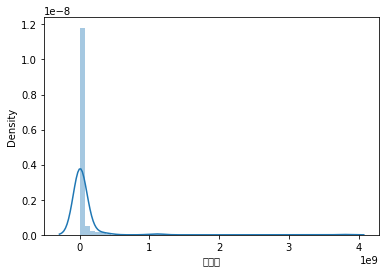

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52292 missing from current font.
  fo

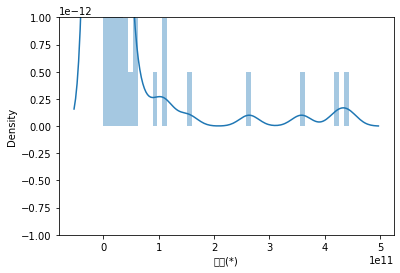

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48376 missing from current font.
  fo

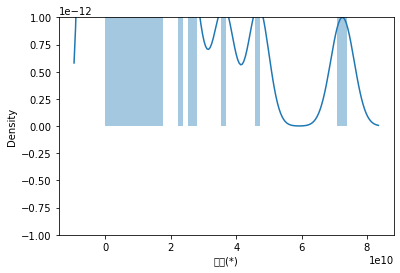

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  

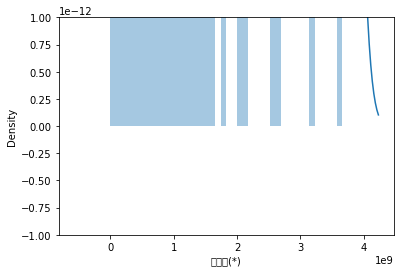

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  

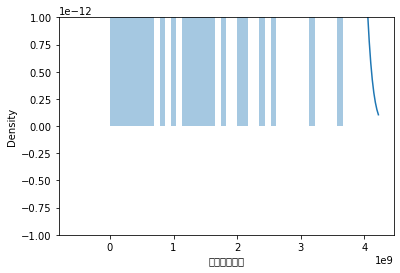

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  

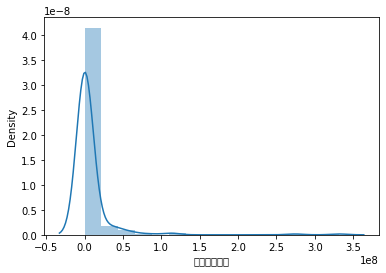

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51081 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  

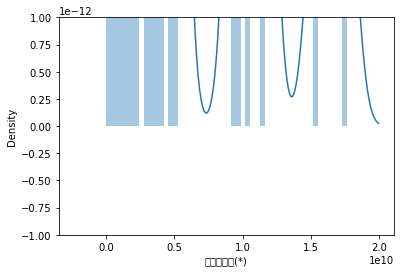

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  

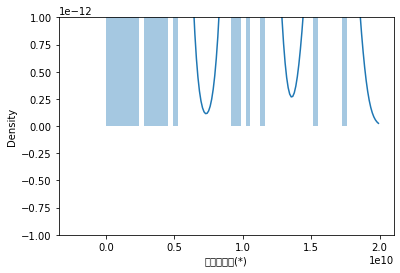

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  

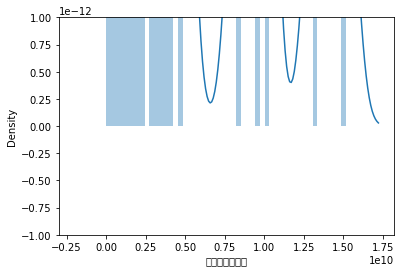

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  

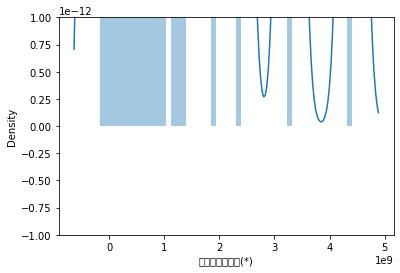

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  

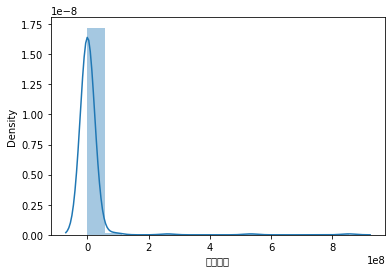

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48337 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  

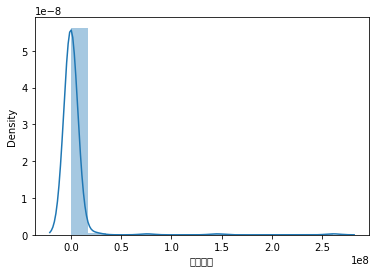

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font

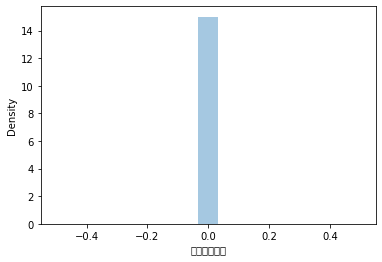

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font

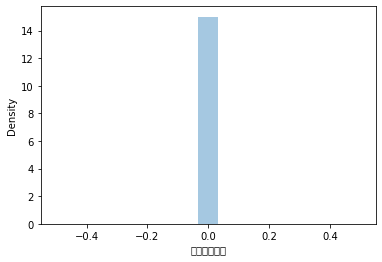

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  

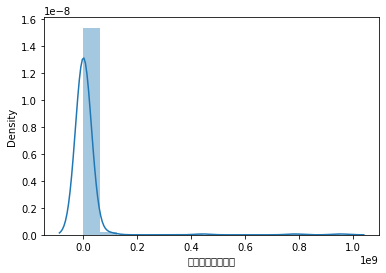

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  

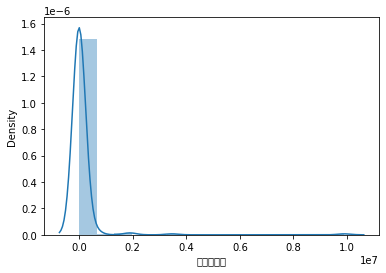

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  

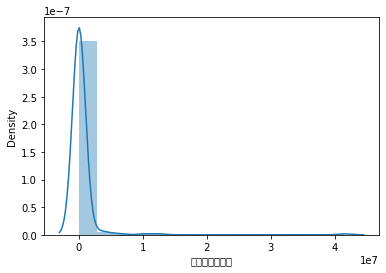

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  

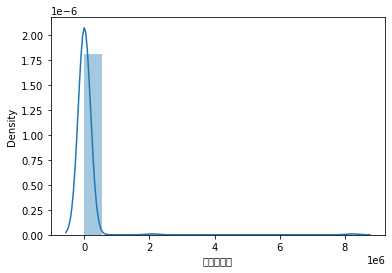

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53440 missing from current font.
  fo

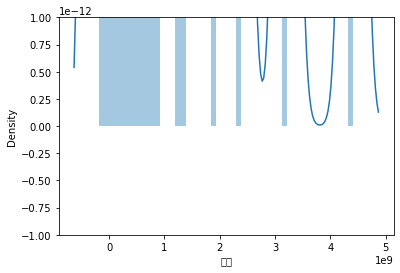

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  

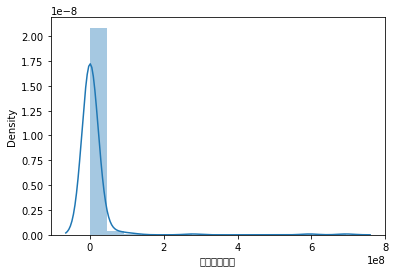

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  

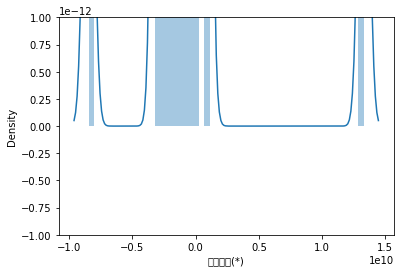

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  

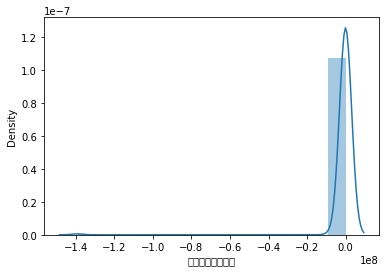

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  

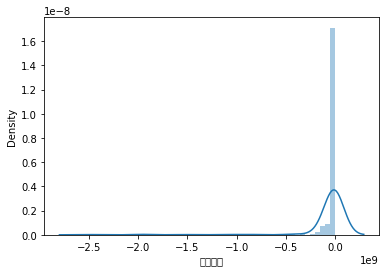

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  

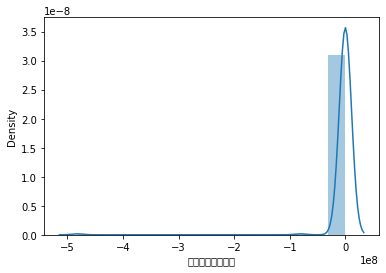

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44428 missing from current font.
  font

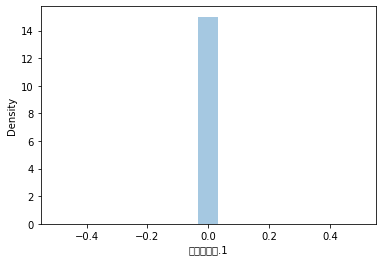

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font

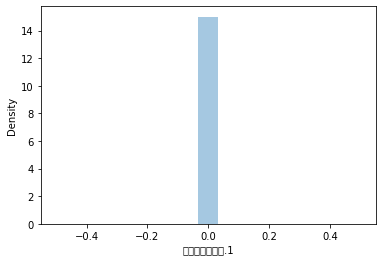

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font

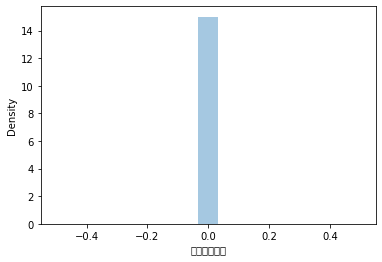

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52397 missing from current font.
  font

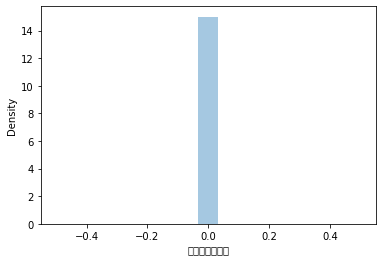

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  

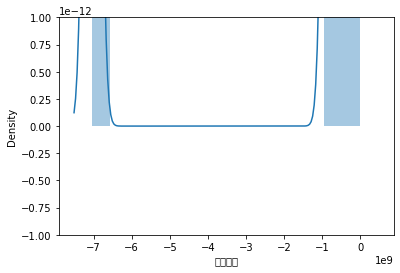

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font

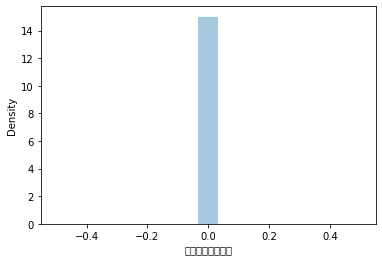

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  

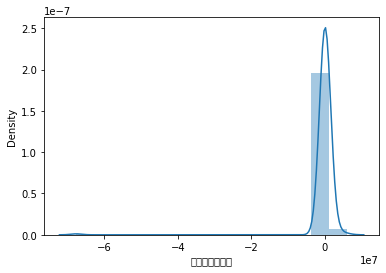

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  

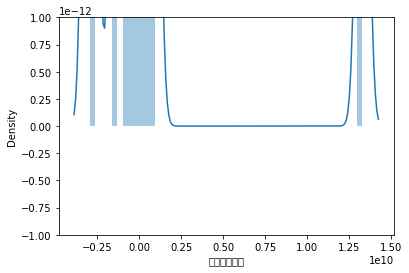

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44292 missing from current font.
  

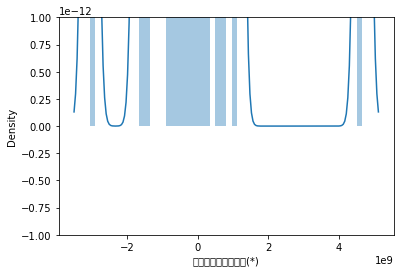

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  

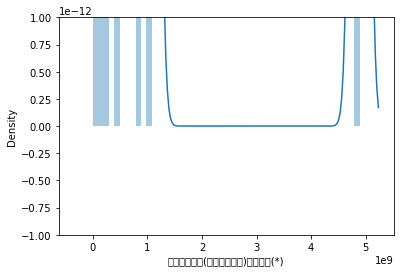

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45733 missing from current font.
  

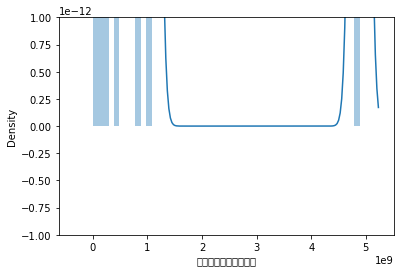

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  

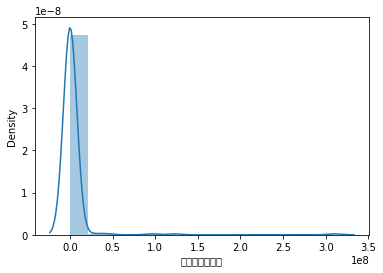

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font

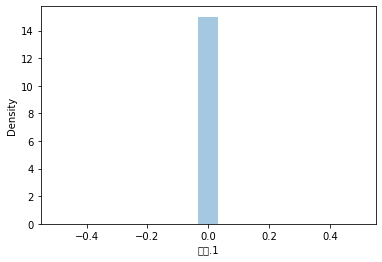

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  

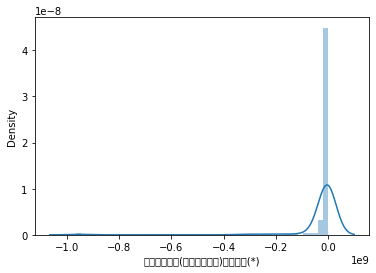

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45733 missing from current font.
  

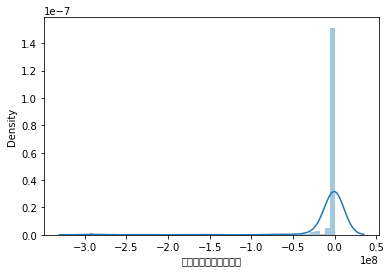

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  

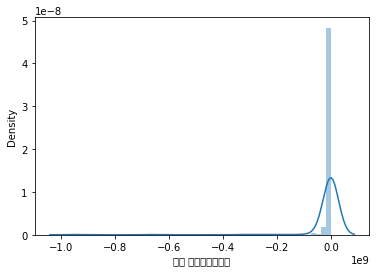

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53440 missing from current font.
  fo

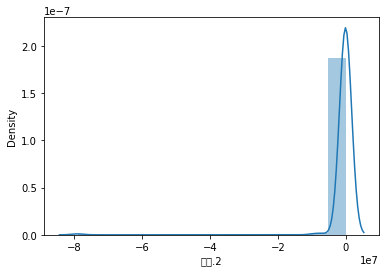

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  

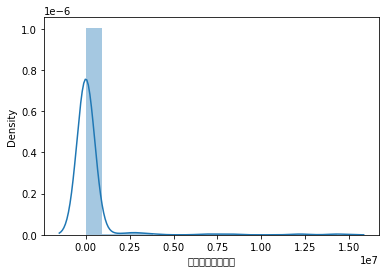

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  

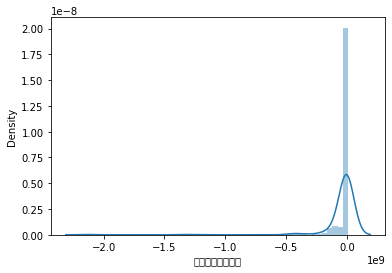

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  

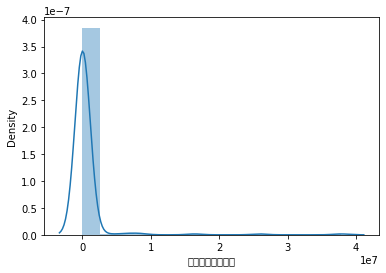

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  

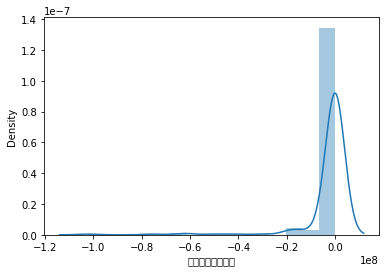

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54872 missing from current font.
  font

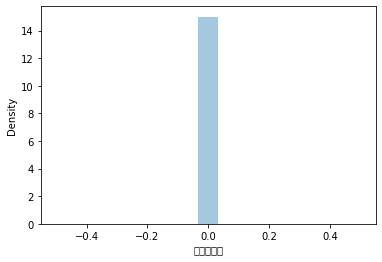

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54872 missing from current font.
  font

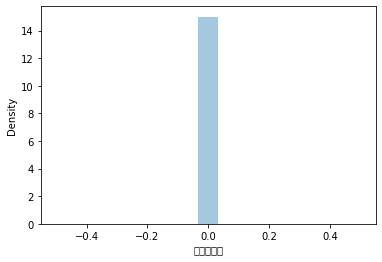

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53440 missing from current font.
  fo

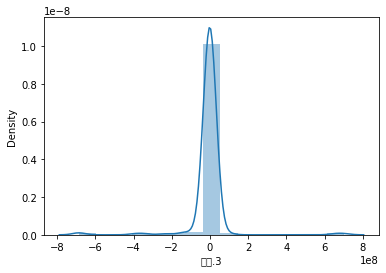

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51081 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  

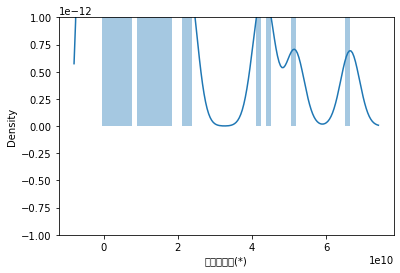

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  

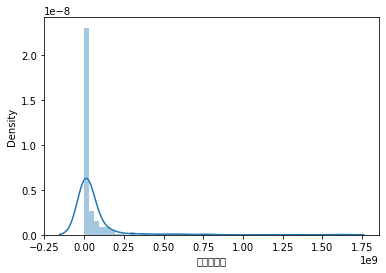

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  

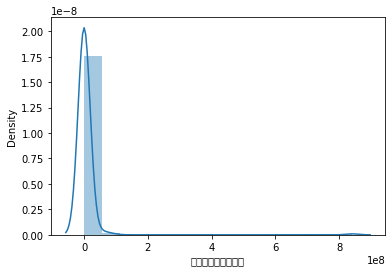

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47549 missing from current font.
  

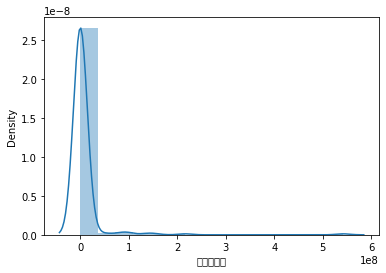

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  

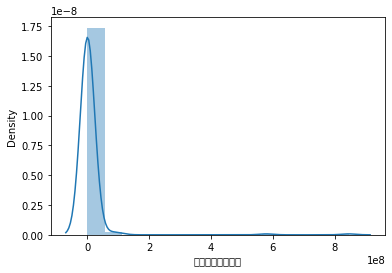

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font

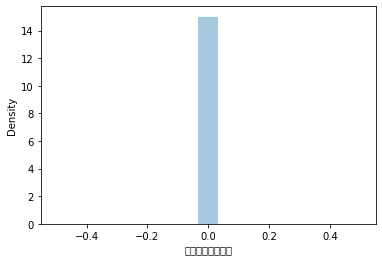

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47549 missing from current font.
  

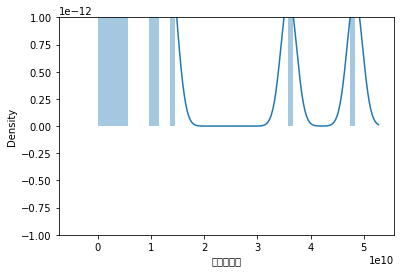

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  

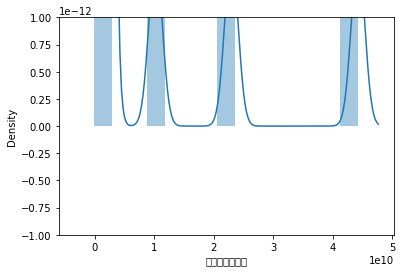

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  

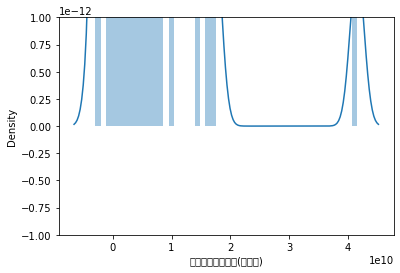

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font

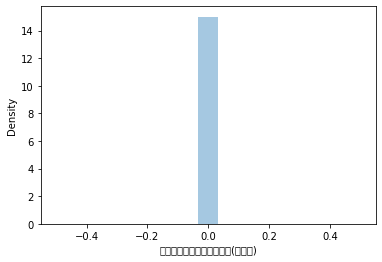

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  

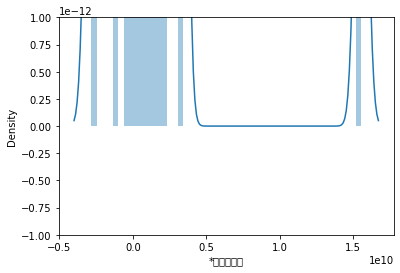

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font

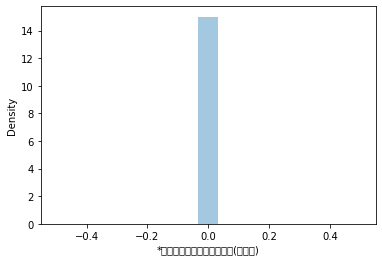

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  

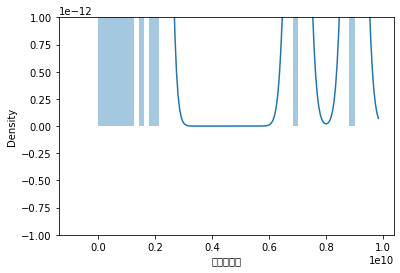

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  

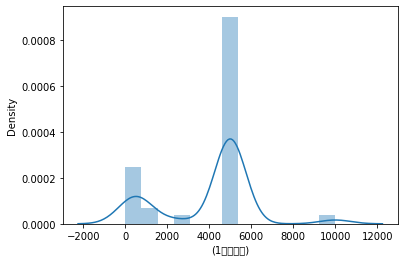

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  

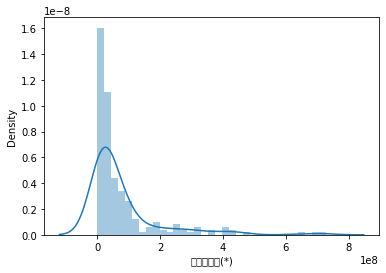

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48372 missing from current font.
  

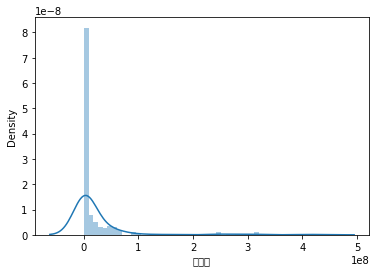

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50864 missing from current font.
  

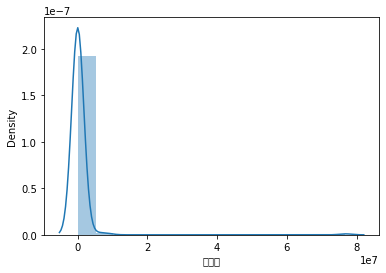

In [366]:
for i in df.drop(['회사명','회계년도','등급결정일','전망','등급','년도차이','거래소코드'],axis=1):
  sns.distplot(df[i])
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0, flags=flags)


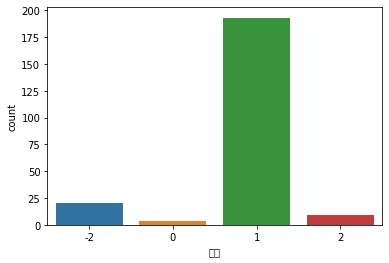

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0, flags=flags)


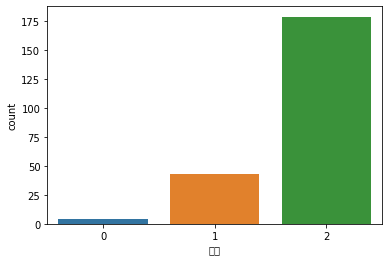

In [367]:
for i in df[['전망','등급']]:
  sns.countplot(df[i])
  plt.show()

In [368]:
for i in df.drop(['회사명','회계년도','등급결정일','전망','등급','년도차이','거래소코드'],axis=1).corr().columns:
  for x,y in zip(df.drop(['회사명','회계년도','등급결정일','전망','등급','년도차이','거래소코드'],axis=1).corr()[i],df.drop(['회사명','회계년도','등급결정일','전망','등급','년도차이','거래소코드'],axis=1).corr()[i].index):
    if x >=0.5 and x !=1:
      print(i,x,y)

자산(*) 0.9906707295452052 부채(*)
자산(*) 0.6611752616243136 자본(*)
자산(*) 0.6131726322886283 자본금(*)
자산(*) 0.5960730064375491 보통주자본금
자산(*) 0.7476004484977027 자본잉여금(*)
자산(*) 0.7472639066629548 자본준비금(*)
자산(*) 0.6704020796287973 주식발행초과금
자산(*) 0.7725867737930749 기타자본잉여금(*)
자산(*) 0.789761074549811 기타
자산(*) 0.5235363502427347 이익잉여금(*)
자산(*) 0.5520522910425952 발행주식수(*)
유형자산(*) 0.7545614376392229 토지
유형자산(*) 0.910852611418484 건설중인자산
유형자산(*) 0.8729222394621761 건물 및 부속설비
유형자산(*) 0.8485275738183246 (감가상각누계액)
유형자산(*) 0.8417141854424016 (국고보조금등차감액).2
유형자산(*) 0.5603326166140571 차량운반구
유형자산(*) 0.591607206281937 (감가상각누계액).1
유형자산(*) 0.8673374758550265 (국고보조금등차감액).3
유형자산(*) 0.8163767945275872 기타유형자산
유형자산(*) 0.8106289493709246 (감가상각누계액).3
유형자산(*) 0.74403584681216 자본(*)
유형자산(*) 0.5240256363232533 자본금(*)
유형자산(*) 0.5249828465730079 보통주자본금
유형자산(*) 0.5654294436092555 자본조정(*)
유형자산(*) 0.7815997295584333 기타자본조정
유형자산(*) 0.7132672533677159 이익잉여금(*)
유형자산(*) 0.7534747066429254 이익준비금
유형자산(*) 0.6839514471701212 임의적립금
토지 0.7545

In [369]:
df['등급']=df['등급'].replace(1,0)
df['등급']=df['등급'].replace(2,1)

In [370]:
x_data=df.drop(['회사명','회계년도','등급결정일','등급','년도차이','거래소코드'],axis=1)
y_data=df['등급']

In [371]:
x_data

,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,부의영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,기타자본잉여금(*),감자차익,합병차익,...,출자전환채무,신주청약증거금,감자차손,미교부주식배당금,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,기타.1,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,외화환산대,외화환산차,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,기타세법상적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),차기이월미처분이익잉여금(결손금),*당기순이익,*전기이월미처분이익잉여금(결손금),수권주식수,(1주당금액),발행주식수(*),보통주,우선주,전망
0,5.162064e+08,2.090047e+06,5.549078e+07,2.310685e+07,0.0,0.0,0.000000e+00,0.0,0.0,3.958002e+07,7.485504e+06,0.0,0.0,621632.0,539052.0,0.0,0.0,0.0,0.0,0.0,1.356494e+06,1.149658e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.001154e+08,3.160910e+08,8.000000e+06,8.000000e+06,0.0,8.251600e+04,8.251600e+04,0.000000e+00,82516.0,0.0,82516.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.080085e+08,0.0,0.0,4000000.0,0.0,0.0,1.355440e+07,0.000000e+00,290454063.0,0.0,33591094.0,0.0,5000000.0,5000.0,1600000.0,1600000.0,0.0,1
1,2.273688e+09,0.000000e+00,4.176436e+08,0.000000e+00,0.0,0.0,1.282104e+06,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,92025.0,90222.0,0.0,0.0,12319138.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,235455863.0,216101830.0,0.0,6091.0,0.0,1.119416e+09,1.154272e+09,5.263946e+07,5.263946e+07,0.0,4.393605e+08,4.393605e+08,4.393605e+08,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.741716e+06,9.135650e+05,9.135650e+05,0.0,0.0,0.0,0.0,0.0,0.0,828151.0,0.0,0.0,0.0,0.0,0.0,0.0,7.040096e+08,23942048.0,0.0,0.0,0.0,0.0,5.185200e+08,0.000000e+00,151547512.0,0.0,72491806.0,0.0,20000000.0,5000.0,10527893.0,10527893.0,0.0,2
2,2.186647e+09,0.000000e+00,1.202528e+07,6.084650e+06,0.0,0.0,2.400000e+05,0.0,0.0,7.307444e+06,1.022174e+06,0.0,1519898.0,0.0,0.0,0.0,0.0,2316260.0,0.0,16.0,0.000000e+00,0.000000e+00,0.0,0.0,2407474.0,0.0,0.0,387549.0,0.0,5.631461e+08,1.623501e+09,5.845745e+07,5.845745e+07,0.0,3.512393e+06,3.512393e+06,0.000000e+00,3512393.0,0.0,0.0,...,0.0,0.0,-3396090.0,0.0,0.0,0.0,1.045200e+09,1.047075e+09,1.047075e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1874569.0,5.198836e+08,5785000.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,514098638.0,0.0,53997431.0,0.0,30000000.0,5000.0,11691490.0,11691490.0,0.0,1
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,1.796166e+09,5.725964e+07,1.676430e+07,1.402635e+07,0.0,0.0,0.000000e+00,0.0,0.0,2.018042e+06,8.106250e+05,0.0,0.0,266650.0,266649.0,0.0,0.0,0.0,0.0,0.0,4.957677e+06,3.616048e+06,0.0,0.0,2142357.0,0.0,0.0,0.0,426235.0,1.592340e+09,2.038261e+08,1.704946e+07,1.704946e+07,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.275500e+04,0.000000e+00,0.000000e+00,0.0,0.0,-12755.0,-12755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.867894e+08,17049465.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,169739906.0,0.0,48601267.0,0.0,10000000.0,5000.0,3409893.0,3409893.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,1.675386e+10,0.00000

In [372]:
x_data.sum()[x_data.sum() == 0]

부의영업권                 0.0
자산수증이익                0.0
채무면제이익                0.0
전환권대가.1               0.0
신주인수권대가.1             0.0
출자전환채무                0.0
신주청약증거금               0.0
미교부주식배당금              0.0
기타.1                  0.0
외화환산대                 0.0
외화환산차                 0.0
기타세법상적립금              0.0
차기이월미처분이익잉여금(결손금)     0.0
*전기이월미처분이익잉여금(결손금)    0.0
dtype: float64

In [373]:
x_data=x_data.drop(['부의영업권','자산수증이익','채무면제이익','전환권대가.1','신주인수권대가.1','출자전환채무','신주청약증거금','미교부주식배당금','기타.1','외화환산대','외화환산차','기타세법상적립금','차기이월미처분이익잉여금(결손금)','*전기이월미처분이익잉여금(결손금)'],axis=1)
x_data

,자산(*),단기매매증권(*),유형자산(*),토지,(손상차손누계액),(국고보조금등차감액),건설중인자산,(손상차손누계액).1,(국고보조금등차감액).1,건물 및 부속설비,(감가상각누계액),(손상차손누계액).2,(국고보조금등차감액).2,차량운반구,(감가상각누계액).1,(손상차손누계액).3,(국고보조금등차감액).3,(감가상각누계액).2,(손상차손누계액).4,(국고보조금등차감액).4,기타유형자산,(감가상각누계액).3,(손상차손누계액).5,(국고보조금등차감액).5,무형자산(*),영업권,산업재산권,개발비,부채(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,기타자본잉여금(*),감자차익,합병차익,자기주식처분이익,전환권대가,신주인수권대가,교환권대가,기타,재평가적립금,자본조정(*),주식할인발행차금,자기주식,자기주식처분손익,감자차손,주식매수선택권,기타자본조정,기타포괄손익누계액(*),투자유가증권(장기투자증권)평가이익(*),매도가능증권평가이익,지분법자본변동,투자유가증권(장기투자증권)평가손실(*),매도가능증권평가손실,부의 지분법자본변동,기타.2,해외사업환산이익,해외사업환산손실,파생상품평가이익,파생상품평가손실,기타.3,이익잉여금(*),이익준비금,재무구조개선적립금,법정적립금,기업합리화적립금,임의적립금,기타이익잉여금,미처분이익잉여금(결손금),*당기순이익,수권주식수,(1주당금액),발행주식수(*),보통주,우선주,전망
0,5.162064e+08,2.090047e+06,5.549078e+07,2.310685e+07,0.0,0.0,0.000000e+00,0.0,0.0,3.958002e+07,7.485504e+06,0.0,0.0,621632.0,539052.0,0.0,0.0,0.0,0.0,0.0,1.356494e+06,1.149658e+06,0.0,0.0,0.0,0.0,0.0,0.0,2.001154e+08,3.160910e+08,8.000000e+06,8.000000e+06,0.0,8.251600e+04,8.251600e+04,0.000000e+00,82516.0,0.0,82516.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.080085e+08,0.0,0.0,4000000.0,0.0,1.355440e+07,0.000000e+00,290454063.0,33591094.0,5000000.0,5000.0,1600000.0,1600000.0,0.0,1
1,2.273688e+09,0.000000e+00,4.176436e+08,0.000000e+00,0.0,0.0,1.282104e+06,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,92025.0,90222.0,0.0,0.0,12319138.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,235455863.0,216101830.0,6091.0,0.0,1.119416e+09,1.154272e+09,5.263946e+07,5.263946e+07,0.0,4.393605e+08,4.393605e+08,4.393605e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-43479140.0,0.0,-43479140.0,0.0,0.0,0.0,0.0,1.741716e+06,9.135650e+05,9.135650e+05,0.0,0.0,0.0,0.0,0.0,828151.0,0.0,0.0,0.0,0.0,7.040096e+08,23942048.0,0.0,0.0,0.0,5.185200e+08,0.000000e+00,151547512.0,72491806.0,20000000.0,5000.0,10527893.0,10527893.0,0.0,2
2,2.186647e+09,0.000000e+00,1.202528e+07,6.084650e+06,0.0,0.0,2.400000e+05,0.0,0.0,7.307444e+06,1.022174e+06,0.0,1519898.0,0.0,0.0,0.0,0.0,2316260.0,0.0,16.0,0.000000e+00,0.000000e+00,0.0,0.0,2407474.0,0.0,387549.0,0.0,5.631461e+08,1.623501e+09,5.845745e+07,5.845745e+07,0.0,3.512393e+06,3.512393e+06,0.000000e+00,3512393.0,0.0,0.0,0.0,0.0,0.0,0.0,3512393.0,0.0,-3553302.0,-157197.0,-15.0,0.0,-3396090.0,0.0,0.0,1.045200e+09,1.047075e+09,1.047075e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1874569.0,5.198836e+08,5785000.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,514098638.0,53997431.0,30000000.0,5000.0,11691490.0,11691490.0,0.0,1
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,1.796166e+09,5.725964e+07,1.676430e+07,1.402635e+07,0.0,0.0,0.000000e+00,0.0,0.0,2.018042e+06,8.106250e+05,0.0,0.0,266650.0,266649.0,0.0,0.0,0.0,0.0,0.0,4.957677e+06,3.616048e+06,0.0,0.0,2142357.0,0.0,0.0,426235.0,1.592340e+09,2.038261e+08,1.704946e+07,1.704946e+07,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.275500e+04,0.000000e+00,0.000000e+00,0.0,-12755.0,-12755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.867894e+08,17049465.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,169739906.0,48601267.0,10000000.0,5000.0,3409893.0,3409893.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,1.675386e+10,0.000000e+00,1.040387

In [374]:
pval=pd.DataFrame()

for i in x_data.columns:
  model=sm.Logit(y_data,x_data[i]).fit()
  if model.pvalues.values <= 0.05:
    print(i,'의 pvalue :', model.pvalues.values)
    ii=pd.DataFrame([i])
    pv=pd.DataFrame(model.pvalues.values)
    pvv=pd.concat([ii,pv],axis=1)
    pval=pd.concat([pval,pvv],axis=0)
    pvv=pd.DataFrame()
pval

Optimization terminated successfully.
         Current function value: 0.646874
         Iterations 1
Optimization terminated successfully.
         Current function value: 0.675574
         Iterations 1
Optimization terminated successfully.
         Current function value: 0.654740
         Iterations 1
Optimization terminated successfully.
         Current function value: 0.651398
         Iterations 1
토지 의 pvalue : [0.01646384]
Optimization terminated successfully.
         Current function value: 0.692865
         Iterations 2
Optimization terminated successfully.
         Current function value: 0.690100
         Iterations 1
Optimization terminated successfully.
         Current function value: 0.674046
         Iterations 1
Optimization terminated successfully.
         Current function value: 0.679603
         Iterations 1
         Current function value: 0.662477
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.636031
         It

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[0.00036642]
Optimization terminated successfully.
         Current function value: 0.664135
         Iterations 4
우선주자본금 의 pvalue : [0.01446526]
Optimization terminated successfully.
         Current function value: 0.623615
         Iterations 1
자본잉여금(*) 의 pvalue : [0.0111391]
Optimization terminated successfully.
         Current function value: 0.623452
         Iterations 1
자본준비금(*) 의 pvalue : [0.01164419]
Optimization terminated successfully.
         Current function value: 0.624204
         Iterations 1
주식발행초과금 의 pvalue : [0.01280992]
Optimization terminated successfully.
         Current function value: 0.664284
         Iterations 1
기타자본잉여금(*) 의 pvalue : [0.04236476]
Optimization terminated successfully.
         Current function value: 0.686972
         Iterations 1
Optimization terminated successfully.
         Current function value: 0.685343
         Iterations 2
Optimization terminated successfully.
         Current function value: 0.689240
         Iterations 1
Optimiza

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


이익잉여금(*) 의 pvalue : [0.0253821]
Optimization terminated successfully.
         Current function value: 0.632793
         Iterations 1
이익준비금 의 pvalue : [0.01859641]
Optimization terminated successfully.
         Current function value: 0.688359
         Iterations 1
Optimization terminated successfully.
         Current function value: 0.686624
         Iterations 1
Optimization terminated successfully.
         Current function value: 0.686241
         Iterations 1
Optimization terminated successfully.
         Current function value: 0.664702
         Iterations 1
Optimization terminated successfully.
         Current function value: 0.686538
         Iterations 1
Optimization terminated successfully.
         Current function value: 0.640475
         Iterations 1
미처분이익잉여금(결손금) 의 pvalue : [0.04035595]
Optimization terminated successfully.
         Current function value: 0.666941
         Iterations 1
Optimization terminated successfully.
         Current function value: 0.654103
    

,0,0
0,토지,1.646384e-02
0,건물 및 부속설비,1.081451e-02
0,(감가상각누계액),2.358807e-02
0,(감가상각누계액).1,3.012231e-02
0,무형자산(*),3.274809e-02
0,자본(*),6.151380e-03
0,자본금(*),3.320975e-04
0,보통주자본금,3.664246e-04
0,우선주자본금,1.446526e-02
0,자본잉여금(*),1.113910e-02


In [375]:
pval.columns=['계정과목','pvalue']
pval=pval.reset_index()
pval=pval.drop(['index'],axis=1)
pval

,계정과목,pvalue
0,토지,1.646384e-02
1,건물 및 부속설비,1.081451e-02
2,(감가상각누계액),2.358807e-02
3,(감가상각누계액).1,3.012231e-02
4,무형자산(*),3.274809e-02
5,자본(*),6.151380e-03
6,자본금(*),3.320975e-04
7,보통주자본금,3.664246e-04
8,우선주자본금,1.446526e-02
9,자본잉여금(*),1.113910e-02


In [376]:
pval=pval.T
pval.columns=pval.iloc[0]
pval

계정과목,토지,건물 및 부속설비,(감가상각누계액),(감가상각누계액).1,무형자산(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,기타자본잉여금(*),파생상품평가손실,이익잉여금(*),이익준비금,미처분이익잉여금(결손금),(1주당금액),발행주식수(*),보통주,전망
계정과목,토지,건물 및 부속설비,(감가상각누계액),(감가상각누계액).1,무형자산(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,기타자본잉여금(*),파생상품평가손실,이익잉여금(*),이익준비금,미처분이익잉여금(결손금),(1주당금액),발행주식수(*),보통주,전망
pvalue,0.0164638,0.0108145,0.0235881,0.0301223,0.0327481,0.00615138,0.000332098,0.000366425,0.0144653,0.0111391,0.0116442,0.0128099,0.0423648,0.036284,0.0253821,0.0185964,0.040356,1.8301e-13,0.000153817,0.017529,3.10989e-12


In [377]:
x_data=x_data[pval.columns]
x_data

,토지,건물 및 부속설비,(감가상각누계액),(감가상각누계액).1,무형자산(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,기타자본잉여금(*),파생상품평가손실,이익잉여금(*),이익준비금,미처분이익잉여금(결손금),(1주당금액),발행주식수(*),보통주,전망
0,2.310685e+07,3.958002e+07,7.485504e+06,539052.0,0.0,3.160910e+08,8.000000e+06,8.000000e+06,0.0,8.251600e+04,8.251600e+04,0.000000e+00,82516.0,0.0,3.080085e+08,0.0,290454063.0,5000.0,1600000.0,1600000.0,1
1,0.000000e+00,0.000000e+00,0.000000e+00,90222.0,235455863.0,1.154272e+09,5.263946e+07,5.263946e+07,0.0,4.393605e+08,4.393605e+08,4.393605e+08,0.0,0.0,7.040096e+08,23942048.0,151547512.0,5000.0,10527893.0,10527893.0,2
2,6.084650e+06,7.307444e+06,1.022174e+06,0.0,2407474.0,1.623501e+09,5.845745e+07,5.845745e+07,0.0,3.512393e+06,3.512393e+06,0.000000e+00,3512393.0,0.0,5.198836e+08,5785000.0,514098638.0,5000.0,11691490.0,11691490.0,1
3,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,2
4,1.402635e+07,2.018042e+06,8.106250e+05,266649.0,2142357.0,2.038261e+08,1.704946e+07,1.704946e+07,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,1.867894e+08,17049465.0,169739906.0,5000.0,3409893.0,3409893.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,4.701891e+09,6.366274e+09,2.631916e+09,0.0,288065471.0,8.857496e+09,1.393791e+08,1.393791e+08,0.0,4.616006e+09,4.572503e+09,4.193534e+09,378968900.0,0.0,2.772676e+09,28000000.0,297136000.0,5000.0,27875819.0,0.0,1
222,4.618280e+08,6.528939e+09,2.991445e+09,0.0,987642000.0,1.488625e+10,1.789079e+09,1.789079e+09,0.0,2.251113e+09,2.251113e+09,2.251113e+09,0.0,0.0,1.023996e+10,0.0,0.0,5000.0,357815700.0,0.0,-2
223,0.000000e+00,0.000000e+00,0.000000e+00,349420.0,24716577.0,8.869190e+08,1.466856e+08,1.466856e+08,0.0,3.123746e+08,3.123746e+08,0.000000e+00,312374588.0,0.0,2.935185e+08,15577309.0,35296358.0,5000.0,29337111.0,0.0,1
224,3.613033e+06,9.495108e+06,2.496810e+06,452205.0,1134725.0,2.172040e+07,3.399548e+07,3.399548e+07,0.0,6.707166e+07,6.707166e+07,5.818117e+07,8890497.0,0.0,-7.120137e+07,0.0,-71201371.0,500.0,67990951.0,0.0,0


In [378]:
x_data.describe()

,토지,건물 및 부속설비,(감가상각누계액),(감가상각누계액).1,무형자산(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,기타자본잉여금(*),파생상품평가손실,이익잉여금(*),이익준비금,미처분이익잉여금(결손금),(1주당금액),발행주식수(*),보통주,전망
count,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,226.000000,2.260000e+02,2.260000e+02,226.000000
mean,6.459559e+08,7.756906e+08,2.589683e+08,7.807905e+06,4.117816e+08,4.086804e+09,3.204248e+08,3.130033e+08,7.421493e+06,9.314076e+08,9.213846e+08,7.655251e+08,1.558595e+08,-2.799578e+06,2.647106e+09,5.460982e+07,1.054601e+09,3983.628319,7.619543e+07,2.149756e+07,0.756637
std,1.551706e+09,2.030668e+09,7.860414e+08,3.049879e+07,1.143814e+09,9.478074e+09,5.636746e+08,5.554021e+08,3.222127e+07,2.284918e+09,2.283293e+09,2.005410e+09,4.682854e+08,1.159099e+07,7.518723e+09,1.533941e+08,3.578949e+09,2213.182148,1.185546e+08,6.148575e+07,0.893470
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.610945e+06,-4.610945e+06,0.000000e+00,-1.648710e+08,-1.022130e+08,-3.972995e+08,0.000000e+00,-2.984242e+09,0.000000,0.000000e+00,0.000000e+00,-2.000000
25%,1.436506e+07,9.620081e+06,6.407858e+05,0.000000e+00,4.269597e+06,3.134065e+08,2.811606e+07,2.531433e+07,0.000000e+00,2.995261e+07,2.940734e+07,9.414116e+06,0.000000e+00,0.000000e+00,7.110410e+07,0.000000e+00,1.112089e+07,2500.000000,1.171092e+07,0.000000e+00,1.000000
50%,9.675011e+07,1.000409e+08,2.381660e+07,5.002400e+04,2.586822e+07,9.395161e+08,1.114247e+08,1.091804e+08,0.000000e+00,1.902563e+08,1.759973e+08,1.158067e+08,1.386746e+06,0.000000e+00,4.550898e+08,9.342187e+06,1.533889e+08,5000.000000,3.083771e+07,0.000000e+00,1.000000
75%,5.986437e+08,5.355737e+08,1.077312e+08,1.703188e+06,1.700655e+08,3.568656e+09,2.960897e+08,2.956270e+08,0.000000e+00,7.972635e+08,7.818896e+08,5.174878e+08,7.919498e+07,0.000000e+00,1.834576e+09,3.457500e+07,7.023280e+08,5000.000000,8.041823e+07,1.353601e+07,1.000000
max,1.355429e+10,1.943154e+10,7.494176e+09,2.713810e+08,8.452073e+09,7.389601e+10,3.657652e+09,3.657652e+09,3.310110e+08,1.760299e+10,1.760299e+10,1.519045e+10,4.412718e+09,0.000000e+00,6.649008e+10,1.604910e+09,4.161914e+10,10000.000000,7.280024e+08,4.324382e+08,2.000000


In [379]:
Scaler=MinMaxScaler()
x_scale=pd.DataFrame(Scaler.fit_transform(x_data))
x_scale.columns=x_data.columns
x_scale

,토지,건물 및 부속설비,(감가상각누계액),(감가상각누계액).1,무형자산(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,기타자본잉여금(*),파생상품평가손실,이익잉여금(*),이익준비금,미처분이익잉여금(결손금),(1주당금액),발행주식수(*),보통주,전망
0,0.001705,0.002037,0.000999,0.001986,0.000000,0.004278,0.002187,0.002187,0.000000,0.000267,0.000267,0.000000,0.036035,1.0,0.010545,0.000000,0.073418,0.50,0.002198,0.003700,0.75
1,0.000000,0.000000,0.000000,0.000332,0.027858,0.015620,0.014392,0.014392,0.000000,0.025215,0.025215,0.028923,0.036017,1.0,0.016465,0.014918,0.070304,0.50,0.014461,0.024345,1.00
2,0.000449,0.000376,0.000136,0.000000,0.000285,0.021970,0.015982,0.015982,0.000000,0.000461,0.000461,0.000000,0.036784,1.0,0.013712,0.003605,0.078432,0.50,0.016060,0.027036,0.75
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000262,0.000262,0.000000,0.036017,1.0,0.005940,0.000000,0.066906,0.00,0.000000,0.000000,1.00
4,0.001035,0.000104,0.000108,0.000983,0.000253,0.002758,0.004661,0.004661,0.000000,0.000262,0.000262,0.000000,0.036017,1.0,0.008732,0.010623,0.070712,0.50,0.004684,0.007885,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.346893,0.327626,0.351195,0.000000,0.034082,0.119864,0.038106,0.038106,0.000000,0.262422,0.259951,0.276064,0.118805,1.0,0.047393,0.017446,0.073568,0.50,0.038291,0.000000,0.75
222,0.034072,0.335997,0.399169,0.000000,0.116852,0.201449,0.489133,0.489133,0.000000,0.128111,0.128111,0.148193,0.036017,1.0,0.159032,0.000000,0.066906,0.50,0.491503,0.000000,0.00
223,0.000000,0.000000,0.000000,0.001288,0.002924,0.012002,0.040104,0.040104,0.000000,0.018003,0.018003,0.000000,0.104257,1.0,0.010328,0.009706,0.067698,0.50,0.040298,0.000000,0.75
224,0.000267,0.000489,0.000333,0.001666,0.000134,0.000294,0.009294,0.009294,0.000000,0.004071,0.004071,0.003830,0.037959,1.0,0.004875,0.000000,0.065310,0.05,0.093394,0.000000,0.50


In [380]:
x_scale.describe()

,토지,건물 및 부속설비,(감가상각누계액),(감가상각누계액).1,무형자산(*),자본(*),자본금(*),보통주자본금,우선주자본금,자본잉여금(*),자본준비금(*),주식발행초과금,기타자본잉여금(*),파생상품평가손실,이익잉여금(*),이익준비금,미처분이익잉여금(결손금),(1주당금액),발행주식수(*),보통주,전망
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.00000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,0.047657,0.039919,0.034556,0.028771,0.048720,0.055305,0.087604,0.085575,0.022421,0.053160,0.052591,0.050395,0.070065,0.97261,0.045515,0.034027,0.090550,0.398363,0.104664,0.049712,0.689159
std,0.114481,0.104504,0.104887,0.112384,0.135329,0.128262,0.154108,0.151847,0.097342,0.129769,0.129677,0.132018,0.102300,0.11340,0.112409,0.095578,0.080239,0.221318,0.162849,0.142184,0.223368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001060,0.000495,0.000086,0.000000,0.000505,0.004241,0.007687,0.006921,0.000000,0.001963,0.001932,0.000620,0.036017,1.00000,0.007003,0.000000,0.067156,0.250000,0.016086,0.000000,0.750000
50%,0.007138,0.005148,0.003178,0.000184,0.003061,0.012714,0.030463,0.029850,0.000000,0.011067,0.010257,0.007624,0.036320,1.00000,0.012744,0.005821,0.070345,0.500000,0.042359,0.000000,0.750000
75%,0.044166,0.027562,0.014375,0.006276,0.020121,0.048293,0.080951,0.080824,0.000000,0.045541,0.044668,0.034067,0.053318,1.00000,0.033368,0.021543,0.082652,0.500000,0.110464,0.031302,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [381]:
train_x, test_x, train_y, test_y = train_test_split(x_scale, y_data, random_state=42, test_size=0.2)

In [383]:
print(len(train_x))
print(len(train_y))
print(len(test_x))
print(len(test_y))

180
180
46
46


In [395]:
model1=DecisionTreeClassifier()

parameter=[{'criterion' : ['gini','entropy'], 'splitter' : ['best','random'],
            'max_depth' : [None, 30, 50, 70, 100], 'max_features' : [None, 'auto', 'sqrt', 'log2'], 'random_state' : [42]}]
hyper_model1=GridSearchCV(model1,parameter,cv=10,scoring='accuracy',return_train_score=True)
hyper_model1.fit(train_x,train_y)
print('최적의 추정기 :',hyper_model1.best_estimator_)
print('최적의 파라미터 :',hyper_model1.best_params_)
print('최고의 성능점수 :',hyper_model1.best_score_)

hyper_model1_score=cross_val_score(hyper_model1.best_estimator_,train_x,train_y,scoring='accuracy',cv=10)
print('교차검증 성능점수 :',hyper_model1_score)
print('교차검증 평균점수 :',hyper_model1_score.mean())

최적의 추정기 : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='random')
최적의 파라미터 : {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'random_state': 42, 'splitter': 'random'}
최고의 성능점수 : 0.7944444444444444
교차검증 성능점수 : [0.77777778 0.72222222 0.88888889 0.83333333 0.88888889 0.88888889
 0.77777778 0.77777778 0.61111111 0.77777778]
교차검증 평균점수 : 0.7944444444444444


In [401]:
model2=RandomForestClassifier()

parameter=[{'n_estimators' : [10, 30, 50],'criterion' : ['gini','entropy'], 'max_depth' : [None, 30, 50], 'max_features' : [None, 'auto', 'sqrt', 'log2'], 'random_state' : [42]}]
hyper_model2=GridSearchCV(model2,parameter,cv=10,scoring='accuracy',return_train_score=True)
hyper_model2.fit(train_x,train_y)
print('최적의 추정기 :',hyper_model2.best_estimator_)
print('최적의 파라미터 :',hyper_model2.best_params_)
print('최고의 성능점수 :',hyper_model2.best_score_)

hyper_model2_score=cross_val_score(hyper_model2.best_estimator_,train_x,train_y,scoring='accuracy',cv=10)
print('교차검증 성능점수 :',hyper_model2_score)
print('교차검증 평균점수 :',hyper_model2_score.mean())

최적의 추정기 : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
최적의 파라미터 : {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 30, 'random_state': 42}
최고의 성능점수 : 0.8777777777777779
교차검증 성능점수 : [0.77777778 0.77777778 0.94444444 0.72222222 0.88888889 0.94444444
 0.94444444 0.88888889 0.94444444 0.94444444]
교차검증 평균점수 : 0.8777777777777779


In [437]:
model3=lgb.LGBMClassifier()


parameter=[{'learning_rate' : [0.01, 0.03, 0.05],'boosting' : ['gbdt','dart','goss'], 'objective' : ['binary'], 'metric' : ['cross_entropy','accuracy','binary_logloss'], 
            'random_state' : [42], 'is_training_metric' : [True, False], 'feature_fraction' : [0.2, 0.5, 0.8], 'bagging_fraction' : [0.2, 0.5, 0.8], 'seed' : [2021], 'importance_type' : ['gain','split']}]
hyper_model3=GridSearchCV(model3,parameter,cv=10,scoring='accuracy',return_train_score=True)
hyper_model3.fit(train_x,train_y)

print('최적의 추정기 :',hyper_model3.best_estimator_)
print('최적의 파라미터 :',hyper_model3.best_params_)
print('최고의 성능점수 :',hyper_model3.best_score_)

hyper_model3_score=cross_val_score(hyper_model3.best_estimator_,train_x,train_y,scoring='accuracy',cv=10)
print('교차검증 성능점수 :',hyper_model3_score)
print('교차검증 평균점수 :',hyper_model3_score.mean())

최적의 추정기 : LGBMClassifier(bagging_fraction=0.2, boosting='gbdt', boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='gain', is_training_metric=True,
               learning_rate=0.05, max_depth=-1, metric='cross_entropy',
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, seed=2021,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
최적의 파라미터 : {'bagging_fraction': 0.2, 'boosting': 'gbdt', 'feature_fraction': 0.5, 'importance_type': 'gain', 'is_training_metric': True, 'learning_rate': 0.05, 'metric': 'cross_entropy', 'objective': 'binary', 'random_state': 42, 'seed': 2021}
최고의 성능점수 : 0.8777777777777779
교차검증 성능점수 : [0.77777778 0.83333333 0.94444444 0.88888889 0.94444444 0.88888889
 0.9444444

In [413]:
model4=xgb.XGBClassifier()

parameter=[{'booster' : ['gbtree','gblinear','dart'],'validate_parameters' : [True, False], 'eta' : ['0.1','0.3','0.5'], 'gamma' : [0, 0.5, 1], 'max_depth' : [0, 3, 6, 9],
            'random_state' : [42], 'seed' : [2021]}]
hyper_model4=GridSearchCV(model4,parameter,cv=10,scoring='accuracy',return_train_score=True)
hyper_model4.fit(train_x,train_y)

print('최적의 추정기 :',hyper_model4.best_estimator_)
print('최적의 파라미터 :',hyper_model4.best_params_)
print('최고의 성능점수 :',hyper_model4.best_score_)

hyper_model4_score=cross_val_score(hyper_model4.best_estimator_,train_x,train_y,scoring='accuracy',cv=10)
print('교차검증 성능점수 :',hyper_model4_score)
print('교차검증 평균점수 :',hyper_model4_score.mean())

최적의 추정기 : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta='0.1', gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=2021,
              silent=None, subsample=1, validate_parameters=True, verbosity=1)
최적의 파라미터 : {'booster': 'gbtree', 'eta': '0.1', 'gamma': 0.5, 'max_depth': 3, 'random_state': 42, 'seed': 2021, 'validate_parameters': True}
최고의 성능점수 : 0.8722222222222221
교차검증 성능점수 : [0.83333333 0.77777778 0.94444444 0.77777778 0.94444444 0.94444444
 0.88888889 0.83333333 0.83333333 0.94444444]
교차검증 평균점수 : 0.8722222222222221


In [415]:
train_1_result=hyper_model1.best_estimator_.predict(train_x)
test_1_result=hyper_model1.best_estimator_.predict(test_x)

train_2_result=hyper_model2.best_estimator_.predict(train_x)
test_2_result=hyper_model2.best_estimator_.predict(test_x)

train_3_result=hyper_model3.best_estimator_.predict(train_x)
test_3_result=hyper_model3.best_estimator_.predict(test_x)

train_4_result=hyper_model4.best_estimator_.predict(train_x)
test_4_result=hyper_model4.best_estimator_.predict(test_x)

In [418]:
train_1_result

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1])

In [416]:
print('훈련 데이터 Accuracy : %s' % accuracy_score(train_y, train_1_result))
print()

print('훈련 데이터 Precision : %s' % precision_score(train_y, train_1_result))
print()

print('훈련 데이터 Recall : %s' % recall_score(train_y, train_1_result))
print()

print('훈련 데이터 f1_score : %s' % f1_score(train_y, train_1_result))
print()

print('훈련 데이터 roc_auc_score : %s' % roc_auc_score(train_y, train_1_result))

훈련 데이터 Accuracy : 1.0

훈련 데이터 Precision : 1.0

훈련 데이터 Recall : 1.0

훈련 데이터 f1_score : 1.0

훈련 데이터 roc_auc_score : 1.0


In [422]:
print('테스트 데이터 Accuracy : %s' % accuracy_score(test_y, test_1_result))
print()

print('테스트 데이터 Precision : %s' % precision_score(test_y, test_1_result))
print()

print('테스트 데이터 Recall : %s' % recall_score(test_y, test_1_result))
print()

print('테스트 데이터 f1_score : %s' % f1_score(test_y, test_1_result))
print()

print('테스트 데이터 roc_auc_score : %s' % roc_auc_score(test_y, test_1_result))

테스트 데이터 Accuracy : 0.7608695652173914

테스트 데이터 Precision : 0.8378378378378378

테스트 데이터 Recall : 0.8611111111111112

테스트 데이터 f1_score : 0.8493150684931507

테스트 데이터 roc_auc_score : 0.6305555555555555


In [420]:
print('훈련 데이터 Accuracy : %s' % accuracy_score(train_y, train_2_result))
print()

print('훈련 데이터 Precision : %s' % precision_score(train_y, train_2_result))
print()

print('훈련 데이터 Recall : %s' % recall_score(train_y, train_2_result))
print()

print('훈련 데이터 f1_score : %s' % f1_score(train_y, train_2_result))
print()

print('훈련 데이터 roc_auc_score : %s' % roc_auc_score(train_y, train_2_result))

훈련 데이터 Accuracy : 1.0

훈련 데이터 Precision : 1.0

훈련 데이터 Recall : 1.0

훈련 데이터 f1_score : 1.0

훈련 데이터 roc_auc_score : 1.0


In [423]:
print('테스트 데이터 Accuracy : %s' % accuracy_score(test_y, test_2_result))
print()

print('테스트 데이터 Precision : %s' % precision_score(test_y, test_2_result))
print()

print('테스트 데이터 Recall : %s' % recall_score(test_y, test_2_result))
print()

print('테스트 데이터 f1_score : %s' % f1_score(test_y, test_2_result))
print()

print('테스트 데이터 roc_auc_score : %s' % roc_auc_score(test_y, test_2_result))

테스트 데이터 Accuracy : 0.8260869565217391

테스트 데이터 Precision : 0.85

테스트 데이터 Recall : 0.9444444444444444

테스트 데이터 f1_score : 0.8947368421052632

테스트 데이터 roc_auc_score : 0.6722222222222223


In [438]:
print('테스트 데이터 Accuracy : %s' % accuracy_score(test_y, test_3_result))
print()

print('테스트 데이터 Precision : %s' % precision_score(test_y, test_3_result))
print()

print('테스트 데이터 Recall : %s' % recall_score(test_y, test_3_result))
print()

print('테스트 데이터 f1_score : %s' % f1_score(test_y, test_3_result))
print()

print('테스트 데이터 roc_auc_score : %s' % roc_auc_score(test_y, test_3_result))

테스트 데이터 Accuracy : 0.8260869565217391

테스트 데이터 Precision : 0.85

테스트 데이터 Recall : 0.9444444444444444

테스트 데이터 f1_score : 0.8947368421052632

테스트 데이터 roc_auc_score : 0.6722222222222223


In [425]:
print('테스트 데이터 Accuracy : %s' % accuracy_score(test_y, test_4_result))
print()

print('테스트 데이터 Precision : %s' % precision_score(test_y, test_4_result))
print()

print('테스트 데이터 Recall : %s' % recall_score(test_y, test_4_result))
print()

print('테스트 데이터 f1_score : %s' % f1_score(test_y, test_4_result))
print()

print('테스트 데이터 roc_auc_score : %s' % roc_auc_score(test_y, test_4_result))

테스트 데이터 Accuracy : 0.8260869565217391

테스트 데이터 Precision : 0.85

테스트 데이터 Recall : 0.9444444444444444

테스트 데이터 f1_score : 0.8947368421052632

테스트 데이터 roc_auc_score : 0.6722222222222223


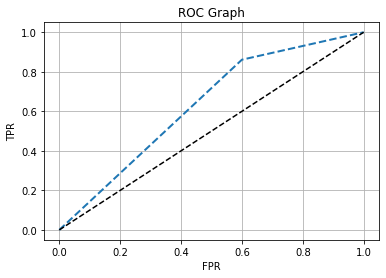

In [426]:
fpr, tpr, thresholds = roc_curve(test_y, test_1_result)

plt.plot(fpr, tpr, '--', linewidth=2 )
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Graph')
plt.grid()
plt.show()

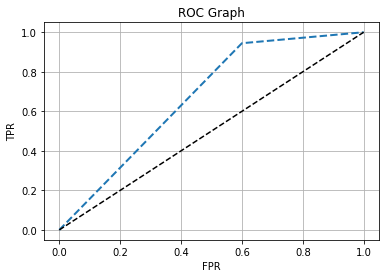

In [427]:
fpr, tpr, thresholds = roc_curve(test_y, test_2_result)

plt.plot(fpr, tpr, '--', linewidth=2 )
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Graph')
plt.grid()
plt.show()

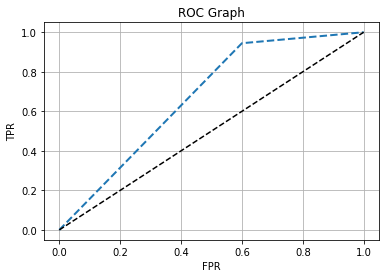

In [439]:
fpr, tpr, thresholds = roc_curve(test_y, test_3_result)

plt.plot(fpr, tpr, '--', linewidth=2 )
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Graph')
plt.grid()
plt.show()

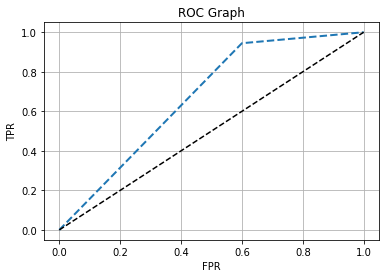

In [429]:
fpr, tpr, thresholds = roc_curve(test_y, test_4_result)

plt.plot(fpr, tpr, '--', linewidth=2 )
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Graph')
plt.grid()
plt.show()

In [431]:
d={'Stats' : test_x.columns, 'F1' : hyper_model1.best_estimator_.feature_importances_}
d=pd.DataFrame(d)
d=d.sort_values(by='F1', ascending=0)
d_drop = d[d.Stats != '+/-']
fig =px.bar_polar(d_drop, r='F1', theta='Stats', color='Stats', template='plotly_dark',
                  color_discrete_sequence = px.colors.sequential.Plasma_r)
fig.show()

In [432]:
d={'Stats' : test_x.columns, 'F1' : hyper_model2.best_estimator_.feature_importances_}
d=pd.DataFrame(d)
d=d.sort_values(by='F1', ascending=0)
d_drop = d[d.Stats != '+/-']
fig =px.bar_polar(d_drop, r='F1', theta='Stats', color='Stats', template='plotly_dark',
                  color_discrete_sequence = px.colors.sequential.Plasma_r)
fig.show()

In [440]:
d={'Stats' : test_x.columns, 'F1' : hyper_model3.best_estimator_.feature_importances_}
d=pd.DataFrame(d)
d=d.sort_values(by='F1', ascending=0)
d_drop = d[d.Stats != '+/-']
fig =px.bar_polar(d_drop, r='F1', theta='Stats', color='Stats', template='plotly_dark',
                  color_discrete_sequence = px.colors.sequential.Plasma_r)
fig.show()

In [434]:
d={'Stats' : test_x.columns, 'F1' : hyper_model4.best_estimator_.feature_importances_}
d=pd.DataFrame(d)
d=d.sort_values(by='F1', ascending=0)
d_drop = d[d.Stats != '+/-']
fig =px.bar_polar(d_drop, r='F1', theta='Stats', color='Stats', template='plotly_dark',
                  color_discrete_sequence = px.colors.sequential.Plasma_r)
fig.show()